# Install XGBoost Package

In [2]:
#%%capture #Suppresses output of this cell so it doesn't clog your notebook.
import sys
#This will take a little while, run it in a separate cell:
#!conda install --yes --prefix {sys.prefix} 'botocore>=1.22.6' 'boto3>=1.20.46' 'pandas>=1.2.0' 's3fs>=0.4.2' 'pyreadstat>=1.1.4'

!{sys.executable} -m pip install pyreadstat xgboost

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached pyreadstat-1.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)
  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)


In [3]:
print(sys.executable)
print(sys.version)
print(sys.version_info)

/opt/conda/bin/python
3.7.10 (default, Jun  4 2021, 14:48:32) 
[GCC 7.5.0]
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [58]:
import boto3
import botocore

BUCKET_NAME = 'bluestembrands-bi-marketing-zone-prod' # replace with your bucket name
KEY = 'jimhafstad/NCA_2021/nca_tot_dev_val_full.sas7bdat' # replace with your object key

s3 = boto3.resource('s3')

try:
    # download as local file
    s3.Bucket(BUCKET_NAME).download_file(KEY, 'nca_tot_dev_val_full.sas7bdat')

    # OR read directly to memory as bytes:
    # bytes = s3.Object(BUCKET_NAME, KEY).get()['Body'].read() 
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

In [4]:
import multiprocessing
print('CPU Cores: ' + str(multiprocessing.cpu_count()))

import sys
print('Python Environment:')
print(sys.executable)
print(sys.version)
print(sys.version_info)

CPU Cores: 48
Python Environment:
/opt/conda/bin/python
3.7.10 (default, Jun  4 2021, 14:48:32) 
[GCC 7.5.0]
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [5]:
import pandas as pd
import pyreadstat
from time import process_time

t1_start = process_time()

fpath = "nca_tot_dev_val_full.sas7bdat"
#df, meta = pyreadstat.read_file_multiprocessing(pyreadstat.read_sas7bdat, fpath, num_processes=multiprocessing.cpu_count())
#df, meta = pyreadstat.read_file_in_chunks(pyreadstat.read_sas7bdat, fpath, chunksize= 25000, multiprocess=True, num_processes=multiprocessing.cpu_count())
dev_val, meta = pyreadstat.read_sas7bdat(fpath)

t1_stop = process_time()
   
print("Elapsed time:", t1_stop, t1_start) 
   
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start) 

Elapsed time: 60.57971162 4.450874758
Elapsed time during the whole program in seconds: 56.128836862


In [6]:
dev_val.shape

(1169605, 384)

In [71]:
dev_val

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,...,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718,nca_2021_score
0,5.0,1.0,0.0,21NCAAUG5,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
1,4.0,0.0,0.0,21NCAAUG5,0.0,-9.0,0.0,8.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.482783
2,1.0,0.0,0.0,21NCAAUG5,0.0,50.0,0.0,1.0,0.0,0.0,...,-9.0,1.0,-9.0,0.0,1967.0,54.0,-9.0,1998.0,1.0,0.771830
3,10.0,0.0,0.0,21NCAAUG5,0.0,20.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,1.0,1978.0,42.0,2.0,-9.0,5.0,0.795122
4,2.0,1.0,0.0,21NCAAUG5,0.0,842.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,0.0,1973.0,46.0,-9.0,-9.0,5.0,0.685679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,3.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.699729
1169601,4.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.854719
1169602,4.0,0.0,0.0,21NCAJUN4,0.0,72.0,0.0,4.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601271
1169603,4.0,0.0,0.0,21NCAJUN4,0.0,589.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.835147


In [8]:
dev_val.dtypes.value_counts()

float64    382
object       2
dtype: int64

In [9]:
dev_val.select_dtypes(include=['object']).head()

,campaigncode,individualid
0,21NCAAUG5,2013975508
1,21NCAAUG5,2014058219
2,21NCAAUG5,1000000052333
3,21NCAAUG5,1000000065144
4,21NCAAUG5,1000000112150


In [10]:
dev_val['RESPONSE_FLG'].value_counts()

0.0    945891
1.0    223714
Name: RESPONSE_FLG, dtype: int64

In [11]:
dev_val['campaigncode'].value_counts()

20NCANOV8     139151
21NCAMAR2R    121241
20NCAJUN4     116711
21NCAJUL4R    116627
21NCAOCT7     108976
21NCASEP6      41000
20NCANBBR      39881
21NCANOV8      38627
20NCAOCT6      38006
20NCAAUG5      28988
22NCAAPR2R     28182
21NCAAUG5      27829
20NCAOBB       27119
21NCAAPR3      24935
21NCAFEB2      24535
21NCADEC1      23524
21NCAD1        22925
21NCANBBR      22875
21NCAOBB       19243
21NCAJAN1R     18900
21NCAJUN4      18155
20NCAJUL4O     17834
20NCAOCT7      17659
22NCAFEB1R     17002
21NCAMBB       13324
22NCAJAN1      12789
20NCAMBBR      11645
21NCAMBBR      11425
21NCAMAY3R     10340
20NCAMAY3R      6580
22NCAABB        3577
Name: campaigncode, dtype: int64

In [12]:
#  Create a Random DF (rand) and a NON Random DF (non_rand)  split the NON Random DF into the dev and val

In [13]:
rand = dev_val[dev_val['RANDOM_FLG']==1]

In [14]:
rand

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,...,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718,nca_2021_score
50754,29.0,0.0,1.0,21NCAJUL4R,0.0,107.0,0.0,3.0,0.0,3.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.497382
50755,33.0,0.0,1.0,21NCAJUL4R,0.0,107.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
50756,23.0,0.0,1.0,21NCAJUL4R,0.0,-9.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.551920
50757,22.0,0.0,1.0,21NCAJUL4R,0.0,685.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.746597
50758,35.0,0.0,1.0,21NCAJUL4R,0.0,197.0,0.0,0.0,0.0,1.0,...,-9.0,-9.0,1.0,-9.0,1959.0,60.0,-9.0,-9.0,9.0,0.292958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167835,29.0,0.0,1.0,21NCAMAR2R,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.144449
1167836,30.0,0.0,1.0,21NCAMAR2R,0.0,688.0,0.0,2.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.496387
1167837,34.0,0.0,1.0,21NCAMAR2R,0.0,719.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.498870
1167838,26.0,0.0,1.0,21NCAMAR2R,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.264195


In [15]:
non_rand = dev_val[dev_val['RANDOM_FLG']==0]

In [16]:
non_rand

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,...,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718,nca_2021_score
0,5.0,1.0,0.0,21NCAAUG5,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
1,4.0,0.0,0.0,21NCAAUG5,0.0,-9.0,0.0,8.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.482783
2,1.0,0.0,0.0,21NCAAUG5,0.0,50.0,0.0,1.0,0.0,0.0,...,-9.0,1.0,-9.0,0.0,1967.0,54.0,-9.0,1998.0,1.0,0.771830
3,10.0,0.0,0.0,21NCAAUG5,0.0,20.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,1.0,1978.0,42.0,2.0,-9.0,5.0,0.795122
4,2.0,1.0,0.0,21NCAAUG5,0.0,842.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,0.0,1973.0,46.0,-9.0,-9.0,5.0,0.685679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,3.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.699729
1169601,4.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.854719
1169602,4.0,0.0,0.0,21NCAJUN4,0.0,72.0,0.0,4.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601271
1169603,4.0,0.0,0.0,21NCAJUN4,0.0,589.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.835147


In [17]:
# Scen 1 campaigncodes
dev_mail_dt = [
'20NCAAUG5' ,
'20NCAJUL4O' ,
'20NCAMAY3R' ,
'20NCAMBBR' ,
'20NCANBBR' ,
'20NCAOBB' ,
'20NCAOCT6' ,
'21NCAAPR3' ,
'21NCAD1' ,
'21NCAFEB2' ,
'21NCAJAN1R' ,
'21NCAJUN4' ,
'21NCAMAR2R' ,
'21NCAMBB' ,
'21NCAMBBR' ,
'21NCANOV8' ,
'21NCAOBB' ,
'21NCASEP6' ,
'22NCAABB' ,
'22NCAFEB1R'

    
              ]

In [18]:
# Scen 1 campaigncodes
val_mail_dt = [
   '20NCAJUN4' ,
'20NCANOV8' ,
'20NCAOCT7' ,
'21NCAAUG5' ,
'21NCADEC1' ,
'21NCAJUL4R' ,
'21NCAMAY3R' ,
'21NCANBBR' ,
'21NCAOCT7' ,
'22NCAAPR2R' ,
'22NCAJAN1' 


    
    
              ]

In [19]:
dev = non_rand[non_rand['campaigncode'].isin(dev_mail_dt)]

In [20]:
dev

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,...,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718,nca_2021_score
27829,2.0,1.0,0.0,21NCAD1,0.0,205.0,0.0,1.0,1.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.674719
27830,5.0,0.0,0.0,21NCAD1,0.0,-9.0,0.0,6.0,0.0,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.501649
27831,2.0,0.0,0.0,21NCAD1,0.0,82.0,0.0,2.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.484958
27832,3.0,0.0,0.0,21NCAD1,0.0,-9.0,0.0,2.0,0.0,4.0,...,-9.0,-9.0,-9.0,-9.0,1985.0,36.0,2.0,-9.0,2.0,0.175513
27833,3.0,0.0,0.0,21NCAD1,0.0,-9.0,0.0,4.0,0.0,2.0,...,-9.0,-9.0,-9.0,-9.0,1987.0,32.0,-9.0,-9.0,3.0,0.444325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,3.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.699729
1169601,4.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.854719
1169602,4.0,0.0,0.0,21NCAJUN4,0.0,72.0,0.0,4.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601271
1169603,4.0,0.0,0.0,21NCAJUN4,0.0,589.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.835147


In [21]:
dev['RESPONSE_FLG'].value_counts()

0.0    297664
1.0    147398
Name: RESPONSE_FLG, dtype: int64

In [22]:
val = non_rand[non_rand['campaigncode'].isin(val_mail_dt)]

In [23]:
val

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,...,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718,nca_2021_score
0,5.0,1.0,0.0,21NCAAUG5,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.638242
1,4.0,0.0,0.0,21NCAAUG5,0.0,-9.0,0.0,8.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.482783
2,1.0,0.0,0.0,21NCAAUG5,0.0,50.0,0.0,1.0,0.0,0.0,...,-9.0,1.0,-9.0,0.0,1967.0,54.0,-9.0,1998.0,1.0,0.771830
3,10.0,0.0,0.0,21NCAAUG5,0.0,20.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,1.0,1978.0,42.0,2.0,-9.0,5.0,0.795122
4,2.0,1.0,0.0,21NCAAUG5,0.0,842.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,0.0,1973.0,46.0,-9.0,-9.0,5.0,0.685679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169292,8.0,0.0,0.0,21NCAMAY3R,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,1.0,1959.0,62.0,2.0,-9.0,9.0,0.608210
1169297,5.0,1.0,0.0,21NCAMAY3R,0.0,-9.0,0.0,4.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.351717
1169299,9.0,0.0,0.0,21NCAMAY3R,0.0,103.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.696921
1169307,3.0,0.0,0.0,21NCAMAY3R,0.0,287.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601339


In [24]:
val['RESPONSE_FLG'].value_counts()

0.0    159339
1.0     75456
Name: RESPONSE_FLG, dtype: int64

# Write out vectors of the Current NCA score for DEV and VAL

In [25]:
prev_mdl_dev = dev['nca_2021_score']

In [26]:
prev_mdl_dev

27829      0.674719
27830      0.501649
27831      0.484958
27832      0.175513
27833      0.444325
             ...   
1169600    0.699729
1169601    0.854719
1169602    0.601271
1169603    0.835147
1169604    0.658534
Name: nca_2021_score, Length: 445062, dtype: float64

In [27]:
prev_mdl_val = val['nca_2021_score']

In [28]:
prev_mdl_val

0          0.638242
1          0.482783
2          0.771830
3          0.795122
4          0.685679
             ...   
1169292    0.608210
1169297    0.351717
1169299    0.696921
1169307    0.601339
1169308    0.409810
Name: nca_2021_score, Length: 234795, dtype: float64

In [29]:
prev_mdl_rand = rand['nca_2021_score']

In [30]:
prev_mdl_rand

50754      0.497382
50755      0.638242
50756      0.551920
50757      0.746597
50758      0.292958
             ...   
1167835    0.144449
1167836    0.496387
1167837    0.498870
1167838    0.264195
1167839    0.214795
Name: nca_2021_score, Length: 489748, dtype: float64

# DEV, VAL, and RAND Campaign Codes

In [31]:
dev_mail=dev.groupby(['campaigncode'])['RESPONSE_FLG'].agg(['count','sum']).sort_values('campaigncode',ascending=True)

dev_mail['resp_rate'] = dev_mail['sum']/dev_mail['count']

dev_mail.columns = ['Mailed','Responders','NRR']

dev_mail.style.format({
        'Mailed': '{:,.0f}'.format,
        'Responders': '{:,.0f}'.format,
        'NRR': '{:,.1%}'.format
       
    })

,Mailed,Responders,NRR
campaigncode,,,
20NCAAUG5,"28,988","11,683",40.3%
20NCAJUL4O,"17,834","6,568",36.8%
20NCAMAY3R,"6,580","1,850",28.1%
20NCAMBBR,"11,645","5,598",48.1%
20NCANBBR,"39,881","18,374",46.1%
20NCAOBB,"27,119","12,429",45.8%
20NCAOCT6,"38,006","11,813",31.1%
21NCAAPR3,"24,935","6,263",25.1%
21NCAD1,"22,925","5,669",24.7%


In [32]:
val_mail=val.groupby(['campaigncode'])['RESPONSE_FLG'].agg(['count','sum']).sort_values('campaigncode',ascending=True)

val_mail['resp_rate'] = val_mail['sum']/val_mail['count']

val_mail.columns = ['Mailed','Responders','NRR']

val_mail.style.format({
        'Mailed': '{:,.0f}'.format,
        'Responders': '{:,.0f}'.format,
        'NRR': '{:,.1%}'.format
       
    })

,Mailed,Responders,NRR
campaigncode,,,
20NCAJUN4,"16,881","7,266",43.0%
20NCANOV8,"39,224","11,338",28.9%
20NCAOCT7,"17,659","3,933",22.3%
21NCAAUG5,"27,829","10,938",39.3%
21NCADEC1,"23,524","6,262",26.6%
21NCAJUL4R,"16,697","7,401",44.3%
21NCAMAY3R,"10,340","2,147",20.8%
21NCANBBR,"22,875","10,823",47.3%
21NCAOCT7,"18,795","3,973",21.1%


In [33]:
rand_mail=rand.groupby(['campaigncode'])['RESPONSE_FLG'].agg(['count','sum']).sort_values('campaigncode',ascending=True)

rand_mail['resp_rate'] = rand_mail['sum']/rand_mail['count']

rand_mail.columns = ['Mailed','Responders','NRR']

rand_mail.style.format({
        'Mailed': '{:,.0f}'.format,
        'Responders': '{:,.0f}'.format,
        'NRR': '{:,.1%}'.format
       
    })

,Mailed,Responders,NRR
campaigncode,,,
20NCAJUN4,"99,830",208,0.2%
20NCANOV8,"99,927",266,0.3%
21NCAJUL4R,"99,930",147,0.1%
21NCAMAR2R,"99,880",118,0.1%
21NCAOCT7,"90,181",121,0.1%


In [34]:
dev

,RESPONSE_SEGMENT,RESPONSE_FLG,RANDOM_FLG,campaigncode,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,...,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718,nca_2021_score
27829,2.0,1.0,0.0,21NCAD1,0.0,205.0,0.0,1.0,1.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.674719
27830,5.0,0.0,0.0,21NCAD1,0.0,-9.0,0.0,6.0,0.0,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.501649
27831,2.0,0.0,0.0,21NCAD1,0.0,82.0,0.0,2.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.484958
27832,3.0,0.0,0.0,21NCAD1,0.0,-9.0,0.0,2.0,0.0,4.0,...,-9.0,-9.0,-9.0,-9.0,1985.0,36.0,2.0,-9.0,2.0,0.175513
27833,3.0,0.0,0.0,21NCAD1,0.0,-9.0,0.0,4.0,0.0,2.0,...,-9.0,-9.0,-9.0,-9.0,1987.0,32.0,-9.0,-9.0,3.0,0.444325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,3.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,1.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.699729
1169601,4.0,1.0,0.0,21NCAJUN4,0.0,-9.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.854719
1169602,4.0,0.0,0.0,21NCAJUN4,0.0,72.0,0.0,4.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.601271
1169603,4.0,0.0,0.0,21NCAJUN4,0.0,589.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.835147


In [35]:
# drop vars
drop_vars = ['RANDOM_FLG'
,'campaigncode'
,'individualid'
,'RESPONSE_SEGMENT'
,'nca_2021_score'
             
,'versiondatemkey'             


]

In [36]:
dev = dev.drop(drop_vars,axis=1)

In [37]:
dev

,RESPONSE_FLG,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,fht_36mo_standard,fht_36mo_total,fht_3mo_bigbook,...,ibe_8167_19,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718
27829,1.0,0.0,205.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27830,0.0,0.0,-9.0,0.0,6.0,0.0,2.0,0.0,6.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27831,0.0,0.0,82.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27832,0.0,0.0,-9.0,0.0,2.0,0.0,4.0,2.0,12.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,1985.0,36.0,2.0,-9.0,2.0
27833,0.0,0.0,-9.0,0.0,4.0,0.0,2.0,9.0,15.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,1987.0,32.0,-9.0,-9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,1.0,0.0,-9.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169601,1.0,0.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169602,0.0,0.0,72.0,0.0,4.0,0.0,1.0,0.0,4.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169603,0.0,0.0,589.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [38]:
val = val.drop(drop_vars,axis=1)

In [39]:
val

,RESPONSE_FLG,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,fht_36mo_standard,fht_36mo_total,fht_3mo_bigbook,...,ibe_8167_19,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718
0,1.0,0.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,0.0,0.0,-9.0,0.0,8.0,0.0,1.0,0.0,10.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
2,0.0,0.0,50.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-9.0,-9.0,1.0,-9.0,0.0,1967.0,54.0,-9.0,1998.0,1.0
3,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-9.0,-9.0,-9.0,1.0,1978.0,42.0,2.0,-9.0,5.0
4,1.0,0.0,842.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,1.0,-9.0,-9.0,-9.0,0.0,1973.0,46.0,-9.0,-9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169292,0.0,0.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,1.0,1959.0,62.0,2.0,-9.0,9.0
1169297,1.0,0.0,-9.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169299,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1169307,0.0,0.0,287.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [40]:
rand = rand.drop(drop_vars,axis=1)

In [41]:
rand

,RESPONSE_FLG,current_hits_transunion,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_36mo_bigbook,fht_36mo_standard,fht_36mo_total,fht_3mo_bigbook,...,ibe_8167_19,ibe_8600_08,ibe_8600_10,ibe_8600_14,ibe_8602,ibe_8611_01,ibe_8616,ibe_8647,ibe_8691_01,ibe_8718
50754,0.0,0.0,107.0,0.0,3.0,0.0,3.0,9.0,13.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50755,0.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50756,0.0,0.0,-9.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50757,0.0,0.0,685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50758,0.0,0.0,197.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,...,-9.0,-9.0,-9.0,1.0,-9.0,1959.0,60.0,-9.0,-9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167835,0.0,0.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1167836,0.0,0.0,688.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1167837,0.0,0.0,719.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1167838,0.0,0.0,-9.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [43]:
import locale

In [44]:
import pandas as pd
import xgboost as xgb
import os
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Label dev, val, and rand as final data frames

In [46]:
dev_final = dev
val_final = val
rand_final = rand

# Create X and y

In [47]:
X_train = dev_final.drop('RESPONSE_FLG',axis=1)
y_train = dev_final['RESPONSE_FLG']
 
X_oot = val_final.drop('RESPONSE_FLG',axis=1)
y_oot = val_final['RESPONSE_FLG']

X_rand = rand_final.drop('RESPONSE_FLG',axis=1)
y_rand = rand_final['RESPONSE_FLG']
 
# import xgboost as xgb
 
# xgb_oot = xgb.DMatrix(X_oot,label=y_oot)
# xgb_train = xgb.DMatrix(X_train,label=y_train)
# xgb_rand = xgb.DMatrix(X_rand,label=y_rand)

# Model Summary Report Function

In [48]:

def model_summary_xgb(target, df_file, xgb_object, num_bins, old_score, Dmatrix, weight):
    
    resp = pd.DataFrame(df_file[target])
    
    resp = resp.reset_index(drop=True)
    
    
    pred = xgb_object.predict(Dmatrix)
    

    score = pd.DataFrame(np.round(pred*1000))
    score.columns = ['score']

    score_perf = pd.concat([resp,score],axis=1)
    
    # New Weight code added here
    score_perf_nonresp = score_perf[score_perf[target] == 0]
    
    score_perf_resp = score_perf[score_perf[target] == 1]
    
    # replicate the non responders by the weight amount (1/sampled down percent)
    repl_nonresp = weight

    score_perf_nonresp2 = pd.DataFrame(np.repeat(score_perf_nonresp.values, repl_nonresp, axis=0))
    score_perf_nonresp2.columns = score_perf_nonresp.columns
    
    weighted_tot = pd.concat([score_perf_resp,score_perf_nonresp2],axis=0)
    weighted_tot = weighted_tot.reset_index(drop=True)
    
    
    
    
    weighted_tot['score_bin'] = pd.qcut(weighted_tot['score'], q=num_bins, precision=0,duplicates='drop')

    df_summary=weighted_tot.groupby(['score_bin'])[target].agg(['count','sum']).sort_values('score_bin',ascending=False)

    df_summary['resp_rate'] = df_summary['sum']/df_summary['count']
    df_summary.columns = ['Mailed_New','Resp_New','NRR_New']

    df_summary = df_summary.reset_index(drop=False)


    score_seg = df_summary.index

    mail=0
    rsp=0
    cum_NRR = []
    for seg in score_seg:
    
        mail += df_summary['Mailed_New'][seg]
        rsp += df_summary['Resp_New'][seg]
    
        cum_NRR_var = rsp/mail
        cum_NRR.append(cum_NRR_var)
    
    cum_NRR_df = pd.DataFrame(cum_NRR)
    cum_NRR_df.columns = ['cum_NRR_New']

    df_summary = pd.concat([df_summary,cum_NRR_df],axis=1)
    
    
    

   # this section is for the summarization of the Old benchmark model score 
    
    
    
    
    score_curr = pd.DataFrame(old_score)
    score_curr.columns = ['old_score']
    
    score_curr = score_curr.reset_index(drop=True)

    score_perf_curr = pd.concat([resp,score_curr],axis=1)
    
    # New Weight code added here
    score_perf_curr_nonresp = score_perf_curr[score_perf_curr[target] == 0]
    
    score_perf_curr_resp = score_perf_curr[score_perf_curr[target] == 1]
    
    # replicate the non responders by the weight amount (1/sampled down percent)
    repl_nonresp = weight

    score_perf_curr_nonresp2 = pd.DataFrame(np.repeat(score_perf_curr_nonresp.values, repl_nonresp, axis=0))
    score_perf_curr_nonresp2.columns = score_perf_curr_nonresp.columns
    
    weighted_curr_tot = pd.concat([score_perf_curr_resp,score_perf_curr_nonresp2],axis=0)
    weighted_curr_tot = weighted_curr_tot.reset_index(drop=True)
    
    
    
    
    weighted_curr_tot['score_bin'] = pd.qcut(weighted_curr_tot['old_score'], q=num_bins, precision=0,duplicates='drop')

    df_summary_curr=weighted_curr_tot.groupby(['score_bin'])[target].agg(['count','sum']).sort_values('score_bin',ascending=False)

    df_summary_curr['resp_rate'] = df_summary_curr['sum']/df_summary_curr['count']
    df_summary_curr.columns = ['Mailed_Old','Resp_Old','NRR_Old']

    df_summary_curr = df_summary_curr.reset_index(drop=False)


    score_seg = df_summary_curr.index

    mail=0
    rsp=0
    cum_NRR = []
    for seg in score_seg:
    
        mail += df_summary_curr['Mailed_Old'][seg]
        rsp += df_summary_curr['Resp_Old'][seg]
    
        cum_NRR_var = rsp/mail
        cum_NRR.append(cum_NRR_var)
    
    cum_NRR_curr = pd.DataFrame(cum_NRR)
    cum_NRR_curr.columns = ['cum_NRR_Old']
    
    df_summary_curr2 = df_summary_curr.drop('score_bin',axis=1)

    df_summary_curr3 = pd.concat([df_summary_curr2,cum_NRR_curr],axis=1)
    
    df_summary_comp = pd.concat([df_summary,df_summary_curr3],axis=1)
    df_summary_comp['NRR_Lift'] = (df_summary_comp['cum_NRR_New']/df_summary_comp['cum_NRR_Old']) - 1
    
    
    
    
    
    
    return df_summary_comp.style.format({
        'Resp_New': '{:,.0f}'.format,
        'Resp_Old': '{:,.0f}'.format,
        'NRR_New': '{:,.2%}'.format,
        'cum_NRR_New': '{:,.2%}'.format,
        'NRR_Old': '{:,.2%}'.format,
        'cum_NRR_Old': '{:,.2%}'.format,
        'NRR_Lift': '{:,.2%}'.format,
    })
    
    

# Run Neural Network

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
#import keras_tuner as kt
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from numpy.random import seed
from sklearn.metrics import roc_auc_score
import time

In [61]:
### Use this

#seed(123)
tf.random.set_seed(123)

import time
# get the start time
st = time.time()

input_var = 337
i = 50

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(i, input_dim=input_var, activation='relu'),
    keras.layers.Dropout(rate=0.2, seed=123),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(i, activation='relu'),
    keras.layers.Dropout(rate=0.2, seed=123),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(i, activation='relu'),
#     keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=70, batch_size=64, verbose=0,  validation_split=0.3, callbacks=[callback], shuffle=False)
#model.fit(X_train3, y_train3, epochs=50, batch_size=3737, verbose=0,  validation_split=0)
#y_pred = model.predict(X_test)

et = time.time()
# get execution time in minutes
res = et - st
final_res = res / 60
print('Execution time:', final_res, 'minutes')

Execution time: 2.7574113766352335 minutes


In [ ]:
# import time
# # get the start time
# st = time.time()

# seed(123)
# tf.random.set_seed(123)

# input_var = 377
# i = 30

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

# model = keras.models.Sequential([
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(i, input_dim=input_var, activation='relu'),
#     keras.layers.Dropout(rate=0.2),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(i, activation='relu'),
#     keras.layers.Dropout(rate=0.2),
# #     keras.layers.BatchNormalization(),
# #     keras.layers.Dense(i, activation='relu'),
# #     keras.layers.Dropout(rate=0.2),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0,  validation_split=0.4, callbacks=[callback])
# #model.fit(X_train3, y_train3, epochs=50, batch_size=3737, verbose=0,  validation_split=0)
# #y_pred = model.predict(X_test)

# et = time.time()
# # get execution time in minutes
# res = et - st
# final_res = res / 60
# print('Execution time:', final_res, 'minutes')

In [62]:
df_summary_comp_dev = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=model,num_bins=10,old_score=prev_mdl_dev,Dmatrix=X_train,weight=1)
df_summary_comp_dev

13909/13909 [==============================] - 12s 830us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(550.0, 961.0]",44172,"29,271",66.27%,66.27%,44507,"28,300",63.59%,63.59%,4.22%
1,"(460.0, 550.0]",44272,"23,240",52.49%,59.37%,44506,"22,135",49.73%,56.66%,4.79%
2,"(399.0, 460.0]",44334,"19,532",44.06%,54.26%,44506,"18,878",42.42%,51.91%,4.52%
3,"(352.0, 399.0]",44305,"16,827",37.98%,50.19%,44506,"16,576",37.24%,48.25%,4.02%
4,"(311.0, 352.0]",44754,"14,746",32.95%,46.71%,44506,"14,809",33.27%,45.25%,3.22%
5,"(273.0, 311.0]",44537,"12,480",28.02%,43.58%,44506,"13,070",29.37%,42.60%,2.30%
6,"(236.0, 273.0]",44298,"10,724",24.21%,40.82%,44506,"11,306",25.40%,40.15%,1.68%
7,"(198.0, 236.0]",44755,"8,983",20.07%,38.21%,44506,"9,378",21.07%,37.76%,1.18%
8,"(155.0, 198.0]",44854,"7,112",15.86%,35.70%,44506,"7,832",17.60%,35.52%,0.51%
9,"(-1.0, 155.0]",44781,"4,483",10.01%,33.12%,44507,"5,114",11.49%,33.12%,0.00%


In [63]:
df_summary_comp_val = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=model,num_bins=10,old_score=prev_mdl_val,Dmatrix=X_oot,weight=1)
df_summary_comp_val

7338/7338 [==============================] - 6s 847us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(553.0, 961.0]",23340,"14,656",62.79%,62.79%,23480,"14,947",63.66%,63.66%,-1.36%
1,"(460.0, 553.0]",23560,"11,483",48.74%,55.73%,23479,"11,205",47.72%,55.69%,0.08%
2,"(399.0, 460.0]",23238,"9,599",41.31%,50.95%,23480,"9,597",40.87%,50.75%,0.40%
3,"(352.0, 399.0]",23560,"8,456",35.89%,47.17%,23479,"8,115",34.56%,46.70%,0.99%
4,"(312.0, 352.0]",23511,"7,358",31.30%,43.98%,23479,"7,403",31.53%,43.67%,0.72%
5,"(275.0, 312.0]",23348,"6,238",26.72%,41.11%,23480,"6,483",27.61%,40.99%,0.30%
6,"(238.0, 275.0]",23503,"5,532",23.54%,38.60%,23479,"5,802",24.71%,38.67%,-0.18%
7,"(200.0, 238.0]",23305,"4,919",21.11%,36.42%,23480,"5,097",21.71%,36.55%,-0.34%
8,"(156.0, 200.0]",23656,"4,279",18.09%,34.37%,23479,"4,126",17.57%,34.44%,-0.21%
9,"(-1.0, 156.0]",23774,"2,936",12.35%,32.14%,23480,"2,681",11.42%,32.14%,0.00%


In [64]:
df_summary_comp_rand = model_summary_xgb(target='RESPONSE_FLG', df_file=rand_final, xgb_object=model,num_bins=10,old_score=prev_mdl_rand,Dmatrix=X_rand,weight=1)
df_summary_comp_rand

15305/15305 [==============================] - 13s 870us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(381.0, 949.0]",48673,285,0.59%,0.59%,48975,290,0.59%,0.59%,-1.11%
1,"(313.0, 381.0]",48850,148,0.30%,0.44%,48975,140,0.29%,0.44%,1.14%
2,"(271.0, 313.0]",48611,93,0.19%,0.36%,48975,83,0.17%,0.35%,3.09%
3,"(237.0, 271.0]",49741,78,0.16%,0.31%,48974,82,0.17%,0.30%,1.53%
4,"(209.0, 237.0]",48030,63,0.13%,0.27%,48975,78,0.16%,0.27%,-0.50%
5,"(183.0, 209.0]",48886,62,0.13%,0.25%,48975,53,0.11%,0.25%,0.78%
6,"(158.0, 183.0]",49929,42,0.08%,0.22%,48974,49,0.10%,0.23%,-0.49%
7,"(133.0, 158.0]",47524,42,0.09%,0.21%,48975,32,0.07%,0.21%,1.14%
8,"(101.0, 133.0]",49504,29,0.06%,0.19%,48975,35,0.07%,0.19%,0.23%
9,"(-1.0, 101.0]",50000,18,0.04%,0.18%,48975,18,0.04%,0.18%,0.00%


## Tune hyperparameters using Bayesian Optimization

In [51]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')

In [130]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [134]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    #optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(BatchNormalization())
        nn.add(Dense(neurons, input_dim=377, activation=activation))
        nn.add(Dropout(0.2, seed=123))
        nn.add(BatchNormalization())
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dropout(0.2, seed=123))
        nn.add(BatchNormalization())
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [135]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 8),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=123)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
2782/2782 [==============================] - 3s 912us/step
| 1         | 0.6901    | 5.572     | 428.9     | 38.15     | 0.5558    | 74.75     | 2.962     |
2782/2782 [==============================] - 3s 885us/step
| 2         | 0.6321    | 7.846     | 747.9     | 58.47     | 0.3982    | 40.89     | 5.103     |
2782/2782 [==============================] - 3s 900us/step
| 3         | 0.6688    | 3.509     | 247.7     | 51.84     | 0.7406    | 26.42     | 1.228     |
2782/2782 [==============================] - 3s 1ms/step
| 4         | 0.6688    | 4.252     | 625.5     | 70.75     | 0.8509    | 75.2      | 4.277     |
2782/2782 [==============================] - 3s 967us/step
| 5         | 0.693     | 5.78      | 458.4     | 48.94     | 0.236     | 36.43     | 4.417     |
2782/2782 [==========

In [136]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

{'activation': <keras.layers.activation.leaky_relu.LeakyReLU at 0x7fca42920fd0>,
 'batch_size': 200.0,
 'epochs': 20.0,
 'learning_rate': 0.01,
 'neurons': 100.0,
 'optimizer': 0.0}

In [93]:
### Use the tuned hyperparameters

seed(123)
tf.random.set_seed(123)

import time
# get the start time
st = time.time()

input_var = 337
i = 100

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
opt = Adam(lr=0.01)

model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(i, input_dim=input_var, activation='LeakyReLU'),
    keras.layers.Dropout(rate=0.2, seed=123),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(i, activation='LeakyReLU'),
    keras.layers.Dropout(rate=0.2, seed=123),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(i, activation='relu'),
#     keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=70, batch_size=200, verbose=0,  validation_split=0.3, callbacks=[callback], shuffle=False)
#model.fit(X_train3, y_train3, epochs=50, batch_size=3737, verbose=0,  validation_split=0)
#y_pred = model.predict(X_test)

et = time.time()
# get execution time in minutes
res = et - st
final_res = res / 60
print('Execution time:', final_res, 'minutes')

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Execution time: 2.907564079761505 minutes


In [95]:
model

## Tune the hyperparameters and layers

In [167]:
# # Create function
# def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
#               layers1, layers2, dropout, dropout_rate):
#     optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
#     optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
#                  'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
#                  'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
#                  'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
#     activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
#                    'elu', 'exponential', LeakyReLU,'relu']
#     neurons = round(neurons)
#     activation = activationL[round(activation)]
#     optimizer = optimizerD[optimizerL[round(optimizer)]]
#     batch_size = round(batch_size)
#     epochs = round(epochs)
#     layers1 = round(layers1)
#     layers2 = round(layers2)
#     def nn_cl_fun():
#         nn = Sequential()
#         nn.add(Dense(neurons, input_dim=337, activation=activation))
#         nn.add(BatchNormalization())
#         for i in range(layers1):
#             nn.add(Dense(neurons, activation=activation))
#         if dropout > 0.5:
#             nn.add(Dropout(dropout_rate, seed=123))
#         nn.add(BatchNormalization())
#         for i in range(layers2):
#             nn.add(Dense(neurons, activation=activation))
#         nn.add(Dense(1, activation='sigmoid'))
#         nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#         return nn
#     es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
#     nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
#     score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
#     return score


In [ ]:
# params_nn2 ={
#     'neurons': (10, 100),
#     'activation':(0, 9),
#     'optimizer':(0,7),
#     'learning_rate':(0.01, 1),
#     'batch_size':(200, 1000),
#     'epochs':(20, 100),
#     'layers1':(1,3),
#     'layers2':(1,3),
# #     'normalization':(0,1),
#     'dropout':(0,1),
#     'dropout_rate':(0,0.3)
# }
# # Run Bayesian Optimization
# nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
# nn_bo.maximize(init_points=25, n_iter=4)

## Tuned Neural Network Performance

In [97]:
df_summary_comp_dev = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=model,num_bins=10,old_score=prev_mdl_dev,Dmatrix=X_train,weight=1)
df_summary_comp_dev

13909/13909 [==============================] - 13s 933us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(588.0, 1000.0]",44166,"29,210",66.14%,66.14%,44507,"28,300",63.59%,63.59%,4.01%
1,"(490.0, 588.0]",44320,"23,004",51.90%,59.01%,44506,"22,135",49.73%,56.66%,4.14%
2,"(420.0, 490.0]",44979,"19,856",44.15%,54.00%,44506,"18,878",42.42%,51.91%,4.02%
3,"(366.0, 420.0]",43930,"16,649",37.90%,50.01%,44506,"16,576",37.24%,48.25%,3.66%
4,"(320.0, 366.0]",45088,"14,675",32.55%,46.47%,44506,"14,809",33.27%,45.25%,2.70%
5,"(281.0, 320.0]",43415,"12,395",28.55%,43.55%,44506,"13,070",29.37%,42.60%,2.21%
6,"(243.0, 281.0]",44742,"10,746",24.02%,40.73%,44506,"11,306",25.40%,40.15%,1.46%
7,"(203.0, 243.0]",44958,"9,148",20.35%,38.16%,44506,"9,378",21.07%,37.76%,1.04%
8,"(155.0, 203.0]",44593,"7,197",16.14%,35.70%,44506,"7,832",17.60%,35.52%,0.51%
9,"(-1.0, 155.0]",44871,"4,518",10.07%,33.12%,44507,"5,114",11.49%,33.12%,0.00%


In [98]:
df_summary_comp_val = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=model,num_bins=10,old_score=prev_mdl_val,Dmatrix=X_oot,weight=1)
df_summary_comp_val

7338/7338 [==============================] - 7s 917us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(590.0, 1000.0]",23298,"14,779",63.43%,63.43%,23480,"14,947",63.66%,63.66%,-0.35%
1,"(492.0, 590.0]",23399,"11,524",49.25%,56.33%,23479,"11,205",47.72%,55.69%,1.14%
2,"(423.0, 492.0]",23520,"9,694",41.22%,51.27%,23480,"9,597",40.87%,50.75%,1.01%
3,"(369.0, 423.0]",23447,"8,257",35.22%,47.25%,23479,"8,115",34.56%,46.70%,1.16%
4,"(324.0, 369.0]",23300,"7,120",30.56%,43.92%,23479,"7,403",31.53%,43.67%,0.58%
5,"(284.0, 324.0]",23598,"6,441",27.29%,41.13%,23480,"6,483",27.61%,40.99%,0.34%
6,"(245.0, 284.0]",23730,"5,684",23.95%,38.65%,23479,"5,802",24.71%,38.67%,-0.04%
7,"(205.0, 245.0]",23460,"4,912",20.94%,36.44%,23480,"5,097",21.71%,36.55%,-0.30%
8,"(157.0, 205.0]",23395,"4,204",17.97%,34.39%,23479,"4,126",17.57%,34.44%,-0.14%
9,"(-1.0, 157.0]",23648,"2,841",12.01%,32.14%,23480,"2,681",11.42%,32.14%,0.00%


In [99]:
df_summary_comp_rand = model_summary_xgb(target='RESPONSE_FLG', df_file=rand_final, xgb_object=model,num_bins=10,old_score=prev_mdl_rand,Dmatrix=X_rand,weight=1)
df_summary_comp_rand

15305/15305 [==============================] - 14s 903us/step


,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(405.0, 1000.0]",48868,287,0.59%,0.59%,48975,290,0.59%,0.59%,-0.82%
1,"(328.0, 405.0]",48300,144,0.30%,0.44%,48975,140,0.29%,0.44%,1.04%
2,"(281.0, 328.0]",49344,102,0.21%,0.36%,48975,83,0.17%,0.35%,4.19%
3,"(246.0, 281.0]",48326,78,0.16%,0.31%,48974,82,0.17%,0.30%,3.25%
4,"(215.0, 246.0]",49674,70,0.14%,0.28%,48975,78,0.16%,0.27%,1.34%
5,"(187.0, 215.0]",49253,59,0.12%,0.25%,48975,53,0.11%,0.25%,1.96%
6,"(160.0, 187.0]",48580,43,0.09%,0.23%,48974,49,0.10%,0.23%,1.17%
7,"(132.0, 160.0]",48241,32,0.07%,0.21%,48975,32,0.07%,0.21%,1.30%
8,"(98.0, 132.0]",49661,28,0.06%,0.19%,48975,35,0.07%,0.19%,0.24%
9,"(-1.0, 98.0]",49501,17,0.03%,0.18%,48975,18,0.04%,0.18%,0.00%


In [66]:
# Model performance -- without tuning
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = model

Dmatrix_dev = X_train
Dmatrix_val = X_oot
Dmatrix_rand = X_rand

y_actual_dev = y_train
y_actual_val = y_oot
y_actual_rand = y_rand

# Old Score Inputs

#old_scr_dev = adj_seg_dev
#old_scr_val = adj_seg_val
#old_scr_rand = adj_seg_rand

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand



pred_train1 = model_obj_ks.predict(Dmatrix_dev)
pred_train=[]
for i in pred_train1:
    pred_train.append(i[0])
pred_train = np.array(pred_train)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)


pred_oot1 = model_obj_ks.predict(Dmatrix_val)
pred_oot=[]
for i in pred_oot1:
    pred_oot.append(i[0])
pred_oot = np.array(pred_oot)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)


pred_rand1 = model_obj_ks.predict(Dmatrix_rand)
pred_rand=[]
for i in pred_rand1:
    pred_rand.append(i[0])
pred_rand = np.array(pred_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)


# Calculate shift for the new model
ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


15305/15305 [==============================] - 23s 2ms/step


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.315,0.716,0.276,0.692,0.00%,0.00%
1,VAL,0.292,0.701,0.269,0.689,7.76%,2.09%
2,Random,0.309,0.719,0.304,0.711,2.11%,-0.39%


In [100]:
# Model performance -- with tuning
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = model

Dmatrix_dev = X_train
Dmatrix_val = X_oot
Dmatrix_rand = X_rand

y_actual_dev = y_train
y_actual_val = y_oot
y_actual_rand = y_rand

# Old Score Inputs

#old_scr_dev = adj_seg_dev
#old_scr_val = adj_seg_val
#old_scr_rand = adj_seg_rand

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand



pred_train1 = model_obj_ks.predict(Dmatrix_dev)
pred_train=[]
for i in pred_train1:
    pred_train.append(i[0])
pred_train = np.array(pred_train)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)


pred_oot1 = model_obj_ks.predict(Dmatrix_val)
pred_oot=[]
for i in pred_oot1:
    pred_oot.append(i[0])
pred_oot = np.array(pred_oot)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)


pred_rand1 = model_obj_ks.predict(Dmatrix_rand)
pred_rand=[]
for i in pred_rand1:
    pred_rand.append(i[0])
pred_rand = np.array(pred_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)


# Calculate shift for the new model
ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


15305/15305 [==============================] - 14s 904us/step


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.306,0.710,0.276,0.692,0.00%,0.00%
1,VAL,0.277,0.691,0.269,0.689,10.49%,2.86%
2,Random,0.323,0.720,0.304,0.711,-5.13%,-1.37%


# Stack XGBoost with Neural Network

## Use the output of neural network as the input of xgboost

In [91]:
model.predict(X_train)

13909/13909 [==============================] - 14s 980us/step


array([[0.06352389],
       [0.03244765],
       [0.05070019],
       ...,
       [0.26187006],
       [0.4372911 ],
       [0.30282035]], dtype=float32)

In [72]:
dev_final1 = dev_final.copy()
val_final1 = val_final.copy()
rand_final1 = rand_final.copy()

dev_final1['nn_score'] = model.predict(X_train)
val_final1['nn_score'] = model.predict(X_oot)
rand_final1['nn_score'] = model.predict(X_rand)

15305/15305 [==============================] - 13s 861us/step


## Create new model population based on selected variables from Bayesian Optimization

In [73]:
#  keep statement vars
keep_vars = ['RESPONSE_FLG','nn_score',
'addrmostrecenttaxdiff' ,
'all0206' ,
'all2006' ,
'all2321' ,
'all2841' ,
'all3410' ,
'all4060' ,
'all4170' ,
'all4520' ,
'all4700' ,
'all5030' ,
'all5070' ,
'all5360' ,
'all5420' ,
'all6310' ,
'all6320' ,
'all6500' ,
'all7115' ,
'all7116' ,
'all7120' ,
'all7320' ,
'all7331' ,
'all7336' ,
'all7360' ,
'all7370' ,
'all7443' ,
'all7937' ,
'all7938' ,
'all8110' ,
'all8121' ,
'all8151' ,
'all8154' ,
'all8164' ,
'all8270' ,
'all8321' ,
'all8325' ,
'all8423' ,
'all8552' ,
'all8555' ,
'all8560' ,
'all9210' ,
'all9223' ,
'all9250' ,
'all9260' ,
'alm2390' ,
'alm2700' ,
'alm6200' ,
'alm6270' ,
'alm6280' ,
'als0000' ,
'als0337' ,
'als1300' ,
'als3215' ,
'als5400' ,
'ap005352' ,
'aua6200' ,
'bax0436' ,
'bca7213' ,
'bca7300' ,
'bca8120' ,
'bca8155' ,
'bca8157' ,
'bcc5520' ,
'bcc7620' ,
'bcc7707' ,
'bcn8220' ,
'bcx3421' ,
'bcx5420' ,
'brc3480' ,
'brc5038' ,
'brc6280' ,
'brc7190' ,
'brc7517' ,
'brc8320' ,
'col5069' ,
'col8168' ,
'col8192' ,
'col8195' ,
'col8196' ,
'col8197' ,
'cru0300' ,
'cru0416' ,
'cru5030' ,
'curraddravmvalue12' ,
'curraddrtaxyr' ,
'current_hits_transunion' ,
'dayssincelaston_expz24' ,
'fflc1942' ,
'fht_12mo_standard' ,
'fht_12mo_total' ,
'fht_1mo_bigbook' ,
'fht_36mo_bigbook' ,
'fht_36mo_standard' ,
'fht_36mo_total' ,
'fht_3mo_bigbook' ,
'fht_6mo_bigbook' ,
#'fht_current_hits_vertical' ,
#'fht_dayssince1ston_vertical' ,
'fht_dayssincelaststandarddecline' ,
#'fht_nbr_times_vertical_36mo' ,
#'fht_nbr_times_vertical_3mo' ,
'ficoclv8_score' ,
'fip1300' ,
'fip5520' ,
'gflg1024' ,
'ibe_2076_04' ,
'ibe_2523_01' ,
'ibe_2767' ,
#'ibe_3448' ,
'ibe_6604' ,
'ibe_6699' ,
'ibe_6844' ,
'ibe_6864' ,
'ibe_7607_01' ,
'ibe_8167_01' ,
'ibe_8167_12' ,
'ibe_8167_19' ,
'ibe_8647' ,
'ibe_8718' ,
'ilj5320' ,
'iln0403' ,
'iln7300' ,
'iln8150' ,
'inputaddragelastsale' ,
'inputaddravmvalue' ,
'inputaddrlenofres' ,
'iqa9410' ,
'iqb9410' ,
'iqb9415' ,
'iqb9417' ,
'iqb9540' ,
'iqf9410' ,
'iqf9540' ,
'iqm9510' ,
'iqp9510' ,
'iqr9540' ,
'iqt9410' ,
'iqt9420' ,
'iqt9427' ,
'iqt9510' ,
'iqt9526' ,
'miacs_04_030' ,
'miacs_06_001' ,
'miacs_08_022' ,
'miacs_11_025' ,
'miacs_11_043' ,
'miacs_15_004' ,
'miacs_15_007' ,
'miacs_17_002' ,
'miacs_19_024' ,
'miacs_19_055' ,
'miacs_22_001' ,
'miacs_24_004' ,
'miacs_25_017' ,
'miacs_25_020' ,
'miacs_25_022' ,
'miacs_25_029' ,
'miacs_25_060' ,
'miacs_25_061' ,
'miacs_25_065' ,
'miacs_25_080' ,
'mts8220' ,
'phoneedaageoldestrecord' ,
'phoneotheragenewestrecord' ,
'pil8132' ,
'prevaddragenewestrecord' ,
'prevaddrlastsalesprice' ,
'prevaddrtaxyr' ,
'propagenewestsale' ,
'propageoldestpurchase' ,
'propnewestsaleprice' ,
'propownedtaxtotal' ,
'rbgm3451' ,
'rbgmn694' ,
'reh0300' ,
'reh8227' ,
'rev6230' ,
'rev8160' ,
'rpm8220' ,
'rta0300' ,
'rta6200' ,
'rta7300' ,
'rtr1300' ,
'rtr5228' ,
'rtr7110' ,
'rtr7216' ,
'stu0700' ,
'stu7118' ,
'subjectaddrcount' ,
'use5320' ,
'uti2388' ,
]

In [74]:
dev_final2 = dev_final1[keep_vars]
val_final2 = val_final1[keep_vars]
rand_final2 = rand_final1[keep_vars]

## Create Updated DMatrices for new populations

In [75]:
X_train2 = dev_final2.drop('RESPONSE_FLG',axis=1)
y_train2 = dev_final2['RESPONSE_FLG']
 
X_oot2 = val_final2.drop('RESPONSE_FLG',axis=1)
y_oot2 = val_final2['RESPONSE_FLG']

X_rand2 = rand_final2.drop('RESPONSE_FLG',axis=1)
y_rand2 = rand_final2['RESPONSE_FLG']
 
import xgboost as xgb
 
xgb_oot2 = xgb.DMatrix(X_oot2,label=y_oot2)
xgb_train2 = xgb.DMatrix(X_train2,label=y_train2)
xgb_rand2 = xgb.DMatrix(X_rand2,label=y_rand2)

## Hard Code the best_params got from Bayesian Optimization

In [76]:
# 2022 NCA Response Model Params
best_params = {'alpha': 0.13,
 'colsample_bytree': 0.81,
 'gamma': 0.02,
 'learning_rate': 0.287,
 'max_bin': 14,
 'min_child_weight': 16.24,
 'subsample': 0.83,
 'max_depth': 3,
 'objective': 'binary:logistic',
 'tree_method': 'hist',
 'eval_metric': 'auc'
              
              }


num_trees = 600
watchlist = [(xgb_train2,'X_train2'),(xgb_oot2,'X_oot2')]

In [77]:
xgb_nca_nn_bo = xgb.train(best_params, xgb_train2, num_trees, watchlist, early_stopping_rounds=15)

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[0]	X_train2-auc:0.70779	X_oot2-auc:0.68479
[1]	X_train2-auc:0.71052	X_oot2-auc:0.68700
[2]	X_train2-auc:0.71093	X_oot2-auc:0.68724
[3]	X_train2-auc:0.71192	X_oot2-auc:0.68873
[4]	X_train2-auc:0.71195	X_oot2-auc:0.68877
[5]	X_train2-auc:0.71309	X_oot2-auc:0.69025
[6]	X_train2-auc:0.71328	X_oot2-auc:0.69048
[7]	X_train2-auc:0.71365	X_oot2-auc:0.69046
[8]	X_train2-auc:0.71396	X_oot2-auc:0.69074
[9]	X_train2-auc:0.71466	X_oot2-auc:0.69162
[10]	X_train2-auc:0.71495	X_oot2-auc:0.69195
[11]	X_train2-auc:0.71528	X_oot2-auc:0.69231
[12]	X_train2-auc:0.71571	X_oot2-auc:0.69267
[13]	X_train2-auc:0.71620	X_oot2-auc:0.69329
[14]	X_train2-auc:0.71664	X_oot2-auc:0.69357
[15]	X_train2-auc:0.71685	X_oot2-auc:0.69377
[16]	X_train2-auc:0.71721	X_oot2-auc:0.69392
[17]	X_train2-auc:0.71754	X_oot2-auc:0.69425
[18]	X_train2-auc:0.71784	X_oot2-auc:0.69466
[19]	X_train2-auc:0.71812	X_oot2-auc:0.69515
[20]	X_train2-auc:0.71834	X_oot2-auc:0.69536
[21]	X_train2-auc:0.71863	X_oot2-auc:0.69576
[22]	X_train2-auc:0.

In [117]:
xgb_nca_nn_bo.best_iteration

280

## Run the XGBoost Model on the best iteration from early stopping

In [78]:
num_trees = xgb_nca_nn_bo.best_iteration + 1
xgb_nca_nn_bo2 = xgb.train(best_params, xgb_train2, num_trees, watchlist)

[0]	X_train2-auc:0.70779	X_oot2-auc:0.68479
[1]	X_train2-auc:0.71052	X_oot2-auc:0.68700
[2]	X_train2-auc:0.71093	X_oot2-auc:0.68724
[3]	X_train2-auc:0.71192	X_oot2-auc:0.68873
[4]	X_train2-auc:0.71195	X_oot2-auc:0.68877
[5]	X_train2-auc:0.71309	X_oot2-auc:0.69025
[6]	X_train2-auc:0.71328	X_oot2-auc:0.69048
[7]	X_train2-auc:0.71365	X_oot2-auc:0.69046
[8]	X_train2-auc:0.71396	X_oot2-auc:0.69074
[9]	X_train2-auc:0.71466	X_oot2-auc:0.69162
[10]	X_train2-auc:0.71495	X_oot2-auc:0.69195
[11]	X_train2-auc:0.71528	X_oot2-auc:0.69231
[12]	X_train2-auc:0.71571	X_oot2-auc:0.69267
[13]	X_train2-auc:0.71620	X_oot2-auc:0.69329
[14]	X_train2-auc:0.71664	X_oot2-auc:0.69357
[15]	X_train2-auc:0.71685	X_oot2-auc:0.69377
[16]	X_train2-auc:0.71721	X_oot2-auc:0.69392
[17]	X_train2-auc:0.71754	X_oot2-auc:0.69425
[18]	X_train2-auc:0.71784	X_oot2-auc:0.69466
[19]	X_train2-auc:0.71812	X_oot2-auc:0.69515
[20]	X_train2-auc:0.71834	X_oot2-auc:0.69536
[21]	X_train2-auc:0.71863	X_oot2-auc:0.69576
[22]	X_train2-auc:0.

## Importance of Model Variables - Gain

In [79]:
feature_important_nn_bo2 = xgb_nca_nn_bo2.get_score(importance_type='gain')
keys = list(feature_important_nn_bo2.keys())
values = list(feature_important_nn_bo2.values())
 
importance_rank_nn_bo2 = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain", ascending=False)
 
print(importance_rank_nn_bo2.head(25))

                                gain
nn_score                 1095.095947
bcc5520                    63.966034
rev8160                    59.550282
rta6200                    55.992443
all5420                    38.401077
curraddrtaxyr              37.376228
prevaddrtaxyr              36.345123
bcc7707                    30.528294
bcx5420                    29.783905
phoneedaageoldestrecord    26.502077
fht_1mo_bigbook            25.496178
fht_36mo_total             24.886858
bca8120                    24.707476
bcc7620                    24.076765
ibe_8167_01                23.570709
rtr1300                    21.665951
rtr5228                    21.424248
brc6280                    20.632877
fht_12mo_total             20.114634
ibe_6864                   20.084883
all9210                    20.014822
bca8157                    19.732630
miacs_17_002               19.192209
all5070                    19.149979
brc3480                    18.686827


## Importance of Model Variables - Weight

In [80]:
feature_numtrees2 = xgb_nca_nn_bo2.get_score(importance_type='weight')
keys = list(feature_numtrees2.keys())
values = list(feature_numtrees2.values())
 
rank_numtrees2 = pd.DataFrame(data=values, index=keys, columns=["num_trees"]).sort_values(by = "num_trees", ascending=False)
 
print(rank_numtrees2.head(25))

                                  num_trees
nn_score                               84.0
dayssincelaston_expz24                 55.0
fht_36mo_total                         40.0
bca8120                                37.0
als5400                                32.0
fht_dayssincelaststandarddecline       31.0
all7120                                29.0
fht_36mo_standard                      28.0
reh8227                                28.0
bcc5520                                27.0
inputaddrlenofres                      27.0
fht_12mo_total                         27.0
subjectaddrcount                       26.0
bcx5420                                26.0
brc3480                                25.0
all8321                                23.0
ficoclv8_score                         23.0
bcc7707                                23.0
all6320                                23.0
all8110                                22.0
ibe_8718                               21.0
brc8320                         

## Save Model

In [95]:
xgb_nca_nn_bo2.save_model('xgb_nca_nn_bo2_2022')

## Load Model

In [ ]:
xgb_nca_nn_bo2 = xgb.Booster({'nthread': 4})  # init model
xgb_nca_nn_bo2.load_model('xgb_nca_nn_bo2_2022')  # load data

## Model Performance NRR Lift Reporting - comparing to current model

## Development

In [81]:
df_summary_comp_dev2 = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final2, xgb_object=xgb_nca_nn_bo2,num_bins=10,old_score=prev_mdl_dev,Dmatrix=xgb_train2,weight=1)
df_summary_comp_dev2

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(599.0, 953.0]",44303,"31,351",70.76%,70.76%,44507,"28,300",63.59%,63.59%,11.29%
1,"(489.0, 599.0]",44474,"24,625",55.37%,63.05%,44506,"22,135",49.73%,56.66%,11.28%
2,"(413.0, 489.0]",44266,"20,099",45.41%,57.18%,44506,"18,878",42.42%,51.91%,10.15%
3,"(351.0, 413.0]",44948,"17,299",38.49%,52.46%,44506,"16,576",37.24%,48.25%,8.74%
4,"(299.0, 351.0]",44033,"14,232",32.32%,48.47%,44506,"14,809",33.27%,45.25%,7.10%
5,"(252.0, 299.0]",44428,"12,084",27.20%,44.92%,44506,"13,070",29.37%,42.60%,5.44%
6,"(208.0, 252.0]",44969,"10,114",22.49%,41.68%,44506,"11,306",25.40%,40.15%,3.82%
7,"(166.0, 208.0]",43985,"8,000",18.19%,38.77%,44506,"9,378",21.07%,37.76%,2.68%
8,"(120.0, 166.0]",44754,"6,071",13.57%,35.95%,44506,"7,832",17.60%,35.52%,1.22%
9,"(21.0, 120.0]",44902,"3,523",7.85%,33.12%,44507,"5,114",11.49%,33.12%,0.00%


## Validation

In [82]:
df_summary_comp_val2 = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final2, xgb_object=xgb_nca_nn_bo2,num_bins=10,old_score=prev_mdl_val,Dmatrix=xgb_oot2,weight=1)
df_summary_comp_val2

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(598.0, 942.0]",23334,"15,583",66.78%,66.78%,23480,"14,947",63.66%,63.66%,4.91%
1,"(482.0, 598.0]",23389,"11,775",50.34%,58.55%,23479,"11,205",47.72%,55.69%,5.14%
2,"(403.0, 482.0]",23604,"9,947",42.14%,53.05%,23480,"9,597",40.87%,50.75%,4.52%
3,"(343.0, 403.0]",23366,"8,280",35.44%,48.65%,23479,"8,115",34.56%,46.70%,4.17%
4,"(292.0, 343.0]",23225,"7,196",30.98%,45.14%,23479,"7,403",31.53%,43.67%,3.37%
5,"(246.0, 292.0]",23945,"6,498",27.14%,42.08%,23480,"6,483",27.61%,40.99%,2.66%
6,"(205.0, 246.0]",23059,"5,182",22.47%,39.32%,23479,"5,802",24.71%,38.67%,1.70%
7,"(164.0, 205.0]",23525,"4,662",19.82%,36.88%,23480,"5,097",21.71%,36.55%,0.90%
8,"(119.0, 164.0]",23455,"3,850",16.41%,34.60%,23479,"4,126",17.57%,34.44%,0.47%
9,"(19.0, 119.0]",23893,"2,483",10.39%,32.14%,23480,"2,681",11.42%,32.14%,0.00%


## Random

In [83]:
df_summary_comp_rand2 = model_summary_xgb(target='RESPONSE_FLG', df_file=rand_final2, xgb_object=xgb_nca_nn_bo2,num_bins=10,old_score=prev_mdl_rand,Dmatrix=xgb_rand2,weight=1)
df_summary_comp_rand2

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(375.0, 910.0]",48633,317,0.65%,0.65%,48975,290,0.59%,0.59%,10.08%
1,"(287.0, 375.0]",48673,140,0.29%,0.47%,48975,140,0.29%,0.44%,6.98%
2,"(234.0, 287.0]",49319,109,0.22%,0.39%,48975,83,0.17%,0.35%,10.56%
3,"(196.0, 234.0]",48695,74,0.15%,0.33%,48974,82,0.17%,0.30%,7.88%
4,"(165.0, 196.0]",49324,51,0.10%,0.28%,48975,78,0.16%,0.27%,2.77%
5,"(139.0, 165.0]",48370,52,0.11%,0.25%,48975,53,0.11%,0.25%,2.63%
6,"(115.0, 139.0]",49521,50,0.10%,0.23%,48974,49,0.10%,0.23%,2.41%
7,"(94.0, 115.0]",47314,27,0.06%,0.21%,48975,32,0.07%,0.21%,2.12%
8,"(73.0, 94.0]",49935,29,0.06%,0.19%,48975,35,0.07%,0.19%,1.06%
9,"(18.0, 73.0]",49964,11,0.02%,0.18%,48975,18,0.04%,0.18%,0.00%


## Development - Weighted

In [84]:
df_summary_comp_dev2_w = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final2, xgb_object=xgb_nca_nn_bo2,num_bins=10,old_score=prev_mdl_dev,Dmatrix=xgb_train2,weight=125)
df_summary_comp_dev2_w

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(503.0, 953.0]",3717007,"52,507",1.41%,1.41%,3735472,"42,472",1.14%,1.14%,24.24%
1,"(408.0, 503.0]",3727837,"24,962",0.67%,1.04%,3735556,"23,681",0.63%,0.89%,17.52%
2,"(343.0, 408.0]",3749620,"18,120",0.48%,0.85%,3735534,"18,034",0.48%,0.75%,13.67%
3,"(293.0, 343.0]",3687372,"13,622",0.37%,0.73%,3735476,"15,101",0.40%,0.66%,10.44%
4,"(250.0, 293.0]",3773989,"10,989",0.29%,0.64%,3735619,"12,744",0.34%,0.60%,7.42%
5,"(212.0, 250.0]",3754885,"8,760",0.23%,0.58%,3735492,"10,492",0.28%,0.55%,5.26%
6,"(177.0, 212.0]",3720077,"6,952",0.19%,0.52%,3735614,"8,614",0.23%,0.50%,3.71%
7,"(143.0, 177.0]",3699317,"5,317",0.14%,0.47%,3735487,"7,112",0.19%,0.46%,2.34%
8,"(105.0, 143.0]",3753695,"3,945",0.11%,0.43%,3735549,"5,674",0.15%,0.43%,0.98%
9,"(21.0, 105.0]",3771599,"2,224",0.06%,0.39%,3735599,"3,474",0.09%,0.39%,0.00%


## Validation - Weighted

In [85]:
df_summary_comp_val2_w = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final2, xgb_object=xgb_nca_nn_bo2,num_bins=10,old_score=prev_mdl_val,Dmatrix=xgb_oot2,weight=125)
df_summary_comp_val2_w

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(510.0, 942.0]",1998177,"24,177",1.21%,1.21%,1999243,"22,243",1.11%,1.11%,8.75%
1,"(410.0, 510.0]",1985688,"12,188",0.61%,0.91%,1999212,"11,712",0.59%,0.85%,7.49%
2,"(345.0, 410.0]",2001445,"8,945",0.45%,0.76%,1999273,"8,773",0.44%,0.71%,6.26%
3,"(294.0, 345.0]",1999410,"7,160",0.36%,0.66%,1999355,"7,480",0.37%,0.63%,4.67%
4,"(252.0, 294.0]",1962226,"5,976",0.30%,0.59%,1999215,"6,340",0.32%,0.57%,3.87%
5,"(214.0, 252.0]",2037343,"4,968",0.24%,0.53%,1999378,"5,378",0.27%,0.52%,2.50%
6,"(180.0, 214.0]",1948637,"4,012",0.21%,0.48%,1999211,"4,711",0.24%,0.48%,1.63%
7,"(144.0, 180.0]",2054262,"3,637",0.18%,0.44%,1999274,"3,899",0.20%,0.44%,0.79%
8,"(106.0, 144.0]",1968861,"2,736",0.14%,0.41%,1999340,"3,090",0.15%,0.41%,0.44%
9,"(19.0, 106.0]",2036782,"1,657",0.08%,0.38%,1999330,"1,830",0.09%,0.38%,0.00%


## Calculate KS and AUC for New and Old models

In [86]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = xgb_nca_nn_bo2

Dmatrix_dev = xgb_train2
Dmatrix_val = xgb_oot2
Dmatrix_rand = xgb_rand2

y_actual_dev = y_train2
y_actual_val = y_oot2
y_actual_rand = y_rand2

# Old Score Inputs

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand





pred_train = model_obj_ks.predict(Dmatrix_dev)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)

pred_oot = model_obj_ks.predict(Dmatrix_val)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)




pred_rand = model_obj_ks.predict(Dmatrix_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)






ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary2 = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary2.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.351,0.740,0.276,0.692,0.00%,0.00%
1,VAL,0.303,0.709,0.269,0.689,15.89%,4.30%
2,Random,0.362,0.740,0.304,0.711,-3.08%,-0.04%


## Correlation with Old Model

In [87]:
pred_df = pd.DataFrame(pred_oot)

prev_score = pd.DataFrame(prev_mdl_val)
prev_score = prev_score.reset_index(drop=True)

resp_val = val_final2['RESPONSE_FLG']
resp_val = resp_val.reset_index(drop=True)


swap_set_data = pd.concat([pred_df,prev_score,resp_val],axis=1)
swap_set_data.columns = ['New_scr','Previous_scr','resp']
swap_set_data

,New_scr,Previous_scr,resp
0,0.656727,0.638242,1.0
1,0.628557,0.482783,0.0
2,0.502060,0.771830,0.0
3,0.479389,0.795122,0.0
4,0.357916,0.685679,1.0
...,...,...,...
234790,0.396370,0.608210,0.0
234791,0.166120,0.351717,1.0
234792,0.384439,0.696921,0.0
234793,0.433091,0.601339,0.0


In [88]:
corr_old_new = swap_set_data['New_scr'].corr(swap_set_data['Previous_scr'])
corr_old_new

0.7695473908823807

## Swap Set Analysis

In [105]:
swap_set_data['prev_bin'] = pd.qcut(swap_set_data['Previous_scr'], q=2, precision=0,duplicates='drop',labels=False)
swap_set_data['new_bin'] = pd.qcut(swap_set_data['New_scr'], q=2, precision=0,duplicates='drop',labels=False)
swap_set_data

,New_scr,Previous_scr,resp,prev_bin,new_bin
0,0.442093,0.638242,1.0,1,1
1,0.353717,0.482783,0.0,0,1
2,0.522874,0.771830,0.0,1,1
3,0.544035,0.795122,0.0,1,1
4,0.405128,0.685679,1.0,1,1
...,...,...,...,...,...
234790,0.442794,0.608210,0.0,1,1
234791,0.158761,0.351717,1.0,0,0
234792,0.388336,0.696921,0.0,1,1
234793,0.377268,0.601339,0.0,1,1


In [106]:
swap_perf = pd.pivot_table( data=swap_set_data, 
                        index=['new_bin'], 
                        columns=['prev_bin'], 
                        values='resp',
                        aggfunc='mean',
                        margins=True,
                        margins_name='Grand Total',
                        fill_value=0)
swap_perf

prev_bin,0,1,Grand Total
new_bin,,,
0,0.175639,0.238894,0.189381
1,0.315585,0.491599,0.453359
Grand Total,0.206043,0.436698,0.321370


In [107]:
swap_mail = pd.pivot_table( data=swap_set_data, 
                        index=['new_bin'], 
                        columns=['prev_bin'], 
                        values='resp',
                        aggfunc='count',
                        margins=True,
                        margins_name='Grand Total',
                        fill_value=0)
swap_mail

prev_bin,0,1,Grand Total
new_bin,,,
0,91893,25505,117398
1,25505,91892,117397
Grand Total,117398,117397,234795


In [108]:
swap_resp = pd.pivot_table( data=swap_set_data, 
                        index=['new_bin'], 
                        columns=['prev_bin'], 
                        values='resp',
                        aggfunc='sum',
                        margins=True,
                        margins_name='Grand Total',
                        fill_value=0)
swap_resp

prev_bin,0,1,Grand Total
new_bin,,,
0,16140,6093,22233.0
1,8049,45174,53223.0
Grand Total,24189,51267,75456.0


In [ ]:
### Following is the XGBoost model we used now

# Run a quick XGBoost Model

In [47]:
param = {
    'max_depth': 3,
    'learning_rate': 0.25,
    'objective': 'binary:logistic',
    'tree_method': 'hist',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc'
}
number_trees = 400
watchlist = [(xgb_train,'X_train'),(xgb_oot,'X_oot')]
 



In [48]:
xgb_nca = xgb.train(param, xgb_train, number_trees, watchlist, early_stopping_rounds=10)

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[0]	X_train-auc:0.62158	X_oot-auc:0.61113
[1]	X_train-auc:0.63760	X_oot-auc:0.62600
[2]	X_train-auc:0.65160	X_oot-auc:0.64203
[3]	X_train-auc:0.65633	X_oot-auc:0.64800
[4]	X_train-auc:0.66006	X_oot-auc:0.64674
[5]	X_train-auc:0.66384	X_oot-auc:0.65147
[6]	X_train-auc:0.66709	X_oot-auc:0.65493
[7]	X_train-auc:0.66920	X_oot-auc:0.65781
[8]	X_train-auc:0.67167	X_oot-auc:0.66017
[9]	X_train-auc:0.67404	X_oot-auc:0.66314
[10]	X_train-auc:0.67614	X_oot-auc:0.66170
[11]	X_train-auc:0.67802	X_oot-auc:0.66372
[12]	X_train-auc:0.67883	X_oot-auc:0.66510
[13]	X_train-auc:0.68069	X_oot-auc:0.66651
[14]	X_train-auc:0.68190	X_oot-auc:0.66845
[15]	X_train-auc:0.68333	X_oot-auc:0.67033
[16]	X_train-auc:0.68483	X_oot-auc:0.67188
[17]	X_train-auc:0.68596	X_oot-auc:0.67291
[18]	X_train-auc:0.68675	X_oot-auc:0.67374
[19]	X_train-auc:0.68758	X_oot-auc:0.67484
[20]	X_train-auc:0.68883	X_oot-auc:0.67617
[21]	X_train-auc:0.68962	X_oot-auc:0.67755
[22]	X_train-auc:0.69036	X_oot-auc:0.67865
[23]	X_train-auc:0.69

In [49]:
# this is the number of trees where optimal
xgb_nca.best_ntree_limit

361

In [50]:
# this is the index of the best interation
xgb_nca.best_iteration

360

In [51]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic


In [52]:
# No Exp data
pred_train = xgb_nca.predict(xgb_train)
ks_train = ks_stat(y_train, pred_train)
ks_train

0.3490826081049823

In [53]:
# No Exp data
pred_oot = xgb_nca.predict(xgb_oot)
ks_oot = ks_stat(y_oot, pred_oot)
ks_oot

0.3075231815671955

In [54]:
# No Exp data
ks_shift = (ks_train/ks_oot) - 1
ks_shift

0.13514241861700382

In [55]:
pred_train = xgb_nca.predict(xgb_train)
ks_train = ks_stat(y_train, pred_train)
ks_train

0.3490826081049823

In [56]:
pred_oot = xgb_nca.predict(xgb_oot)
ks_oot = ks_stat(y_oot, pred_oot)
ks_oot

0.3075231815671955

In [57]:
ks_shift = (ks_train/ks_oot) - 1
ks_shift

0.13514241861700382

In [58]:
feature_important = xgb_nca.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())
 
importance_rank = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain", ascending=False)
 
print(importance_rank.head(25))


                                   gain
reh8227                      371.705933
alm6200                      302.808594
bcc5520                      264.906403
all8121                      256.308380
fht_current_hits_vertical    252.252609
fht_12mo_total               248.594116
all4520                      242.448624
alm2700                      229.665176
fht_nbr_times_vertical_36mo  228.608749
alm2390                      213.579102
bca8120                      193.364471
fht_36mo_total               179.422150
brc5038                      129.568192
iqt9410                      126.553185
bcc7707                      124.225395
all7360                      123.956085
ibe_6864                     111.058601
fht_36mo_bigbook             110.593391
fht_dayssince1ston_vertical  110.257591
all8560                      109.885056
ficoclv8_score               107.705208
all7370                      100.931076
ibe_8611_01                   98.391037
fht_nbr_times_vertical_3mo    97.190201


In [59]:
len(importance_rank)

360

# Run a Bayesian Optimization to optimize Hyperparameters

In [60]:
! pip install bayesian-optimization


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [61]:
#  Bayesian Optimization function that maximizes the insample KS or AUC values
 
#Importing necessary libraries
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import roc_auc_score
 
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic
 
 
#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(subsample, gamma,learning_rate,colsample_bytree,max_bin,alpha,min_child_weight):
    params = {#'max_depth': int(round(max_depth)),
              'max_depth': 3,
              'gamma': gamma,
              #'n_estimators': int(round(n_estimators)),
              'learning_rate':learning_rate,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'max_bin': int(round(max_bin)),
              'alpha': alpha,
              'min_child_weight': min_child_weight,
              'objective': 'binary:logistic',
              'tree_method': 'hist',
              'eval_metric': 'auc'
               }
   
    #Train XGBoost Model
    xgb_result = xgb.train(params, xgb_train,250)
   
    # get predictions on in sample test
    result_pred = xgb_result.predict(xgb_oot)
   
    # use the KS function defined above and calculate the KS value on the insample test population
    ks_result = ks_stat(y_oot,result_pred)
   
    # calculate the AUC value on the insample test population
    auc_result = roc_auc_score(y_oot,result_pred)
   
    #Return KS value or AUC value for model iteration
   
    return ks_result
    #return auc_result
 
#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, { 'subsample': (0.6,0.9),
                                             'gamma': (0, 10),
                                             'learning_rate':(0.01,0.3),
                                             'colsample_bytree':(0.6,0.9),
                                             'max_bin':(5,15),
                                             'alpha':(0, 10),
                                             'min_child_weight':(0,20),
                                             #'n_estimators': (50,200)
                                             #'max_depth':(3,7)
                                           },random_state=88)
 
 
#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
 
 
#xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')
xgb_bo.maximize(n_iter=70, init_points=30, acq='ei')


|   iter    |  target   |   alpha   | colsam... |   gamma   | learni... |  max_bin  | min_ch... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.306     | 6.476     | 0.7521    | 5.283     | 0.2699    | 12.0      | 14.29     | 0.8152    |
| 2         | 0.3024    | 2.228     | 0.6525    | 4.568     | 0.2793    | 5.099     | 1.798     | 0.8551    |
| 3         | 0.298     | 4.856     | 0.8631    | 3.073     | 0.1225    | 10.81     | 2.274     | 0.8304    |
| 4         | 0.2855    | 3.126     | 0.7938    | 0.327     | 0.05825   | 9.303     | 4.556     | 0.8899    |
| 5         | 0.3038    | 9.049     | 0.8597    | 0.3216    | 0.2419    | 14.06     | 14.08     | 0.6689    |
| 6         | 0.3009    | 4.114     | 0.8936    | 3.29      | 0.1827    | 10.36     | 9.222     | 0.6677    |
| 7         | 0.2642    | 9.206     | 0.7832    | 2.201     | 0.02139   | 10.48     | 1.804     | 0.8454    |
| 8       

In [62]:
xgb_bo.max['params']

{'alpha': 0.1312554167366009,
 'colsample_bytree': 0.814496551270385,
 'gamma': 0.023175287747210227,
 'learning_rate': 0.28682897352892495,
 'max_bin': 14.418895224181592,
 'min_child_weight': 16.237067079469504,
 'subsample': 0.8327428721678067}

In [63]:
# parameters from bayesian optimization
best_params = xgb_bo.max['params']
 
best_params['alpha'] = round(best_params['alpha'],2)
best_params['colsample_bytree'] = round(best_params['colsample_bytree'],2)
best_params['gamma'] = round(best_params['gamma'],2)
best_params['learning_rate'] = round(best_params['learning_rate'],3)
best_params['max_bin'] = int(round(best_params['max_bin'],0))
#best_params['max_depth'] = int(round(best_params['max_depth']))
best_params['min_child_weight'] = round(best_params['min_child_weight'],2)
#best_params['n_estimators'] = int(round(best_params['n_estimators']))
best_params['subsample'] = round(best_params['subsample'],2)
 
 
print(best_params)


{'alpha': 0.13, 'colsample_bytree': 0.81, 'gamma': 0.02, 'learning_rate': 0.287, 'max_bin': 14, 'min_child_weight': 16.24, 'subsample': 0.83}


In [64]:
# include other params here  and include num_trees and watchlist
 
param = {
    'max_depth': 3,
    'objective': 'binary:logistic',
    'tree_method': 'hist',
    #'xgb_model': 'model_name_xxx_run1'  ,
    'eval_metric': 'auc'
    }
 
best_params.update(param)
 
num_trees = 500
watchlist = [(xgb_train,'X_train'),(xgb_oot,'X_oot')]
 
print(best_params)


{'alpha': 0.13, 'colsample_bytree': 0.81, 'gamma': 0.02, 'learning_rate': 0.287, 'max_bin': 14, 'min_child_weight': 16.24, 'subsample': 0.83, 'max_depth': 3, 'objective': 'binary:logistic', 'tree_method': 'hist', 'eval_metric': 'auc'}


In [65]:
xgb_nca_bo = xgb.train(best_params, xgb_train,num_trees, watchlist, early_stopping_rounds=20)

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[0]	X_train-auc:0.62168	X_oot-auc:0.61078
[1]	X_train-auc:0.64409	X_oot-auc:0.63369
[2]	X_train-auc:0.64938	X_oot-auc:0.63950
[3]	X_train-auc:0.65391	X_oot-auc:0.64550
[4]	X_train-auc:0.65814	X_oot-auc:0.64436
[5]	X_train-auc:0.66345	X_oot-auc:0.65093
[6]	X_train-auc:0.66682	X_oot-auc:0.65496
[7]	X_train-auc:0.66943	X_oot-auc:0.65864
[8]	X_train-auc:0.67212	X_oot-auc:0.66144
[9]	X_train-auc:0.67448	X_oot-auc:0.66372
[10]	X_train-auc:0.67606	X_oot-auc:0.66551
[11]	X_train-auc:0.67833	X_oot-auc:0.66775
[12]	X_train-auc:0.67995	X_oot-auc:0.66972
[13]	X_train-auc:0.68157	X_oot-auc:0.67143
[14]	X_train-auc:0.68308	X_oot-auc:0.67333
[15]	X_train-auc:0.68485	X_oot-auc:0.67304
[16]	X_train-auc:0.68566	X_oot-auc:0.67376
[17]	X_train-auc:0.68673	X_oot-auc:0.67522
[18]	X_train-auc:0.68767	X_oot-auc:0.67596
[19]	X_train-auc:0.68841	X_oot-auc:0.67684
[20]	X_train-auc:0.68961	X_oot-auc:0.67807
[21]	X_train-auc:0.69048	X_oot-auc:0.67941
[22]	X_train-auc:0.69122	X_oot-auc:0.68036
[23]	X_train-auc:0.69

In [66]:
xgb_nca_bo.best_iteration

211

# Run the XGBoost Model on the best iteration from early stopping

In [67]:
# refit model on best_iteration # of trees
num_trees = xgb_nca_bo.best_iteration + 1
xgb_nca_bo = xgb.train(best_params, xgb_train,num_trees, watchlist)

[0]	X_train-auc:0.62168	X_oot-auc:0.61078
[1]	X_train-auc:0.64409	X_oot-auc:0.63369
[2]	X_train-auc:0.64938	X_oot-auc:0.63950
[3]	X_train-auc:0.65391	X_oot-auc:0.64550
[4]	X_train-auc:0.65814	X_oot-auc:0.64436
[5]	X_train-auc:0.66345	X_oot-auc:0.65093
[6]	X_train-auc:0.66682	X_oot-auc:0.65496
[7]	X_train-auc:0.66943	X_oot-auc:0.65864
[8]	X_train-auc:0.67212	X_oot-auc:0.66144
[9]	X_train-auc:0.67448	X_oot-auc:0.66372
[10]	X_train-auc:0.67606	X_oot-auc:0.66551
[11]	X_train-auc:0.67833	X_oot-auc:0.66775
[12]	X_train-auc:0.67995	X_oot-auc:0.66972
[13]	X_train-auc:0.68157	X_oot-auc:0.67143
[14]	X_train-auc:0.68308	X_oot-auc:0.67333
[15]	X_train-auc:0.68485	X_oot-auc:0.67304
[16]	X_train-auc:0.68566	X_oot-auc:0.67376
[17]	X_train-auc:0.68673	X_oot-auc:0.67522
[18]	X_train-auc:0.68767	X_oot-auc:0.67596
[19]	X_train-auc:0.68841	X_oot-auc:0.67684
[20]	X_train-auc:0.68961	X_oot-auc:0.67807
[21]	X_train-auc:0.69048	X_oot-auc:0.67941
[22]	X_train-auc:0.69122	X_oot-auc:0.68036
[23]	X_train-auc:0.69

In [68]:
xgb_nca_bo.best_iteration

211

# Importance of Model Variables - Gain

In [69]:
feature_important_bo = xgb_nca_bo.get_score(importance_type='gain')
keys = list(feature_important_bo.keys())
values = list(feature_important_bo.values())
 
importance_rank_bo = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain", ascending=False)
 
print(importance_rank_bo.head(25))

                                   gain
reh8227                      861.555603
bcx5420                      530.637451
all4520                      463.972656
alm2390                      454.716370
bcc5520                      454.572906
all7370                      368.250763
alm6280                      351.321777
alm2700                      330.786407
fht_current_hits_vertical    312.075989
all8121                      283.603455
fht_nbr_times_vertical_36mo  259.934814
fht_12mo_total               256.962677
ap005352                     212.181732
fht_36mo_total               197.889130
bca8120                      195.455200
all7360                      191.483414
brc5038                      170.175385
fht_nbr_times_vertical_3mo   163.880005
ibe_6864                     146.183640
ficoclv8_score               137.637909
fht_dayssince1ston_vertical  128.809265
curraddrtaxyr                105.770363
bcc7707                      102.481110
all8110                      100.225250


In [70]:
importance_rank_bo

,gain
reh8227,861.555603
bcx5420,530.637451
all4520,463.972656
alm2390,454.716370
bcc5520,454.572906
...,...
miacs_24_033,9.507664
prevaddrlenofres,9.260145
miacs_27_005,8.749546
miacs_23_014,7.099268


# Importance of Model Variables - Weight

In [71]:
feature_numtrees = xgb_nca_bo.get_score(importance_type='weight')
keys = list(feature_numtrees.keys())
values = list(feature_numtrees.values())
 
rank_numtrees = pd.DataFrame(data=values, index=keys, columns=["num_trees"]).sort_values(by = "num_trees", ascending=False)
 
print(rank_numtrees.head(25))

                                  num_trees
fht_36mo_total                         40.0
fht_dayssince1ston_vertical            30.0
inferredminimumage                     28.0
fht_nbr_times_vertical_36mo            26.0
fht_dayssincelaststandarddecline       23.0
fht_6mo_bigbook                        18.0
fht_12mo_total                         18.0
bca8120                                17.0
brc3480                                17.0
fht_36mo_standard                      17.0
reh0300                                15.0
ficoclv8_score                         15.0
subjectaddrcount                       15.0
all7120                                14.0
fht_1mo_bigbook                        14.0
iqb9540                                14.0
fht_3mo_bigbook                        13.0
all5420                                13.0
iqt9410                                13.0
rev6230                                13.0
bcc5520                                12.0
all6310                         

In [72]:
rank_numtrees

,num_trees
fht_36mo_total,40.0
fht_dayssince1ston_vertical,30.0
inferredminimumage,28.0
fht_nbr_times_vertical_36mo,26.0
fht_dayssincelaststandarddecline,23.0
...,...
miacs_19_055,1.0
miacs_19_053,1.0
miacs_19_045,1.0
miacs_19_042,1.0


# Create Dataframe of Hyper-Parameters

In [73]:
param_keys = list(best_params.keys())
param_values = list(best_params.values())
 
model_params = pd.DataFrame(data=param_values, index=param_keys, columns=["Hyper_Parameter"])

# add the number of trees to the dataframe
add_trees={'num_trees':num_trees}

tree_keys = list(add_trees.keys())
tree_values = list(add_trees.values())
 
add_trees2 = pd.DataFrame(data=tree_values, index=tree_keys, columns=["Hyper_Parameter"])


# add the number of variables to the dataframe
add_varnum={'num_variables':len(importance_rank_bo)}

var_keys = list(add_varnum.keys())
var_values = list(add_varnum.values())
 
add_varnum2 = pd.DataFrame(data=var_values, index=var_keys, columns=["Hyper_Parameter"])

final_model_params = pd.concat([model_params,add_trees2,add_varnum2],axis=0)
final_model_params

,Hyper_Parameter
alpha,0.13
colsample_bytree,0.81
gamma,0.02
learning_rate,0.287
max_bin,14
min_child_weight,16.24
subsample,0.83
max_depth,3
objective,binary:logistic
tree_method,hist


# Variable Sensitivity

In [74]:
# Input the XGBoost model object and the data frame used to train that model
xgb_object = xgb_nca_bo

df_stdev = dev_final



mean_list = []
stdev1_list = []
stdev2_list = []
stdev3_list = []


final_vars = list(df_stdev)
final_vars.remove('RESPONSE_FLG')



for var in final_vars:
    mean_val = int(np.nanmean (df_stdev[var]))
    mean_list.append(mean_val)
    
    stdev1_val = int(np.std (df_stdev[var])) + mean_val
    stdev1_list.append(stdev1_val)
    
    stdev2_val = int(np.std (df_stdev[var]))*2 + mean_val
    stdev2_list.append(stdev2_val)
    
    stdev3_val = int(np.std (df_stdev[var]))*3 + mean_val
    stdev3_list.append(stdev3_val)


df_stdev2 = pd.DataFrame([mean_list,stdev1_list,stdev2_list,stdev3_list], columns =final_vars, dtype = float)

df_means2 = pd.DataFrame([mean_list], columns =final_vars, dtype = float)

df_means = pd.concat([df_means2]*4, ignore_index=True)


result_summary = []

i=0
for var2 in final_vars:
    df_new = df_means.drop(var2,axis=1)
    df_new.insert(i, var2, df_stdev2[var2])
    
    i += 1
    
    xgb_one = xgb.DMatrix(df_new)
    pred_one = xgb_object.predict(xgb_one)
    
    std1_chg = (pred_one[1]/pred_one[0])-1
    std2_chg = (pred_one[2]/pred_one[0])-1
    std3_chg = (pred_one[3]/pred_one[0])-1
    
    result_summary.append([var2,std1_chg,std2_chg,std3_chg])
    
    
var_sensitivity3 = pd.DataFrame(result_summary)
var_sensitivity3.columns = ['Variable','One_STDEV_CHG','Two_STDEV_CHG','Three_STDEV_CHG']


# Only select variables used in final model

feature_list = xgb_object.get_score(importance_type='gain')
keys1 = list(feature_list.keys())
values1 = list(feature_list.values())
 
feature_list_rank = pd.DataFrame(data=values1, index=keys1, columns=["gain"]).sort_values(by = "gain", ascending=False)    
    
mdl_vars = feature_list_rank.index   

var_sensitivity2 = var_sensitivity3[var_sensitivity3['Variable'].isin(mdl_vars)]

var_sensitivity = var_sensitivity2.sort_values('Two_STDEV_CHG',ascending=False)

var_sensitivity



,Variable,One_STDEV_CHG,Two_STDEV_CHG,Three_STDEV_CHG
12,fht_dayssince1ston_vertical,0.257667,0.257667,0.257667
104,alm2390,0.207792,0.238132,0.238132
376,ibe_8718,0.149419,0.208273,0.208273
215,inferredminimumage,0.121403,0.144404,0.144404
170,iqb9417,0.091141,0.142918,0.160672
...,...,...,...,...
235,propnewestsaleprice,-0.109315,-0.109315,-0.109315
3,fht_12mo_total,-0.109352,-0.109352,-0.109352
237,lientaxotherreleasedtotal,-0.117631,-0.117631,-0.117631
352,rbgmn694,-0.042874,-0.120414,-0.120414


# Save XGBoost Model

In [75]:
xgb_nca_bo.save_model('xgb_nca22_bo_1')
#xgb_nca_bo.save_model('xgb_nca_bo_1')
#xgb_nca_bo.save_model('xgb_nca_bo_1A')
#xgb_nca_bo.save_model('xgb_nca_bo_2')
#xgb_nca_bo.save_model('xgb_nca_bo_3')

# Load XGBoost Model

In [5]:
#xgb_nca_bo = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo.load_model('xgb_nca_bo_1')  # load data

#xgb_nca_bo = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo.load_model('xgb_nca_bo_1B')  # load data

#xgb_nca_bo = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo.load_model('xgb_nca_bo_1A')  # load data

xgb_nca_bo = xgb.Booster({'nthread': 4})  # init model
xgb_nca_bo.load_model('xgb_nca22_bo_1')  # load data

#xgb_nca_bo = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo.load_model('xgb_nca_bo_3')  # load data

# Model Summary Report Function

In [56]:

#def model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=xgb_nca_bo,num_bins=10,old_score=adj_seg,
#Dmatrix=xgb_train,weight=114)


def model_summary_xgb(target, df_file, xgb_object, num_bins, old_score, Dmatrix, weight):
    
    resp = pd.DataFrame(df_file[target])
    
    resp = resp.reset_index(drop=True)
    
    
    pred = xgb_object.predict(Dmatrix)
    

    score = pd.DataFrame(np.round(pred*1000))
    score.columns = ['score']

    score_perf = pd.concat([resp,score],axis=1)
    
    # New Weight code added here
    score_perf_nonresp = score_perf[score_perf[target] == 0]
    
    score_perf_resp = score_perf[score_perf[target] == 1]
    
    # replicate the non responders by the weight amount (1/sampled down percent)
    repl_nonresp = weight

    score_perf_nonresp2 = pd.DataFrame(np.repeat(score_perf_nonresp.values, repl_nonresp, axis=0))
    score_perf_nonresp2.columns = score_perf_nonresp.columns
    
    weighted_tot = pd.concat([score_perf_resp,score_perf_nonresp2],axis=0)
    weighted_tot = weighted_tot.reset_index(drop=True)
    
    
    
    
    weighted_tot['score_bin'] = pd.qcut(weighted_tot['score'], q=num_bins, precision=0,duplicates='drop')

    df_summary=weighted_tot.groupby(['score_bin'])[target].agg(['count','sum']).sort_values('score_bin',ascending=False)

    df_summary['resp_rate'] = df_summary['sum']/df_summary['count']
    df_summary.columns = ['Mailed_New','Resp_New','NRR_New']

    df_summary = df_summary.reset_index(drop=False)


    score_seg = df_summary.index

    mail=0
    rsp=0
    cum_NRR = []
    for seg in score_seg:
    
        mail += df_summary['Mailed_New'][seg]
        rsp += df_summary['Resp_New'][seg]
    
        cum_NRR_var = rsp/mail
        cum_NRR.append(cum_NRR_var)
    
    cum_NRR_df = pd.DataFrame(cum_NRR)
    cum_NRR_df.columns = ['cum_NRR_New']

    df_summary = pd.concat([df_summary,cum_NRR_df],axis=1)
    
    
    

   # this section is for the summarization of the Old benchmark model score 
    
    
    
    
    score_curr = pd.DataFrame(old_score)
    score_curr.columns = ['old_score']
    
    score_curr = score_curr.reset_index(drop=True)

    score_perf_curr = pd.concat([resp,score_curr],axis=1)
    
    # New Weight code added here
    score_perf_curr_nonresp = score_perf_curr[score_perf_curr[target] == 0]
    
    score_perf_curr_resp = score_perf_curr[score_perf_curr[target] == 1]
    
    # replicate the non responders by the weight amount (1/sampled down percent)
    repl_nonresp = weight

    score_perf_curr_nonresp2 = pd.DataFrame(np.repeat(score_perf_curr_nonresp.values, repl_nonresp, axis=0))
    score_perf_curr_nonresp2.columns = score_perf_curr_nonresp.columns
    
    weighted_curr_tot = pd.concat([score_perf_curr_resp,score_perf_curr_nonresp2],axis=0)
    weighted_curr_tot = weighted_curr_tot.reset_index(drop=True)
    
    
    
    
    weighted_curr_tot['score_bin'] = pd.qcut(weighted_curr_tot['old_score'], q=num_bins, precision=0,duplicates='drop')

    df_summary_curr=weighted_curr_tot.groupby(['score_bin'])[target].agg(['count','sum']).sort_values('score_bin',ascending=False)

    df_summary_curr['resp_rate'] = df_summary_curr['sum']/df_summary_curr['count']
    df_summary_curr.columns = ['Mailed_Old','Resp_Old','NRR_Old']

    df_summary_curr = df_summary_curr.reset_index(drop=False)


    score_seg = df_summary_curr.index

    mail=0
    rsp=0
    cum_NRR = []
    for seg in score_seg:
    
        mail += df_summary_curr['Mailed_Old'][seg]
        rsp += df_summary_curr['Resp_Old'][seg]
    
        cum_NRR_var = rsp/mail
        cum_NRR.append(cum_NRR_var)
    
    cum_NRR_curr = pd.DataFrame(cum_NRR)
    cum_NRR_curr.columns = ['cum_NRR_Old']
    
    df_summary_curr2 = df_summary_curr.drop('score_bin',axis=1)

    df_summary_curr3 = pd.concat([df_summary_curr2,cum_NRR_curr],axis=1)
    
    df_summary_comp = pd.concat([df_summary,df_summary_curr3],axis=1)
    df_summary_comp['NRR_Lift'] = (df_summary_comp['cum_NRR_New']/df_summary_comp['cum_NRR_Old']) - 1
    
    
    
    
    
    
    return df_summary_comp.style.format({
        'Resp_New': '{:,.0f}'.format,
        'Resp_Old': '{:,.0f}'.format,
        'NRR_New': '{:,.2%}'.format,
        'cum_NRR_New': '{:,.2%}'.format,
        'NRR_Old': '{:,.2%}'.format,
        'cum_NRR_Old': '{:,.2%}'.format,
        'NRR_Lift': '{:,.2%}'.format,
    })
    
    

# Model Performance NRR Lift Reporting - comparing to current model

# Development

In [77]:
df_summary_comp_dev = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=xgb_nca_bo,num_bins=10,old_score=prev_mdl_dev,Dmatrix=xgb_train,weight=1)
df_summary_comp_dev

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(578.0, 972.0]",44265,"30,348",68.56%,68.56%,44507,"28,300",63.59%,63.59%,7.82%
1,"(475.0, 578.0]",44223,"23,857",53.95%,61.26%,44506,"22,135",49.73%,56.66%,8.11%
2,"(403.0, 475.0]",44557,"20,253",45.45%,55.96%,44506,"18,878",42.42%,51.91%,7.81%
3,"(347.0, 403.0]",44349,"16,882",38.07%,51.49%,44506,"16,576",37.24%,48.25%,6.72%
4,"(300.0, 347.0]",44472,"14,317",32.19%,47.62%,44506,"14,809",33.27%,45.25%,5.24%
5,"(258.0, 300.0]",45004,"12,473",27.72%,44.26%,44506,"13,070",29.37%,42.60%,3.90%
6,"(219.0, 258.0]",44388,"10,328",23.27%,41.27%,44506,"11,306",25.40%,40.15%,2.80%
7,"(181.0, 219.0]",43985,"8,375",19.04%,38.52%,44506,"9,378",21.07%,37.76%,2.00%
8,"(138.0, 181.0]",44660,"6,579",14.73%,35.86%,44506,"7,832",17.60%,35.52%,0.96%
9,"(15.0, 138.0]",45159,"3,986",8.83%,33.12%,44507,"5,114",11.49%,33.12%,0.00%


# Validation

In [78]:
df_summary_comp_val = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=xgb_nca_bo,num_bins=10,old_score=prev_mdl_val,Dmatrix=xgb_oot,weight=1)
df_summary_comp_val

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(575.0, 955.0]",23358,"15,571",66.66%,66.66%,23480,"14,947",63.66%,63.66%,4.72%
1,"(468.0, 575.0]",23599,"12,008",50.88%,58.73%,23479,"11,205",47.72%,55.69%,5.46%
2,"(396.0, 468.0]",23424,"9,893",42.23%,53.24%,23480,"9,597",40.87%,50.75%,4.91%
3,"(341.0, 396.0]",23362,"8,202",35.11%,48.72%,23479,"8,115",34.56%,46.70%,4.32%
4,"(296.0, 341.0]",23426,"7,226",30.85%,45.15%,23479,"7,403",31.53%,43.67%,3.39%
5,"(257.0, 296.0]",23359,"6,225",26.65%,42.07%,23480,"6,483",27.61%,40.99%,2.64%
6,"(221.0, 257.0]",23215,"5,437",23.42%,39.43%,23479,"5,802",24.71%,38.67%,1.97%
7,"(184.0, 221.0]",23652,"4,577",19.35%,36.89%,23480,"5,097",21.71%,36.55%,0.95%
8,"(141.0, 184.0]",23667,"3,890",16.44%,34.60%,23479,"4,126",17.57%,34.44%,0.47%
9,"(21.0, 141.0]",23733,"2,427",10.23%,32.14%,23480,"2,681",11.42%,32.14%,0.00%


# Random

In [79]:
df_summary_comp_rand = model_summary_xgb(target='RESPONSE_FLG', df_file=rand_final, xgb_object=xgb_nca_bo,num_bins=10,old_score=prev_mdl_rand,Dmatrix=xgb_rand,weight=1)
df_summary_comp_rand

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(369.0, 931.0]",48648,306,0.63%,0.63%,48975,290,0.59%,0.59%,6.23%
1,"(289.0, 369.0]",48712,151,0.31%,0.47%,48975,140,0.29%,0.44%,6.92%
2,"(242.0, 289.0]",48959,106,0.22%,0.38%,48975,83,0.17%,0.35%,10.20%
3,"(208.0, 242.0]",48558,83,0.17%,0.33%,48974,82,0.17%,0.30%,9.14%
4,"(180.0, 208.0]",49391,45,0.09%,0.28%,48975,78,0.16%,0.27%,2.93%
5,"(156.0, 180.0]",48689,58,0.12%,0.26%,48975,53,0.11%,0.25%,3.48%
6,"(134.0, 156.0]",47863,40,0.08%,0.23%,48974,49,0.10%,0.23%,2.40%
7,"(111.0, 134.0]",50227,30,0.06%,0.21%,48975,32,0.07%,0.21%,1.68%
8,"(86.0, 111.0]",48158,29,0.06%,0.19%,48975,35,0.07%,0.19%,1.07%
9,"(16.0, 86.0]",50543,12,0.02%,0.18%,48975,18,0.04%,0.18%,0.00%


# Development - Non Resp Weighted up

In [80]:
df_summary_comp_dev_w = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final, xgb_object=xgb_nca_bo,num_bins=10,old_score=prev_mdl_dev,Dmatrix=xgb_train,weight=125)
df_summary_comp_dev_w

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(494.0, 972.0]",3723051,"49,301",1.32%,1.32%,3735472,"42,472",1.14%,1.14%,16.47%
1,"(402.0, 494.0]",3722587,"25,462",0.68%,1.00%,3735556,"23,681",0.63%,0.89%,13.40%
2,"(342.0, 402.0]",3758209,"18,084",0.48%,0.83%,3735534,"18,034",0.48%,0.75%,10.31%
3,"(297.0, 342.0]",3698241,"13,741",0.37%,0.72%,3735476,"15,101",0.40%,0.66%,7.64%
4,"(259.0, 297.0]",3703884,"11,259",0.30%,0.63%,3735619,"12,744",0.34%,0.60%,5.60%
5,"(224.0, 259.0]",3800240,"9,365",0.25%,0.57%,3735492,"10,492",0.28%,0.55%,3.86%
6,"(192.0, 224.0]",3741144,"7,394",0.20%,0.51%,3735614,"8,614",0.23%,0.50%,2.65%
7,"(160.0, 192.0]",3710887,"5,762",0.16%,0.47%,3735487,"7,112",0.19%,0.46%,1.62%
8,"(124.0, 160.0]",3677818,"4,443",0.12%,0.43%,3735549,"5,674",0.15%,0.43%,0.87%
9,"(15.0, 124.0]",3819337,"2,587",0.07%,0.39%,3735599,"3,474",0.09%,0.39%,0.00%


# Validation - Non Resp Weighted up

In [81]:
df_summary_comp_val_w = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final, xgb_object=xgb_nca_bo,num_bins=10,old_score=prev_mdl_val,Dmatrix=xgb_oot,
                                          weight=125)
df_summary_comp_val_w

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(495.0, 955.0]",1991168,"24,168",1.21%,1.21%,1999243,"22,243",1.11%,1.11%,9.10%
1,"(402.0, 495.0]",1985924,"12,424",0.63%,0.92%,1999212,"11,712",0.59%,0.85%,8.35%
2,"(343.0, 402.0]",1996533,"8,783",0.44%,0.76%,1999273,"8,773",0.44%,0.71%,6.62%
3,"(298.0, 343.0]",2014967,"7,217",0.36%,0.66%,1999355,"7,480",0.37%,0.63%,4.86%
4,"(262.0, 298.0]",1950626,"5,751",0.29%,0.59%,1999215,"6,340",0.32%,0.57%,3.77%
5,"(229.0, 262.0]",2012728,"5,103",0.25%,0.53%,1999378,"5,378",0.27%,0.52%,2.83%
6,"(198.0, 229.0]",1984468,"4,093",0.21%,0.48%,1999211,"4,711",0.24%,0.48%,1.78%
7,"(166.0, 198.0]",2006404,"3,404",0.17%,0.44%,1999274,"3,899",0.20%,0.44%,0.90%
8,"(128.0, 166.0]",2018213,"2,838",0.14%,0.41%,1999340,"3,090",0.15%,0.41%,0.39%
9,"(21.0, 128.0]",2031800,"1,675",0.08%,0.38%,1999330,"1,830",0.09%,0.38%,0.00%


# Calculate KS and AUC for New and Old models

In [82]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = xgb_nca_bo

Dmatrix_dev = xgb_train
Dmatrix_val = xgb_oot
Dmatrix_rand = xgb_rand

y_actual_dev = y_train
y_actual_val = y_oot
y_actual_rand = y_rand

# Old Score Inputs

#old_scr_dev = adj_seg_dev
#old_scr_val = adj_seg_val
#old_scr_rand = adj_seg_rand

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand



pred_train = model_obj_ks.predict(Dmatrix_dev)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)

pred_oot = model_obj_ks.predict(Dmatrix_val)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)




pred_rand = model_obj_ks.predict(Dmatrix_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)


# Calculate shift for the new model
ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.332,0.727,0.276,0.692,0.00%,0.00%
1,VAL,0.305,0.710,0.269,0.689,8.90%,2.39%
2,Random,0.360,0.740,0.304,0.711,-7.70%,-1.76%


0.0

# Review Variables in Initial Model

In [83]:
initial_vars = pd.DataFrame(importance_rank_bo.index)
initial_vars.columns = ['Variable']

In [84]:
initial_vars

,Variable
0,reh8227
1,bcx5420
2,all4520
3,alm2390
4,bcc5520
...,...
303,miacs_24_033
304,prevaddrlenofres
305,miacs_27_005
306,miacs_23_014


# Bring in Variable Description and Source File

In [85]:
#label_desc = pd.read_csv('label_file.csv', engine='python')
label_desc = pd.read_csv('label_file.csv', encoding='unicode_escape')

In [86]:
label_desc

,Variable,Description,Source
0,alj0300,Total number of joint trades excluding collect...,Experian
1,alj0316,Total number of joint trades reported in the l...,Experian
2,alj0416,Total number of open joint trades reported in ...,Experian
3,alj5030,"Total balance on open, or closed with a balanc...",Experian
4,alj5320,Total credit amount on open joint trades repor...,Experian
...,...,...,...
2890,rbgmn694,Purchase Apparel from Walmart Rank,InfoBase
2891,rbgm5027,Purchase Footwear at Walmart Rank,InfoBase
2892,ap005352,AP005352 Use H R Block Onsite Tax Service Fin ...,InfoBase
2893,ap005353,AP005353 Use H R Block Taxcut Online Tax Servi...,InfoBase


# Final Variable Summary

In [87]:
initial_var_summary = pd.merge(initial_vars, label_desc, how='left', left_on=['Variable'], right_on=['Variable'])

In [88]:
initial_var_summary

,Variable,Description,Source
0,reh8227,Number of months since the oldest open and pre...,Experian
1,bcx5420,Maximum credit amount on open revolving bankca...,Experian
2,all4520,Longest consecutive months with a satisfactory...,Experian
3,alm2390,Total number of trades ever 90 or more days de...,Experian
4,bcc5520,Average credit amount on open revolving bankca...,Experian
...,...,...,...
303,miacs_24_033,Employed Civilian Population 16+ - % Self Empl...,miacs
304,prevaddrlenofres,Time between first and last date reported at p...,LexisNexis
305,miacs_27_005,Civilian Non-Institutional Population - % With...,miacs
306,miacs_23_014,Own Children - % No Parent in Labor Force,miacs


In [104]:
initial_var_summary.to_csv('initial_vars.csv') 

# Write out Initial Modeling Report to Excel

In [89]:
import openpyxl
import xlsxwriter

In [90]:
#create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('NCA Model Summary - 2022 initial variables.xlsx', engine='xlsxwriter')
#writer = pd.ExcelWriter('NCA Model Summary - No Experian Data Initial (9-14-22).xlsx', engine='xlsxwriter')

#write each DataFrame to a specific sheet
final_model_params.to_excel(writer, sheet_name='Hyper Parameters')
importance_rank_bo.to_excel(writer, sheet_name='Variable Importance')
rank_numtrees.to_excel(writer, sheet_name='Variable Numer of Trees')
var_sensitivity.to_excel(writer, sheet_name='Variable Sensitivity')
ks_auc_summary.to_excel(writer, sheet_name='KS and AUC')
df_summary_comp_dev.to_excel(writer, sheet_name='DEV Summary')
df_summary_comp_val.to_excel(writer, sheet_name='VAL Summary')
df_summary_comp_rand.to_excel(writer, sheet_name='Random Summary')

df_summary_comp_dev_w.to_excel(writer, sheet_name='DEV Summary - Weighted')
df_summary_comp_val_w.to_excel(writer, sheet_name='VAL Summary - Weighted')

initial_var_summary.to_excel(writer, sheet_name='initial_var_summary')


#close the Pandas Excel writer and output the Excel file
writer.save()

# Final Model

# Final Variable Drops

In [91]:
# drops for Scen 3
drop_vars2 = [
    

    
]

# Final Model KEEP Vars

In [91]:
# #  keep statement vars (NO EXPERIAN DATA)
# keep_vars = ['RESPONSE_FLG','fht_12mo_total' ,
# 'current_hits_expz24' ,
# 'dayssince1ston_expz24' ,
# 'fht_36mo_standard' ,
# 'fht_24mo_total' ,
# 'fht_36mo_bigbook' ,
# 'curraddrtaxyr' ,
# 'ibe_6864' ,
# 'subjectaddrcount' ,
# #'current_hits_transunion' ,
# 'addrmostrecentmoveage' ,
# 'propownedtaxtotal' ,
# 'fht_1mo_bigbook' ,
# 'fht_1mo_total' ,
# 'phoneotheragenewestrecord' ,
# 'fht_dayssince1ststandarddecline' ,
# 'ibe_8614' ,
# 'ibe_8167_01' ,
# 'ibe_9351' ,
# 'curraddrtaxvalue' ,
# 'curraddrageoldestrecord' ,
# 'phoneedaageoldestrecord' ,
# 'inputaddrtaxyr' ,
# 'inputaddrtaxvalue' ,
# 'dayssincelaston_expz24' ,
# 'rbgmn694' ,
# 'lienjudgmentfiledtotal' ,
# 'fht_3mo_total' ,
# 'ibe_8718' ,
# 'inputaddragelastsale' ,
# 'prevaddragenewestrecord' ,
# 'fht_3mo_bigbook' ,
# 'fht_24mo_standard' ,
# 'inferredminimumage' ,
# 'ibe_2767' ,
# 'ibe_3448' ,
# 'miacs_18_003' ,
# 'miacs_22_001' ,
# 'inputaddrhistoricalmatch' ,
# 'ibe_7607_01' ,
# 'prevaddrageoldestrecord' ,
# 'propagenewestpurchase' ,
# 'bankruptcyage' ,
# 'ibe_8167_11' ,
# 'miacs_25_061' ,
# 'miacs_05_003' ,
# 'miacs_27_007' ,
# 'ibe_8600_08' ,
# 'ibe_2523_01' ,
# 'ibe_6604' ,
# 'miacs_25_050' ,
# 'inputaddragenewestrecord' ,
# 'ibe_3595' ,
# 'inputaddrageoldestrecord' ,
# 'miacs_11_040' ,
# 'propnewestsaleprice' ,
# 'fflg1891' ,
# 'ibe_6841' ,
# 'miacs_25_058' ,
# 'miacs_15_002' ,
# 'miacs_19_035' ,
# 'miacs_08_006' ,
# 'inputaddrphonecount' ,
# 'miacs_23_006' ,
# 'estimatedannualincome' ,
# 'miacs_14_005' ,
# 'miacs_06_002' ,
# 'prevaddrtaxmarketvalue' ,
# 'miacs_25_065' ,
# 'miacs_11_009' ,
# 'curraddragelastsale' ,
# 'miacs_25_106' ,
# 'miacs_25_118' ,
# 'miacs_08_002' ,
# 'miacs_19_041' ,
# 'miacs_17_002' ,
# 'miacs_03_007' ,
# 'miacs_25_064' ,
# 'miacs_04_015' ,
# 'miacs_08_001' ,
# 'ibe_8641' ,
# 'miacs_24_033' ,
# 'miacs_19_069' ,
# 'miacs_23_014' ,
# 'miacs_24_004' ,
# 'ibe_6605' ,
# 'miacs_19_012' ,
# 'miacs_23_013' ,
# 'miacs_19_063' ,
# 'miacs_25_013' ,
# 'ibe_8607' ,
# 'miacs_19_052' ,
# 'miacs_24_013' ,
# 'miacs_25_094' ,
# 'miacs_25_090' ,
# 'pflg2113' ,
# 'inputaddrlastsalesprice' ,
# 'miacs_25_035' ,
# 'miacs_19_036' ,
# 'pflg2112' ,
# 'miacs_25_121' ,
# 'miacs_19_021' ,
# 'inputaddravmvalue60' ,
# 'miacs_19_058' ,
# 'inputaddrtaxmarketvalue' ,
# 'miacs_25_030' ,
# 'miacs_25_089' ,
# 'miacs_25_096' ,
# 'ibe_8621_04' ,
# 'miacs_25_023' ,
# 'miacs_19_045' ,
# 'miacs_25_037' ,
# 'ibe_7110' ,
# 'prevaddrlenofres' ,
# 'miacs_27_010' ,
# 'miacs_19_029' ,
# 'miacs_25_057' ,
# 'miacs_04_024' ,
# 'miacs_25_016' ,
# 'miacs_24_036' ,
# 'miacs_25_082' ,
# 'miacs_15_006' ,
# 'ibe_7600_14' ,
# 'miacs_25_070' ,
# 'miacs_21_008' ,
# 'miacs_25_100' ,
# 'miacs_03_013' ,
# 'miacs_25_006' ,
# 'miacs_01_033' ,
# 'miacs_23_018' ,
# 'miacs_11_038' ,
# 'curraddrtaxmarketvalue' ,
# 'miacs_24_017' ,
# 'miacs_19_032'

             
             
#             ]

In [92]:
#  keep statement vars
keep_vars = ['RESPONSE_FLG','addrmostrecenttaxdiff' ,
'all0206' ,
'all2006' ,
'all2321' ,
'all2841' ,
'all3410' ,
'all4060' ,
'all4170' ,
'all4520' ,
'all4700' ,
'all5030' ,
'all5070' ,
'all5360' ,
'all5420' ,
'all6310' ,
'all6320' ,
'all6500' ,
'all7115' ,
'all7116' ,
'all7120' ,
'all7320' ,
'all7331' ,
'all7336' ,
'all7360' ,
'all7370' ,
'all7443' ,
'all7937' ,
'all7938' ,
'all8110' ,
'all8121' ,
'all8151' ,
'all8154' ,
'all8164' ,
'all8270' ,
'all8321' ,
'all8325' ,
'all8423' ,
'all8552' ,
'all8555' ,
'all8560' ,
'all9210' ,
'all9223' ,
'all9250' ,
'all9260' ,
'alm2390' ,
'alm2700' ,
'alm6200' ,
'alm6270' ,
'alm6280' ,
'als0000' ,
'als0337' ,
'als1300' ,
'als3215' ,
'als5400' ,
'ap005352' ,
'aua6200' ,
'bax0436' ,
'bca7213' ,
'bca7300' ,
'bca8120' ,
'bca8155' ,
'bca8157' ,
'bcc5520' ,
'bcc7620' ,
'bcc7707' ,
'bcn8220' ,
'bcx3421' ,
'bcx5420' ,
'brc3480' ,
'brc5038' ,
'brc6280' ,
'brc7190' ,
'brc7517' ,
'brc8320' ,
'col5069' ,
'col8168' ,
'col8192' ,
'col8195' ,
'col8196' ,
'col8197' ,
'cru0300' ,
'cru0416' ,
'cru5030' ,
'curraddravmvalue12' ,
'curraddrtaxyr' ,
'current_hits_transunion' ,
'dayssincelaston_expz24' ,
'fflc1942' ,
'fht_12mo_standard' ,
'fht_12mo_total' ,
'fht_1mo_bigbook' ,
'fht_36mo_bigbook' ,
'fht_36mo_standard' ,
'fht_36mo_total' ,
'fht_3mo_bigbook' ,
'fht_6mo_bigbook' ,
#'fht_current_hits_vertical' ,
#'fht_dayssince1ston_vertical' ,
'fht_dayssincelaststandarddecline' ,
#'fht_nbr_times_vertical_36mo' ,
#'fht_nbr_times_vertical_3mo' ,
'ficoclv8_score' ,
'fip1300' ,
'fip5520' ,
'gflg1024' ,
'ibe_2076_04' ,
'ibe_2523_01' ,
'ibe_2767' ,
#'ibe_3448' ,
'ibe_6604' ,
'ibe_6699' ,
'ibe_6844' ,
'ibe_6864' ,
'ibe_7607_01' ,
'ibe_8167_01' ,
'ibe_8167_12' ,
'ibe_8167_19' ,
'ibe_8647' ,
'ibe_8718' ,
'ilj5320' ,
'iln0403' ,
'iln7300' ,
'iln8150' ,
'inputaddragelastsale' ,
'inputaddravmvalue' ,
'inputaddrlenofres' ,
'iqa9410' ,
'iqb9410' ,
'iqb9415' ,
'iqb9417' ,
'iqb9540' ,
'iqf9410' ,
'iqf9540' ,
'iqm9510' ,
'iqp9510' ,
'iqr9540' ,
'iqt9410' ,
'iqt9420' ,
'iqt9427' ,
'iqt9510' ,
'iqt9526' ,
'miacs_04_030' ,
'miacs_06_001' ,
'miacs_08_022' ,
'miacs_11_025' ,
'miacs_11_043' ,
'miacs_15_004' ,
'miacs_15_007' ,
'miacs_17_002' ,
'miacs_19_024' ,
'miacs_19_055' ,
'miacs_22_001' ,
'miacs_24_004' ,
'miacs_25_017' ,
'miacs_25_020' ,
'miacs_25_022' ,
'miacs_25_029' ,
'miacs_25_060' ,
'miacs_25_061' ,
'miacs_25_065' ,
'miacs_25_080' ,
'mts8220' ,
'phoneedaageoldestrecord' ,
'phoneotheragenewestrecord' ,
'pil8132' ,
'prevaddragenewestrecord' ,
'prevaddrlastsalesprice' ,
'prevaddrtaxyr' ,
'propagenewestsale' ,
'propageoldestpurchase' ,
'propnewestsaleprice' ,
'propownedtaxtotal' ,
'rbgm3451' ,
'rbgmn694' ,
'reh0300' ,
'reh8227' ,
'rev6230' ,
'rev8160' ,
'rpm8220' ,
'rta0300' ,
'rta6200' ,
'rta7300' ,
'rtr1300' ,
'rtr5228' ,
'rtr7110' ,
'rtr7216' ,
'stu0700' ,
'stu7118' ,
'subjectaddrcount' ,
'use5320' ,
'uti2388' ,
]




In [93]:
dev_final2 = dev_final[keep_vars]

In [94]:
val_final2 = val_final[keep_vars]

In [95]:
rand_final2 = rand_final[keep_vars]

In [96]:
dev_final2

,RESPONSE_FLG,addrmostrecenttaxdiff,all0206,all2006,all2321,all2841,all3410,all4060,all4170,all4520,...,rta7300,rtr1300,rtr5228,rtr7110,rtr7216,stu0700,stu7118,subjectaddrcount,use5320,uti2388
27829,1.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27830,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27831,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
27832,0.0,-1.0,0.0,96.0,2.0,1.0,2.0,0.0,0.0,36.0,...,0.0,98.0,999999998.0,998.0,0.0,98.0,998.0,8.0,1500.0,0.0
27833,0.0,16005.0,0.0,1.0,0.0,0.0,17.0,0.0,0.0,40.0,...,39.0,7.0,133.0,75.0,54.0,0.0,133.0,9.0,999999998.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169600,1.0,-9.0,0.0,96.0,0.0,0.0,2.0,0.0,0.0,13.0,...,0.0,98.0,999999998.0,998.0,0.0,1.0,997.0,-9.0,999999998.0,98.0
1169601,1.0,-9.0,0.0,96.0,7.0,4.0,4.0,0.0,4.0,23.0,...,0.0,98.0,999999998.0,998.0,0.0,98.0,998.0,-9.0,999999998.0,1.0
1169602,0.0,-1.0,0.0,96.0,1.0,1.0,2.0,0.0,0.0,31.0,...,0.0,98.0,999999998.0,998.0,994.0,0.0,117.0,7.0,999999997.0,98.0
1169603,0.0,-9.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,18.0,...,0.0,98.0,999999998.0,998.0,994.0,98.0,998.0,-9.0,999999998.0,98.0


In [97]:
val_final2

,RESPONSE_FLG,addrmostrecenttaxdiff,all0206,all2006,all2321,all2841,all3410,all4060,all4170,all4520,...,rta7300,rtr1300,rtr5228,rtr7110,rtr7216,stu0700,stu7118,subjectaddrcount,use5320,uti2388
0,1.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
2,0.0,-9.0,1.0,1.0,11.0,0.0,19.0,0.0,0.0,26.0,...,8.0,1.0,28.0,100.0,42.0,2.0,116.0,-9.0,999999998.0,0.0
3,0.0,-1.0,0.0,96.0,11.0,0.0,14.0,0.0,0.0,48.0,...,38.0,11.0,50.0,54.0,12.0,98.0,998.0,11.0,999999998.0,98.0
4,1.0,-9.0,0.0,96.0,6.0,1.0,5.0,0.0,0.0,52.0,...,0.0,98.0,999999998.0,998.0,0.0,98.0,998.0,-9.0,999999998.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169292,0.0,-9.0,0.0,96.0,3.0,0.0,1.0,0.0,0.0,17.0,...,18.0,0.0,999999996.0,997.0,997.0,5.0,997.0,-9.0,999999998.0,98.0
1169297,1.0,-1.0,0.0,96.0,1.0,0.0,2.0,0.0,0.0,8.0,...,17.0,1.0,147.0,85.0,26.0,98.0,998.0,12.0,999999998.0,98.0
1169299,0.0,-1.0,0.0,96.0,6.0,4.0,2.0,0.0,0.0,58.0,...,20.0,1.0,999999996.0,996.0,994.0,98.0,998.0,6.0,999999998.0,2.0
1169307,0.0,-9.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,84.0,...,13.0,1.0,999999996.0,997.0,994.0,98.0,998.0,-9.0,20000.0,98.0


In [98]:
rand_final2

,RESPONSE_FLG,addrmostrecenttaxdiff,all0206,all2006,all2321,all2841,all3410,all4060,all4170,all4520,...,rta7300,rtr1300,rtr5228,rtr7110,rtr7216,stu0700,stu7118,subjectaddrcount,use5320,uti2388
50754,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50755,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50756,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50757,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
50758,0.0,-1.0,0.0,96.0,13.0,4.0,1.0,0.0,0.0,61.0,...,42.0,6.0,999999996.0,996.0,994.0,98.0,998.0,8.0,999999998.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167835,0.0,-9.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,34.0,...,10.0,1.0,999999996.0,997.0,997.0,98.0,998.0,-9.0,999999998.0,98.0
1167836,0.0,-9.0,0.0,96.0,6.0,0.0,2.0,0.0,0.0,68.0,...,0.0,98.0,999999998.0,998.0,0.0,98.0,998.0,-9.0,19500.0,98.0
1167837,0.0,-9.0,0.0,96.0,3.0,0.0,1.0,0.0,0.0,5.0,...,0.0,98.0,999999998.0,998.0,994.0,98.0,998.0,-9.0,2800.0,98.0
1167838,0.0,-9.0,0.0,96.0,6.0,0.0,0.0,0.0,0.0,83.0,...,64.0,4.0,999999996.0,997.0,996.0,98.0,998.0,-9.0,999999996.0,98.0


# Create new model population based on variable drops

In [77]:
#dev_final2 = dev_final3.drop(drop_vars2,axis=1)

In [78]:
#val_final2 = val_final3.drop(drop_vars2,axis=1)

In [79]:
#rand_final2 = rand_final3.drop(drop_vars2,axis=1)

In [99]:
list(dev_final2)

['RESPONSE_FLG',
 'addrmostrecenttaxdiff',
 'all0206',
 'all2006',
 'all2321',
 'all2841',
 'all3410',
 'all4060',
 'all4170',
 'all4520',
 'all4700',
 'all5030',
 'all5070',
 'all5360',
 'all5420',
 'all6310',
 'all6320',
 'all6500',
 'all7115',
 'all7116',
 'all7120',
 'all7320',
 'all7331',
 'all7336',
 'all7360',
 'all7370',
 'all7443',
 'all7937',
 'all7938',
 'all8110',
 'all8121',
 'all8151',
 'all8154',
 'all8164',
 'all8270',
 'all8321',
 'all8325',
 'all8423',
 'all8552',
 'all8555',
 'all8560',
 'all9210',
 'all9223',
 'all9250',
 'all9260',
 'alm2390',
 'alm2700',
 'alm6200',
 'alm6270',
 'alm6280',
 'als0000',
 'als0337',
 'als1300',
 'als3215',
 'als5400',
 'ap005352',
 'aua6200',
 'bax0436',
 'bca7213',
 'bca7300',
 'bca8120',
 'bca8155',
 'bca8157',
 'bcc5520',
 'bcc7620',
 'bcc7707',
 'bcn8220',
 'bcx3421',
 'bcx5420',
 'brc3480',
 'brc5038',
 'brc6280',
 'brc7190',
 'brc7517',
 'brc8320',
 'col5069',
 'col8168',
 'col8192',
 'col8195',
 'col8196',
 'col8197',
 'cru030

# Create Updated DMatrices for new populations

In [100]:
X_train2 = dev_final2.drop('RESPONSE_FLG',axis=1)
y_train2 = dev_final2['RESPONSE_FLG']
 
X_oot2 = val_final2.drop('RESPONSE_FLG',axis=1)
y_oot2 = val_final2['RESPONSE_FLG']

X_rand2 = rand_final2.drop('RESPONSE_FLG',axis=1)
y_rand2 = rand_final2['RESPONSE_FLG']
 
import xgboost as xgb
 
xgb_oot2 = xgb.DMatrix(X_oot2,label=y_oot2)
xgb_train2 = xgb.DMatrix(X_train2,label=y_train2)
xgb_rand2 = xgb.DMatrix(X_rand2,label=y_rand2)

# Use same Hyperparameters for Final Model

In [101]:
best_params

{'alpha': 0.13,
 'colsample_bytree': 0.81,
 'gamma': 0.02,
 'learning_rate': 0.287,
 'max_bin': 14,
 'min_child_weight': 16.24,
 'subsample': 0.83,
 'max_depth': 3,
 'objective': 'binary:logistic',
 'tree_method': 'hist',
 'eval_metric': 'auc'}

In [102]:

num_trees = 400
watchlist = [(xgb_train2,'X_train2'),(xgb_oot2,'X_oot2')]
 



# Hard Code the best_params

In [103]:
# NO EXPERIAN attributes NCA Response Model Params
best_params = {'alpha': 9.65,
 'colsample_bytree': 0.62,
 'gamma': 0.81,
 'learning_rate': 0.298,
 'max_bin': 6,
 'min_child_weight': 19.98,
 'subsample': 0.85,
 'max_depth': 3,
 'objective': 'binary:logistic',
 'tree_method': 'hist',
 'eval_metric': 'auc'
              
              }


num_trees = 600
watchlist = [(xgb_train2,'X_train2'),(xgb_oot2,'X_oot2')]

In [105]:
# 2022 NCA Response Model Params
best_params = {'alpha': 0.13,
 'colsample_bytree': 0.81,
 'gamma': 0.02,
 'learning_rate': 0.287,
 'max_bin': 14,
 'min_child_weight': 16.24,
 'subsample': 0.83,
 'max_depth': 3,
 'objective': 'binary:logistic',
 'tree_method': 'hist',
 'eval_metric': 'auc'
              
              }


num_trees = 600
watchlist = [(xgb_train2,'X_train2'),(xgb_oot2,'X_oot2')]

In [106]:
best_params

{'alpha': 0.13,
 'colsample_bytree': 0.81,
 'gamma': 0.02,
 'learning_rate': 0.287,
 'max_bin': 14,
 'min_child_weight': 16.24,
 'subsample': 0.83,
 'max_depth': 3,
 'objective': 'binary:logistic',
 'tree_method': 'hist',
 'eval_metric': 'auc'}

In [107]:
#xgb_nca_bo2 = xgb.train(best_params, xgb_train2, num_trees, watchlist, early_stopping_rounds=20)
xgb_nca_bo2 = xgb.train(best_params, xgb_train2, num_trees, watchlist, early_stopping_rounds=15)

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[0]	X_train2-auc:0.61992	X_oot2-auc:0.61622
[1]	X_train2-auc:0.63751	X_oot2-auc:0.63436
[2]	X_train2-auc:0.64143	X_oot2-auc:0.63866
[3]	X_train2-auc:0.64579	X_oot2-auc:0.64248
[4]	X_train2-auc:0.65247	X_oot2-auc:0.64840
[5]	X_train2-auc:0.65575	X_oot2-auc:0.65307
[6]	X_train2-auc:0.65870	X_oot2-auc:0.65625
[7]	X_train2-auc:0.66127	X_oot2-auc:0.65958
[8]	X_train2-auc:0.66409	X_oot2-auc:0.66231
[9]	X_train2-auc:0.66665	X_oot2-auc:0.66443
[10]	X_train2-auc:0.66900	X_oot2-auc:0.66641
[11]	X_train2-auc:0.67102	X_oot2-auc:0.66823
[12]	X_train2-auc:0.67214	X_oot2-auc:0.66907
[13]	X_train2-auc:0.67399	X_oot2-auc:0.67052
[14]	X_train2-auc:0.67580	X_oot2-auc:0.67203
[15]	X_train2-auc:0.67751	X_oot2-auc:0.67295
[16]	X_train2-auc:0.67874	X_oot2-auc:0.67345
[17]	X_train2-auc:0.67966	X_oot2-auc:0.67460
[18]	X_train2-auc:0.68047	X_oot2-auc:0.67543
[19]	X_train2-auc:0.68151	X_oot2-auc:0.67714
[20]	X_train2-auc:0.68282	X_oot2-auc:0.67849
[21]	X_train2-auc:0.68363	X_oot2-auc:0.67954
[22]	X_train2-auc:0.

In [108]:
xgb_nca_bo2.best_iteration

433

# Run the XGBoost Model on the best iteration from early stopping

In [109]:
num_trees = xgb_nca_bo2.best_iteration + 1
xgb_nca_bo2 = xgb.train(best_params, xgb_train2, num_trees, watchlist)

[0]	X_train2-auc:0.61992	X_oot2-auc:0.61622
[1]	X_train2-auc:0.63751	X_oot2-auc:0.63436
[2]	X_train2-auc:0.64143	X_oot2-auc:0.63866
[3]	X_train2-auc:0.64579	X_oot2-auc:0.64248
[4]	X_train2-auc:0.65247	X_oot2-auc:0.64840
[5]	X_train2-auc:0.65575	X_oot2-auc:0.65307
[6]	X_train2-auc:0.65870	X_oot2-auc:0.65625
[7]	X_train2-auc:0.66127	X_oot2-auc:0.65958
[8]	X_train2-auc:0.66409	X_oot2-auc:0.66231
[9]	X_train2-auc:0.66665	X_oot2-auc:0.66443
[10]	X_train2-auc:0.66900	X_oot2-auc:0.66641
[11]	X_train2-auc:0.67102	X_oot2-auc:0.66823
[12]	X_train2-auc:0.67214	X_oot2-auc:0.66907
[13]	X_train2-auc:0.67399	X_oot2-auc:0.67052
[14]	X_train2-auc:0.67580	X_oot2-auc:0.67203
[15]	X_train2-auc:0.67751	X_oot2-auc:0.67295
[16]	X_train2-auc:0.67874	X_oot2-auc:0.67345
[17]	X_train2-auc:0.67966	X_oot2-auc:0.67460
[18]	X_train2-auc:0.68047	X_oot2-auc:0.67543
[19]	X_train2-auc:0.68151	X_oot2-auc:0.67714
[20]	X_train2-auc:0.68282	X_oot2-auc:0.67849
[21]	X_train2-auc:0.68363	X_oot2-auc:0.67954
[22]	X_train2-auc:0.

# Importance of Model Variables - Gain

In [135]:
feature_important_bo2 = xgb_nca_bo2.get_score(importance_type='gain')
keys = list(feature_important_bo2.keys())
values = list(feature_important_bo2.values())
 
importance_rank_bo2 = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain", ascending=False)
 
print(importance_rank_bo2.head(25))

                              gain
bcc5520                 245.856491
reh8227                 208.473434
alm6200                 163.526520
fht_36mo_total          156.760056
all7360                 142.897552
all4520                 133.984497
alm2700                 130.367920
ibe_6864                113.610893
fht_12mo_total          112.767685
all7370                 104.084236
alm2390                  99.536537
all8121                  97.313553
brc5038                  91.018684
iqt9410                  91.018295
ibe_8167_01              88.176620
alm6270                  87.769684
bcc7707                  79.626991
bca8120                  78.927719
subjectaddrcount         76.409492
ficoclv8_score           65.494270
curraddrtaxyr            63.945415
all5420                  60.705959
fht_6mo_bigbook          60.619980
brc3480                  55.625832
dayssincelaston_expz24   55.377319


In [116]:
importance_rank_bo2

,gain
bcc5520,245.856491
reh8227,208.473434
alm6200,163.526520
fht_36mo_total,156.760056
all7360,142.897552
...,...
all7336,8.774449
aua6200,8.618215
miacs_25_060,7.802177
miacs_24_004,7.224597


# Importance of Model Variables - Weight

In [117]:
feature_numtrees2 = xgb_nca_bo2.get_score(importance_type='weight')
keys = list(feature_numtrees2.keys())
values = list(feature_numtrees2.values())
 
rank_numtrees2 = pd.DataFrame(data=values, index=keys, columns=["num_trees"]).sort_values(by = "num_trees", ascending=False)
 
print(rank_numtrees2.head(25))

                                  num_trees
dayssincelaston_expz24                 77.0
fht_36mo_total                         69.0
fht_dayssincelaststandarddecline       52.0
subjectaddrcount                       41.0
fht_12mo_total                         40.0
reh8227                                40.0
fht_36mo_standard                      39.0
bcx5420                                39.0
rtr7110                                38.0
als5400                                37.0
all4520                                35.0
all7120                                34.0
bca7300                                33.0
bcc5520                                32.0
ficoclv8_score                         31.0
bca8120                                31.0
ibe_8718                               30.0
all8110                                30.0
iqt9510                                28.0
fht_6mo_bigbook                        27.0
gflg1024                               27.0
inputaddrlenofres               

In [118]:
rank_numtrees2

,num_trees
dayssincelaston_expz24,77.0
fht_36mo_total,69.0
fht_dayssincelaststandarddecline,52.0
subjectaddrcount,41.0
fht_12mo_total,40.0
...,...
col8195,4.0
all8423,4.0
alm6270,3.0
all2006,3.0


# Create Dataframe of Hyper-Parameters

In [119]:
param_keys = list(best_params.keys())
param_values = list(best_params.values())
 
model_params = pd.DataFrame(data=param_values, index=param_keys, columns=["Hyper_Parameter"])

# add the number of trees to the dataframe
add_trees={'num_trees':num_trees}

tree_keys = list(add_trees.keys())
tree_values = list(add_trees.values())
 
add_trees2 = pd.DataFrame(data=tree_values, index=tree_keys, columns=["Hyper_Parameter"])


# add the number of variables to the dataframe
add_varnum={'num_variables':len(importance_rank_bo2)}

var_keys = list(add_varnum.keys())
var_values = list(add_varnum.values())
 
add_varnum2 = pd.DataFrame(data=var_values, index=var_keys, columns=["Hyper_Parameter"])

final_model_params2 = pd.concat([model_params,add_trees2,add_varnum2],axis=0)
final_model_params2

,Hyper_Parameter
alpha,0.13
colsample_bytree,0.81
gamma,0.02
learning_rate,0.287
max_bin,14
min_child_weight,16.24
subsample,0.83
max_depth,3
objective,binary:logistic
tree_method,hist


# Variable Sensitivity

In [120]:
# Input the XGBoost model object and the data frame used to train that model
xgb_object = xgb_nca_bo2

df_stdev = dev_final2



mean_list = []
stdev1_list = []
stdev2_list = []
stdev3_list = []


final_vars = list(df_stdev)
final_vars.remove('RESPONSE_FLG')



for var in final_vars:
    mean_val = int(np.nanmean (df_stdev[var]))
    mean_list.append(mean_val)
    
    stdev1_val = int(np.std (df_stdev[var])) + mean_val
    stdev1_list.append(stdev1_val)
    
    stdev2_val = int(np.std (df_stdev[var]))*2 + mean_val
    stdev2_list.append(stdev2_val)
    
    stdev3_val = int(np.std (df_stdev[var]))*3 + mean_val
    stdev3_list.append(stdev3_val)


df_stdev2 = pd.DataFrame([mean_list,stdev1_list,stdev2_list,stdev3_list], columns =final_vars, dtype = float)

df_means2 = pd.DataFrame([mean_list], columns =final_vars, dtype = float)

df_means = pd.concat([df_means2]*4, ignore_index=True)


result_summary = []

i=0
for var2 in final_vars:
    df_new = df_means.drop(var2,axis=1)
    df_new.insert(i, var2, df_stdev2[var2])
    
    i += 1
    
    xgb_one = xgb.DMatrix(df_new)
    pred_one = xgb_object.predict(xgb_one)
    
    std1_chg = (pred_one[1]/pred_one[0])-1
    std2_chg = (pred_one[2]/pred_one[0])-1
    std3_chg = (pred_one[3]/pred_one[0])-1
    
    result_summary.append([var2,std1_chg,std2_chg,std3_chg])
    
    
var_sensitivity3 = pd.DataFrame(result_summary)
var_sensitivity3.columns = ['Variable','One_STDEV_CHG','Two_STDEV_CHG','Three_STDEV_CHG']


# Only select variables used in final model

feature_list = xgb_object.get_score(importance_type='gain')
keys1 = list(feature_list.keys())
values1 = list(feature_list.values())
 
feature_list_rank = pd.DataFrame(data=values1, index=keys1, columns=["gain"]).sort_values(by = "gain", ascending=False)    
    
mdl_vars = feature_list_rank.index   

var_sensitivity2 = var_sensitivity3[var_sensitivity3['Variable'].isin(mdl_vars)]

var_sensitivity_2 = var_sensitivity2.sort_values('Two_STDEV_CHG',ascending=False)

var_sensitivity_2



,Variable,One_STDEV_CHG,Two_STDEV_CHG,Three_STDEV_CHG
183,subjectaddrcount,0.284271,0.424613,0.424613
107,ibe_6864,0.294760,0.297891,0.297891
113,ibe_8718,0.239920,0.291207,0.291207
124,iqb9417,0.089857,0.154701,0.216793
147,miacs_24_004,-0.024298,0.149070,0.149070
...,...,...,...,...
93,fht_36mo_total,-0.136843,-0.134111,-0.204615
54,ap005352,-0.137252,-0.157643,-0.208399
168,rbgmn694,-0.019828,-0.176201,-0.176201
176,rta7300,-0.080632,-0.182555,-0.182555


# Save XGBoost Model

In [121]:
#xgb_nca_bo2.save_model('xgb_nca_bo2_NO_EXP')
xgb_nca_bo2.save_model('xgb_nca_bo2_2022')
#xgb_nca_bo2.save_model('xgb_nca_bo2_1B')
#xgb_nca_bo2.save_model('xgb_nca_bo2_1')
#xgb_nca_bo2.save_model('xgb_nca_bo2_1A')
#xgb_nca_bo2.save_model('xgb_nca_bo2_2')
#xgb_nca_bo2.save_model('xgb_nca_bo2_3')

# Load XGBoost Model

In [48]:
xgb_nca_bo2 = xgb.Booster({'nthread': 4})  # init model
xgb_nca_bo2.load_model('xgb_nca_bo2_2022')  # load data


#xgb_nca_bo2 = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo2.load_model('xgb_nca_bo2_1')  # load data

#xgb_nca_bo2 = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo2.load_model('xgb_nca_bo2_1B')  # load data

#xgb_nca_bo2 = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo2.load_model('xgb_nca_bo2_1A')  # load data

#xgb_nca_bo2 = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo2.load_model('xgb_nca_bo2_2')  # load data

#xgb_nca_bo2 = xgb.Booster({'nthread': 4})  # init model
#xgb_nca_bo2.load_model('xgb_nca_bo2_3')  # load data

# Model Performance NRR Lift Reporting - comparing to current model

# Development

In [122]:
df_summary_comp_dev2 = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final2, xgb_object=xgb_nca_bo2,num_bins=10,old_score=prev_mdl_dev,Dmatrix=xgb_train2,weight=1)
df_summary_comp_dev2

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(582.0, 980.0]",44375,"30,646",69.06%,69.06%,44507,"28,300",63.59%,63.59%,8.61%
1,"(477.0, 582.0]",44241,"24,162",54.61%,61.85%,44506,"22,135",49.73%,56.66%,9.16%
2,"(404.0, 477.0]",44452,"20,034",45.07%,56.24%,44506,"18,878",42.42%,51.91%,8.34%
3,"(347.0, 404.0]",44682,"17,085",38.24%,51.72%,44506,"16,576",37.24%,48.25%,7.20%
4,"(299.0, 347.0]",44247,"14,436",32.63%,47.91%,44506,"14,809",33.27%,45.25%,5.88%
5,"(256.0, 299.0]",45003,"12,310",27.35%,44.45%,44506,"13,070",29.37%,42.60%,4.33%
6,"(217.0, 256.0]",44201,"10,145",22.95%,41.39%,44506,"11,306",25.40%,40.15%,3.11%
7,"(178.0, 217.0]",44198,"8,311",18.80%,38.58%,44506,"9,378",21.07%,37.76%,2.18%
8,"(134.0, 178.0]",44543,"6,456",14.49%,35.90%,44506,"7,832",17.60%,35.52%,1.07%
9,"(10.0, 134.0]",45120,"3,813",8.45%,33.12%,44507,"5,114",11.49%,33.12%,0.00%


# Validation

In [123]:
df_summary_comp_val2 = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final2, xgb_object=xgb_nca_bo2,num_bins=10,old_score=prev_mdl_val,Dmatrix=xgb_oot2,weight=1)
df_summary_comp_val2

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(581.0, 972.0]",23444,"15,758",67.22%,67.22%,23480,"14,947",63.66%,63.66%,5.59%
1,"(471.0, 581.0]",23291,"11,867",50.95%,59.11%,23479,"11,205",47.72%,55.69%,6.14%
2,"(397.0, 471.0]",23394,"9,683",41.39%,53.20%,23480,"9,597",40.87%,50.75%,4.82%
3,"(340.0, 397.0]",23342,"8,239",35.30%,48.73%,23479,"8,115",34.56%,46.70%,4.33%
4,"(293.0, 340.0]",23586,"7,225",30.63%,45.08%,23479,"7,403",31.53%,43.67%,3.23%
5,"(252.0, 293.0]",23600,"6,440",27.29%,42.10%,23480,"6,483",27.61%,40.99%,2.69%
6,"(215.0, 252.0]",23206,"5,330",22.97%,39.39%,23479,"5,802",24.71%,38.67%,1.86%
7,"(178.0, 215.0]",23365,"4,596",19.67%,36.93%,23480,"5,097",21.71%,36.55%,1.04%
8,"(135.0, 178.0]",23943,"3,872",16.17%,34.57%,23479,"4,126",17.57%,34.44%,0.39%
9,"(17.0, 135.0]",23624,"2,446",10.35%,32.14%,23480,"2,681",11.42%,32.14%,0.00%


# Random

In [124]:
df_summary_comp_rand2 = model_summary_xgb(target='RESPONSE_FLG', df_file=rand_final2, xgb_object=xgb_nca_bo2,num_bins=10,old_score=prev_mdl_rand,Dmatrix=xgb_rand2,weight=1)
df_summary_comp_rand2

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(373.0, 949.0]",48666,297,0.61%,0.61%,48975,290,0.59%,0.59%,3.06%
1,"(292.0, 373.0]",49164,158,0.32%,0.47%,48975,140,0.29%,0.44%,5.94%
2,"(244.0, 292.0]",48978,94,0.19%,0.37%,48975,83,0.17%,0.35%,7.10%
3,"(209.0, 244.0]",48548,90,0.19%,0.33%,48974,82,0.17%,0.30%,7.69%
4,"(180.0, 209.0]",49301,54,0.11%,0.28%,48975,78,0.16%,0.27%,3.06%
5,"(155.0, 180.0]",48807,66,0.14%,0.26%,48975,53,0.11%,0.25%,4.68%
6,"(132.0, 155.0]",47534,37,0.08%,0.23%,48974,49,0.10%,0.23%,3.26%
7,"(108.0, 132.0]",49966,22,0.04%,0.21%,48975,32,0.07%,0.21%,1.58%
8,"(82.0, 108.0]",48736,26,0.05%,0.19%,48975,35,0.07%,0.19%,0.48%
9,"(12.0, 82.0]",50048,16,0.03%,0.18%,48975,18,0.04%,0.18%,0.00%


# Development - Weighted

In [125]:
df_summary_comp_dev2_w = model_summary_xgb(target='RESPONSE_FLG', df_file=dev_final2, xgb_object=xgb_nca_bo2,num_bins=10,old_score=prev_mdl_dev,Dmatrix=xgb_train2,weight=125)
df_summary_comp_dev2_w

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(494.0, 980.0]",3731449,"50,449",1.35%,1.35%,3735472,"42,472",1.14%,1.14%,18.91%
1,"(402.0, 494.0]",3729007,"25,007",0.67%,1.01%,3735556,"23,681",0.63%,0.89%,14.22%
2,"(342.0, 402.0]",3718191,"17,941",0.48%,0.84%,3735534,"18,034",0.48%,0.75%,11.22%
3,"(295.0, 342.0]",3724521,"14,146",0.38%,0.72%,3735476,"15,101",0.40%,0.66%,8.60%
4,"(256.0, 295.0]",3756380,"11,130",0.30%,0.64%,3735619,"12,744",0.34%,0.60%,6.03%
5,"(222.0, 256.0]",3707085,"8,960",0.24%,0.57%,3735492,"10,492",0.28%,0.55%,4.39%
6,"(189.0, 222.0]",3767275,"7,400",0.20%,0.52%,3735614,"8,614",0.23%,0.50%,3.03%
7,"(157.0, 189.0]",3672364,"5,614",0.15%,0.47%,3735487,"7,112",0.19%,0.46%,2.00%
8,"(119.0, 157.0]",3782941,"4,316",0.11%,0.43%,3735549,"5,674",0.15%,0.43%,0.81%
9,"(10.0, 119.0]",3766185,"2,435",0.06%,0.39%,3735599,"3,474",0.09%,0.39%,0.00%


# Validation - Weighted

In [126]:
df_summary_comp_val2_w = model_summary_xgb(target='RESPONSE_FLG', df_file=val_final2, xgb_object=xgb_nca_bo2,num_bins=10,old_score=prev_mdl_val,Dmatrix=xgb_oot2,weight=125)
df_summary_comp_val2_w

,score_bin,Mailed_New,Resp_New,NRR_New,cum_NRR_New,Mailed_Old,Resp_Old,NRR_Old,cum_NRR_Old,NRR_Lift
0,"(496.0, 972.0]",1992786,"24,661",1.24%,1.24%,1999243,"22,243",1.11%,1.11%,11.23%
1,"(402.0, 496.0]",2005668,"11,918",0.59%,0.91%,1999212,"11,712",0.59%,0.85%,7.73%
2,"(341.0, 402.0]",1994922,"8,797",0.44%,0.76%,1999273,"8,773",0.44%,0.71%,6.27%
3,"(295.0, 341.0]",2000362,"7,112",0.36%,0.66%,1999355,"7,480",0.37%,0.63%,4.58%
4,"(257.0, 295.0]",1972461,"5,961",0.30%,0.59%,1999215,"6,340",0.32%,0.57%,3.67%
5,"(223.0, 257.0]",2015643,"5,018",0.25%,0.53%,1999378,"5,378",0.27%,0.52%,2.61%
6,"(192.0, 223.0]",1974301,"4,051",0.21%,0.48%,1999211,"4,711",0.24%,0.48%,1.60%
7,"(159.0, 192.0]",2031436,"3,561",0.18%,0.44%,1999274,"3,899",0.20%,0.44%,0.81%
8,"(122.0, 159.0]",1987852,"2,727",0.14%,0.41%,1999340,"3,090",0.15%,0.41%,0.35%
9,"(17.0, 122.0]",2017400,"1,650",0.08%,0.38%,1999330,"1,830",0.09%,0.38%,0.00%


# Calculate KS and AUC for New and Old models

In [127]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs
model_obj_ks = xgb_nca_bo2

Dmatrix_dev = xgb_train2
Dmatrix_val = xgb_oot2
Dmatrix_rand = xgb_rand2

y_actual_dev = y_train2
y_actual_val = y_oot2
y_actual_rand = y_rand2

# Old Score Inputs

old_scr_dev = prev_mdl_dev
old_scr_val = prev_mdl_val
old_scr_rand = prev_mdl_rand





pred_train = model_obj_ks.predict(Dmatrix_dev)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)

pred_oot = model_obj_ks.predict(Dmatrix_val)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)




pred_rand = model_obj_ks.predict(Dmatrix_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)




# Calculate KS for the existing model
pred_train_old = np.array(old_scr_dev)
ks_train_old = ks_stat(y_actual_dev, pred_train_old)
auc_train_old = roc_auc_score(y_actual_dev,pred_train_old)

pred_oot_old = np.array(old_scr_val)
ks_oot_old = ks_stat(y_actual_val, pred_oot_old)
auc_oot_old = roc_auc_score(y_actual_val,pred_oot_old)

pred_rand_old = np.array(old_scr_rand)
ks_rand_old = ks_stat(y_actual_rand, pred_rand_old)
auc_rand_old = roc_auc_score(y_actual_rand,pred_rand_old)






ks_shift_dev = (ks_train/ks_train) - 1
auc_shift_dev = (auc_train/auc_train) - 1

ks_shift_val = (ks_train/ks_oot) - 1
auc_shift_val = (auc_train/auc_oot) - 1


ks_shift_rand = (ks_train/ks_rand) - 1
auc_shift_rand = (auc_train/auc_rand) - 1



# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train_old,ks_oot_old,ks_rand_old]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_Old']

AUC_Old = [auc_train_old,auc_oot_old,auc_rand_old]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_Old']


KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Shift']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Shift']

ks_auc_summary2 = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary2.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_Old': '{:,.3f}'.format,
        'AUC_Old': '{:,.3f}'.format,
        'KS_Shift': '{:,.2%}'.format,
        'AUC_Shift': '{:,.2%}'.format,
            })


,Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift
0,DEV,0.337,0.731,0.276,0.692,0.00%,0.00%
1,VAL,0.303,0.710,0.269,0.689,11.07%,2.90%
2,Random,0.349,0.738,0.304,0.711,-3.44%,-0.94%


# Correlation with Old Model

In [128]:
pred_oot

array([0.6365516 , 0.44080338, 0.49509475, ..., 0.44778955, 0.40305772,
       0.16641372], dtype=float32)

In [129]:
prev_mdl_val

0          0.638242
1          0.482783
2          0.771830
3          0.795122
4          0.685679
             ...   
1169292    0.608210
1169297    0.351717
1169299    0.696921
1169307    0.601339
1169308    0.409810
Name: nca_2021_score, Length: 234795, dtype: float64

In [130]:


pred_df = pd.DataFrame(pred_oot)

prev_score = pd.DataFrame(prev_mdl_val)
prev_score = prev_score.reset_index(drop=True)

resp_val = val_final2['RESPONSE_FLG']
resp_val = resp_val.reset_index(drop=True)


swap_set_data = pd.concat([pred_df,prev_score,resp_val],axis=1)
swap_set_data.columns = ['New_scr','Previous_scr','resp']
swap_set_data

,New_scr,Previous_scr,resp
0,0.636552,0.638242,1.0
1,0.440803,0.482783,0.0
2,0.495095,0.771830,0.0
3,0.572141,0.795122,0.0
4,0.472404,0.685679,1.0
...,...,...,...
234790,0.379898,0.608210,0.0
234791,0.217823,0.351717,1.0
234792,0.447790,0.696921,0.0
234793,0.403058,0.601339,0.0


In [150]:
corr_old_new = swap_set_data['New_scr'].corr(swap_set_data['Previous_scr'])
corr_old_new

0.7936337273706822

# Swap Set Analysis

In [151]:
swap_set_data['prev_bin'] = pd.qcut(swap_set_data['Previous_scr'], q=2, precision=0,duplicates='drop',labels=False)
swap_set_data['new_bin'] = pd.qcut(swap_set_data['New_scr'], q=2, precision=0,duplicates='drop',labels=False)
swap_set_data

,New_scr,Previous_scr,resp,prev_bin,new_bin
0,0.636552,0.638242,1.0,1,1
1,0.440803,0.482783,0.0,0,1
2,0.495095,0.771830,0.0,1,1
3,0.572141,0.795122,0.0,1,1
4,0.472404,0.685679,1.0,1,1
...,...,...,...,...,...
234790,0.379898,0.608210,0.0,1,1
234791,0.217823,0.351717,1.0,0,0
234792,0.447790,0.696921,0.0,1,1
234793,0.403058,0.601339,0.0,1,1


In [152]:
swap_perf = pd.pivot_table( data=swap_set_data, 
                        index=['new_bin'], 
                        columns=['prev_bin'], 
                        values='resp',
                        aggfunc='mean',
                        margins=True,
                        margins_name='Grand Total',
                        fill_value=0)
swap_perf

prev_bin,0,1,Grand Total
new_bin,,,
0,0.178451,0.246691,0.192414
1,0.313296,0.485580,0.450327
Grand Total,0.206043,0.436698,0.321370


In [153]:
swap_mail = pd.pivot_table( data=swap_set_data, 
                        index=['new_bin'], 
                        columns=['prev_bin'], 
                        values='resp',
                        aggfunc='count',
                        margins=True,
                        margins_name='Grand Total',
                        fill_value=0)
swap_mail

prev_bin,0,1,Grand Total
new_bin,,,
0,93376,24022,117398
1,24022,93375,117397
Grand Total,117398,117397,234795


In [154]:
swap_resp = pd.pivot_table( data=swap_set_data, 
                        index=['new_bin'], 
                        columns=['prev_bin'], 
                        values='resp',
                        aggfunc='sum',
                        margins=True,
                        margins_name='Grand Total',
                        fill_value=0)
swap_resp

prev_bin,0,1,Grand Total
new_bin,,,
0,16663,5926,22589.0
1,7526,45341,52867.0
Grand Total,24189,51267,75456.0


# Final Variables in Model

In [135]:
final_vars = pd.DataFrame(importance_rank_bo2.index)
final_vars.columns = ['Variable']

In [136]:
final_vars

,Variable
0,bcc5520
1,reh8227
2,alm6200
3,fht_36mo_total
4,all7360
...,...
181,all7336
182,aua6200
183,miacs_25_060
184,miacs_24_004


# Bring in Variable Description and Source File

In [137]:
#label_desc = pd.read_csv('label_file.csv', engine='python')
label_desc = pd.read_csv('label_file.csv', encoding='unicode_escape')

In [138]:
label_desc

,Variable,Description,Source
0,alj0300,Total number of joint trades excluding collect...,Experian
1,alj0316,Total number of joint trades reported in the l...,Experian
2,alj0416,Total number of open joint trades reported in ...,Experian
3,alj5030,"Total balance on open, or closed with a balanc...",Experian
4,alj5320,Total credit amount on open joint trades repor...,Experian
...,...,...,...
2890,rbgmn694,Purchase Apparel from Walmart Rank,InfoBase
2891,rbgm5027,Purchase Footwear at Walmart Rank,InfoBase
2892,ap005352,AP005352 Use H R Block Onsite Tax Service Fin ...,InfoBase
2893,ap005353,AP005353 Use H R Block Taxcut Online Tax Servi...,InfoBase


# Final Variable Summary

In [139]:
final_var_summary = pd.merge(final_vars, label_desc, how='left', left_on=['Variable'], right_on=['Variable'])

In [140]:
final_var_summary

,Variable,Description,Source
0,bcc5520,Average credit amount on open revolving bankca...,Experian
1,reh8227,Number of months since the oldest open and pre...,Experian
2,alm6200,Worst ever status on a trade including non-med...,Experian
3,fht_36mo_total,fht_36mo_total,promo
4,all7360,Percentage of trades including collections tha...,Experian
...,...,...,...
181,all7336,Percentage of trades excluding collections tha...,Experian
182,aua6200,Worst ever status on an auto loan or lease tra...,Experian
183,miacs_25_060,Owner-occupied Housing Units - % 1939 or Earlier,miacs
184,miacs_24_004,Employed Population 16+ - % Manufacturing,miacs


In [141]:
importance_rank_bo_2 = importance_rank_bo2.reset_index()
importance_rank_bo_2.columns = ['Variable', 'gain']
final_var_summary = pd.merge(final_var_summary, importance_rank_bo_2, how='inner')
final_var_summary['Contribution'] = final_var_summary['gain']/final_var_summary['gain'].sum()

In [142]:
final_var_summary

,Variable,Description,Source,gain,Contribution
0,bcc5520,Average credit amount on open revolving bankca...,Experian,245.856491,0.041681
1,reh8227,Number of months since the oldest open and pre...,Experian,208.473434,0.035343
2,alm6200,Worst ever status on a trade including non-med...,Experian,163.526520,0.027723
3,fht_36mo_total,fht_36mo_total,promo,156.760056,0.026576
4,all7360,Percentage of trades including collections tha...,Experian,142.897552,0.024226
...,...,...,...,...,...
181,all7336,Percentage of trades excluding collections tha...,Experian,8.774449,0.001488
182,aua6200,Worst ever status on an auto loan or lease tra...,Experian,8.618215,0.001461
183,miacs_25_060,Owner-occupied Housing Units - % 1939 or Earlier,miacs,7.802177,0.001323
184,miacs_24_004,Employed Population 16+ - % Manufacturing,miacs,7.224597,0.001225


# Variable Source Summary

In [143]:
source_summary = final_var_summary['Source'].value_counts()

In [144]:
source_summary

Experian      121
miacs          20
InfoBase       18
LexisNexis     16
promo          11
Name: Source, dtype: int64

In [145]:
source_summary_df = pd.DataFrame(source_summary)
source_summary_df.columns = ['Number_Variables']

In [146]:
source_summary_df

,Number_Variables
Experian,121
miacs,20
InfoBase,18
LexisNexis,16
promo,11


# Top 10 Variable Summary

In [147]:
top_ten_vars = final_var_summary.head(100)
#top_ten_vars = final_var_summary.tail(136)
top_ten_vars

,Variable,Description,Source,gain,Contribution
0,bcc5520,Average credit amount on open revolving bankca...,Experian,245.856491,0.041681
1,reh8227,Number of months since the oldest open and pre...,Experian,208.473434,0.035343
2,alm6200,Worst ever status on a trade including non-med...,Experian,163.526520,0.027723
3,fht_36mo_total,fht_36mo_total,promo,156.760056,0.026576
4,all7360,Percentage of trades including collections tha...,Experian,142.897552,0.024226
...,...,...,...,...,...
95,miacs_25_061,Owner-occupied Housing Units - % Prior to 1970,miacs,18.503096,0.003137
96,col8197,Number of months since the most recent banking...,Experian,18.333115,0.003108
97,miacs_04_030,Total Population - % Other (Tract Level),miacs,18.218533,0.003089
98,all7120,Maximum single balance to credit amount ratio ...,Experian,18.025394,0.003056


In [148]:
top_ten_vars.to_csv('NCA_Top10_vars_2022.csv')

# Write out Final Modeling Report to Excel

In [149]:
import openpyxl
import xlsxwriter

In [151]:
#create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('NCA Model Summary - 2022 Scen2 Final (9-15-22).xlsx', engine='xlsxwriter')

#write each DataFrame to a specific sheet
dev_mail.to_excel(writer, sheet_name='DEV Campaigns')
val_mail.to_excel(writer, sheet_name='VAL Campaigns')
rand_mail.to_excel(writer, sheet_name='RAND Campaigns')

final_model_params2.to_excel(writer, sheet_name='Hyper Parameters')
importance_rank_bo2.to_excel(writer, sheet_name='Variable Importance')
rank_numtrees2.to_excel(writer, sheet_name='Variable Numer of Trees')
var_sensitivity_2.to_excel(writer, sheet_name='Variable Sensitivity')
ks_auc_summary2.to_excel(writer, sheet_name='KS and AUC')
df_summary_comp_dev2.to_excel(writer, sheet_name='DEV Summary')
df_summary_comp_val2.to_excel(writer, sheet_name='VAL Summary')
df_summary_comp_rand2.to_excel(writer, sheet_name='Random Summary')

df_summary_comp_dev2_w.to_excel(writer, sheet_name='DEV Summary - Weighted')
df_summary_comp_val2_w.to_excel(writer, sheet_name='VAL Summary - Weighted')

top_ten_vars.to_excel(writer, sheet_name='Top 10 Variables')
final_var_summary.to_excel(writer, sheet_name='Final Model Variables')
source_summary_df.to_excel(writer, sheet_name='Variable Source Summary')

#swap_perf.to_excel(writer, sheet_name='Swap Set Analysis')

#close the Pandas Excel writer and output the Excel file
writer.save()

# Write out XGBoost Model in SAS code

In [152]:
xg = xgb_nca_bo2

In [153]:


# Function to convert a tree to SAS code           
def writetree(file, tree, treenumber):
    print('Writing Tree %s' % str(treenumber))
    file.write('/* Tree %s */ \n' % str(treenumber))
    for i in range(len(tree)):
        if i == 0:
            file.write('do_0 = 1; \n')
        else:
            file.write('do_%s = 0; \n' % str(i))
    for i in range(len(tree)):
        node = tree[i].strip().split(':')
        treenum = node[0]
        if node[1][0:4] == 'leaf':
            file.write('if do_%s > 0 then do; \n' % treenum)
            file.write('tree_eval%s = %s; \n' % (str(treenumber), node[1].split('=')[1]))
            file.write('end; \n')
        else:
            split = node[1].split(' ')[0].strip('[').strip(']')
            feature = split.split('<')[0]
            yes = node[1].split(' ')[1].split(',')[0].split('=')[1]
            no = node[1].split(' ')[1].split(',')[1].split('=')[1]
            missing = node[1].split(' ')[1].split(',')[2].split('=')[1]
            file.write('if do_%s > 0 then do; \n' % treenum)
            file.write('if missing(%s) then do_%s = 1; else do; \n' % (feature, str(missing)))
            file.write('if %s then do_%s = 1; else do_%s = 1; end; \n' % (split, str(yes), str(no)))
            file.write('end; \n')

# Get a dump of the xgboost model
#dump = xg.get_booster().get_dump()
dump = xg.get_dump()

# Get the number of trees used
#numtrees = xg.get_booster().best_iteration
numtrees = xg.best_iteration
    
# Create a SAS file with write privileges
f = open('NCA_2022_final.sas', 'w')

    
# Write all of the trees
for i in range(numtrees+1):
    tree = dump[i].split('\n')
    tree = [tree[t] for t in range(len(tree)) if (tree[t] != '')]
    writetree(f, tree, i + 1)

# Calculating the final prediction probability
f.write('array full10_resp_trees(%s) tree_eval1-tree_eval%s; \n' % (numtrees+1, numtrees+1))
f.write('final_score = sum(of full10_resp_trees(*)); \n')
f.write('modelname_score = exp(final_score)/(1 + exp(final_score)); \n')

# Closing the file
f.close()

Writing Tree 1
Writing Tree 2
Writing Tree 3
Writing Tree 4
Writing Tree 5
Writing Tree 6
Writing Tree 7
Writing Tree 8
Writing Tree 9
Writing Tree 10
Writing Tree 11
Writing Tree 12
Writing Tree 13
Writing Tree 14
Writing Tree 15
Writing Tree 16
Writing Tree 17
Writing Tree 18
Writing Tree 19
Writing Tree 20
Writing Tree 21
Writing Tree 22
Writing Tree 23
Writing Tree 24
Writing Tree 25
Writing Tree 26
Writing Tree 27
Writing Tree 28
Writing Tree 29
Writing Tree 30
Writing Tree 31
Writing Tree 32
Writing Tree 33
Writing Tree 34
Writing Tree 35
Writing Tree 36
Writing Tree 37
Writing Tree 38
Writing Tree 39
Writing Tree 40
Writing Tree 41
Writing Tree 42
Writing Tree 43
Writing Tree 44
Writing Tree 45
Writing Tree 46
Writing Tree 47
Writing Tree 48
Writing Tree 49
Writing Tree 50
Writing Tree 51
Writing Tree 52
Writing Tree 53
Writing Tree 54
Writing Tree 55
Writing Tree 56
Writing Tree 57
Writing Tree 58
Writing Tree 59
Writing Tree 60
Writing Tree 61
Writing Tree 62
Writing Tree 63
W

# Create a way to pick selected variables from Final Variable Summary

In [166]:
sel_vars = [
    'ibe_6864' ,
'ibe_8167_01' ,
'ap005352' ,
'ibe_8718' ,
'ibe_3448' ,
'ibe_7607_01' ,
'ibe_2767' ,
'ibe_6699' ,
'ibe_8647' ,
'rbgmn694' ,
'gflg1024' ,
'rbgm3451' ,
'ibe_2076_04' ,
'ibe_2523_01' ,
'ibe_6604' ,
'ibe_8167_12' ,
'ibe_8167_19' ,
'ibe_6844' ,
'fflc1942' 

]

In [167]:
sel_vars = [
   'subjectaddrcount' ,
'prevaddrtaxyr' ,
'curraddrtaxyr' ,
'phoneedaageoldestrecord' ,
'phoneotheragenewestrecord' ,
'propageoldestpurchase' ,
'propownedtaxtotal' ,
'prevaddrlastsalesprice' ,
'inputaddrlenofres' ,
'inputaddravmvalue' ,
'inputaddragelastsale' ,
'propnewestsaleprice' ,
'addrmostrecenttaxdiff' ,
'propagenewestsale' ,
'curraddravmvalue12' ,
'prevaddragenewestrecord' 


]

In [168]:
sel_vars = [
   'miacs_08_022' ,
'miacs_25_061' ,
'miacs_22_001' ,
'miacs_06_001' ,
'miacs_25_065' ,
'miacs_25_080' ,
'miacs_19_024' ,
'miacs_25_029' ,
'miacs_15_004' ,
'miacs_25_017' ,
'miacs_11_043' ,
'miacs_15_007' ,
'miacs_25_022' ,
'miacs_17_002' ,
'miacs_25_020' ,
'miacs_19_055' ,
'miacs_04_030' ,
'miacs_24_004' ,
'miacs_11_025' ,
'miacs_25_060' 



]

In [169]:
sel_vars = [
   'fht_36mo_total' ,
'fht_nbr_times_vertical_36mo' ,
'fht_current_hits_vertical' ,
'fht_12mo_total' ,
'fht_dayssince1ston_vertical' ,
'fht_nbr_times_vertical_3mo' ,
'fht_6mo_bigbook' ,
'fht_3mo_bigbook' ,
'fht_1mo_bigbook' ,
'current_hits_transunion' ,
'fht_36mo_bigbook' ,
'fht_dayssincelaststandarddecline' ,
'fht_36mo_standard' ,
'fht_12mo_standard' ,
'dayssincelaston_expz24' ,




]

In [170]:
sel_vars = [
   'bcc5520' ,
'reh8227' ,
'all7331' ,
'alm6270' ,
'alm2700' ,
'all7370' ,
'all8121' ,
'all4520' ,
'bca8120' ,
'bcx5420' ,
'brc5038' ,
'ficoclv8_score' ,
'bcc7707' ,
'alm2390' ,
'all7360' ,
'iqt9410' ,
'alm6200' ,
'iqb9540' ,
'iqt9427' ,
'brc8320' ,
'all8555' ,
'col8192' ,
'all8164' ,
'bcc7620' ,
'all8110' ,
'all5420' ,
'bcn8220' ,
'brc3480' ,
'rev6230' ,
'all7116' ,
'iqf9540' ,
'bax0436' ,
'rtr5228' ,
'iqb9410' ,
'rtr7110' ,
'all4170' ,
'reh0300' ,
'iqt9510' ,
'all2841' ,
'all8552' ,
'brc6280' ,
'all9260' ,
'all8560' ,
'iqt9526' ,
'rtr1300' ,
'all6310' ,
'brc7190' ,
'rta6200' ,
'all7320' ,
'all6320' ,
'iqb9417' ,
'als0337' ,
'stu0700' ,
'all9250' ,
'iqm9510' ,
'all0206' ,
'all8154' ,
'iqr9540' ,
'iqp9510' ,
'brc7517' ,
'all9223' ,
'iqt9420' ,
'rev8160' ,
'als5400' ,
'als1300' ,
'all7120' ,
'iqf9410' ,
'rta0300' ,
'all3410' ,
'stu7118' ,
'bca8155' ,
'col5069' ,
'all7115' ,
'all9210' ,
'cru0300' ,
'col8196' ,
'all8151' ,
'use5320' ,
'ilj5320' ,
'all5360' ,
'uti2388' ,
'rtr7216' ,
'all6500' ,
'all2321' ,
'pil8132' ,
'iln7300' ,
'all7443' ,
'rpm8220' ,
'als3215' ,
'all7937' ,
'all8321' ,
'bca7300' ,
'all4700' ,
'all5070' ,
'iln0403' ,
'all2006' ,
'bca8157' ,
'aua6200' ,
'cru5030' ,
'all8270' ,
'all8423' ,
'als0000' ,
'iln8150' ,
'col8197' ,
'all5030' ,
'bcx3421' ,
'iqa9410' ,
'rta7300' ,
'bca7213' ,
'all8325' ,
'all7938' ,
'iqb9415' ,
'fip1300' ,
'col8168' ,
'col8195' ,
'fip5520' ,
'cru0416' ,
'all7336' ,
'all4060' ,
'mts8220' ,
'alm6280' ,





]

In [171]:
ibe_vars = final_var_summary[final_var_summary['Variable'].isin(sel_vars)]
ibe_vars = ibe_vars.reset_index(drop=True)
ibe_vars

,Variable,Description,Source
0,bcc5520,Average credit amount on open revolving bankca...,Experian
1,reh8227,Number of months since the oldest open and pre...,Experian
2,alm6200,Worst ever status on a trade including non-med...,Experian
3,all7360,Percentage of trades including collections tha...,Experian
4,all4520,Longest consecutive months with a satisfactory...,Experian
...,...,...,...
116,col8196,Number of months since the most recent medical...,Experian
117,mts8220,Number of months since the oldest second mortg...,Experian
118,all7336,Percentage of trades excluding collections tha...,Experian
119,aua6200,Worst ever status on an auto loan or lease tra...,Experian


In [172]:
val_final2

,RESPONSE_FLG,addrmostrecenttaxdiff,all0206,all2006,all2321,all2841,all3410,all4060,all4170,all4520,...,rta7300,rtr1300,rtr5228,rtr7110,rtr7216,stu0700,stu7118,subjectaddrcount,use5320,uti2388
0,1.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
2,0.0,-9.0,1.0,1.0,11.0,0.0,19.0,0.0,0.0,26.0,...,8.0,1.0,28.0,100.0,42.0,2.0,116.0,-9.0,999999998.0,0.0
3,0.0,-1.0,0.0,96.0,11.0,0.0,14.0,0.0,0.0,48.0,...,38.0,11.0,50.0,54.0,12.0,98.0,998.0,11.0,999999998.0,98.0
4,1.0,-9.0,0.0,96.0,6.0,1.0,5.0,0.0,0.0,52.0,...,0.0,98.0,999999998.0,998.0,0.0,98.0,998.0,-9.0,999999998.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169292,0.0,-9.0,0.0,96.0,3.0,0.0,1.0,0.0,0.0,17.0,...,18.0,0.0,999999996.0,997.0,997.0,5.0,997.0,-9.0,999999998.0,98.0
1169297,1.0,-1.0,0.0,96.0,1.0,0.0,2.0,0.0,0.0,8.0,...,17.0,1.0,147.0,85.0,26.0,98.0,998.0,12.0,999999998.0,98.0
1169299,0.0,-1.0,0.0,96.0,6.0,4.0,2.0,0.0,0.0,58.0,...,20.0,1.0,999999996.0,996.0,994.0,98.0,998.0,6.0,999999998.0,2.0
1169307,0.0,-9.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,84.0,...,13.0,1.0,999999996.0,997.0,994.0,98.0,998.0,-9.0,20000.0,98.0


In [173]:
var_profile_test = val_final2[['RESPONSE_FLG','fht_12mo_standard']]
comb_test=var_profile_test.groupby(['fht_12mo_standard'])['RESPONSE_FLG'].agg(['count','mean']).sort_values('fht_12mo_standard',ascending=True)
comb_test.columns = ['count','NRR']
comb_test

,count,NRR
fht_12mo_standard,,
0.0,220961,0.324446
1.0,9669,0.267039
2.0,1393,0.321608
3.0,1133,0.271845
4.0,825,0.275152
5.0,814,0.246929


# Variable Profile Function

Variable Rank:  1
Variable Source:  Experian
Variable Definition:  Average credit amount on open revolving bankcard trades reported in the last 6 months with credit amount > $0


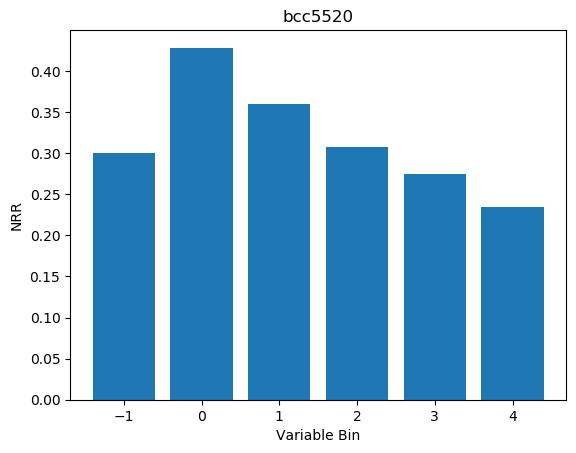

             count       NRR     min          max
bcc5520_bin                                      
-1.0         50491  0.300232    -9.0  999999998.0
 0.0         39761  0.428385    24.0        300.0
 1.0         52311  0.359580   301.0        500.0
 2.0         18518  0.307755   501.0        657.0
 3.0         36937  0.274197   658.0       1367.0
 4.0         36777  0.234576  1368.0      73000.0




Variable Rank:  2
Variable Source:  Experian
Variable Definition:  Number of months since the oldest open and presently satisfactory revolving trade was opened excluding home equity line of credit trades


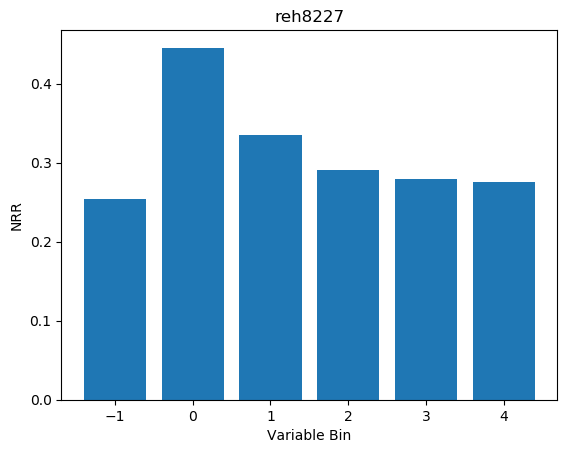

             count       NRR   min     max
reh8227_bin                               
-1.0         22743  0.254320  -9.0  9998.0
 0.0         47943  0.445550   0.0     8.0
 1.0         38422  0.335277   9.0    18.0
 2.0         42026  0.290963  19.0    38.0
 3.0         41726  0.278867  39.0    76.0
 4.0         41935  0.275784  77.0   752.0




Variable Rank:  3
Variable Source:  Experian
Variable Definition:  Worst ever status on a trade including non-medical collections and indeterminates


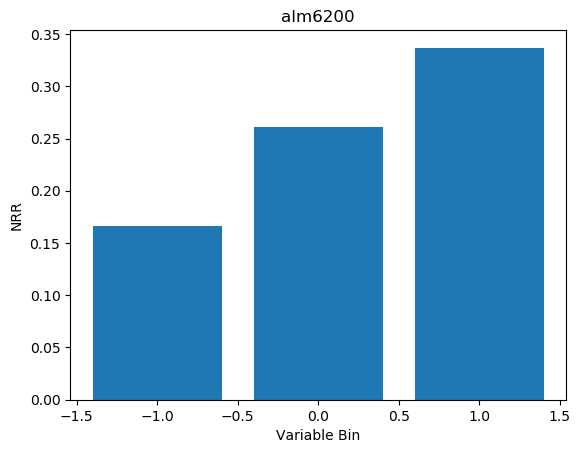

              count       NRR    min    max
alm6200_bin                                
-1.0              6  0.166667   -9.0   -9.0
 0.0          48087  0.261068    1.0   90.0
 1.0         186702  0.336906  120.0  400.0




Variable Rank:  4
Variable Source:  promo
Variable Definition:  fht_36mo_total


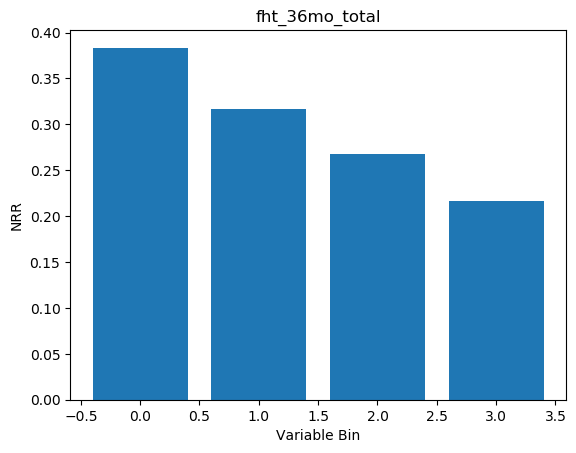

                     count       NRR   min   max
fht_36mo_total_bin                              
0.0                 112072  0.383441   0.0   2.0
1.0                  34762  0.317070   3.0   4.0
2.0                  47160  0.267875   5.0   9.0
3.0                  40801  0.216367  10.0  39.0




Variable Rank:  5
Variable Source:  Experian
Variable Definition:  Percentage of trades including collections that are ever 90 or more days delinquent or derogatory


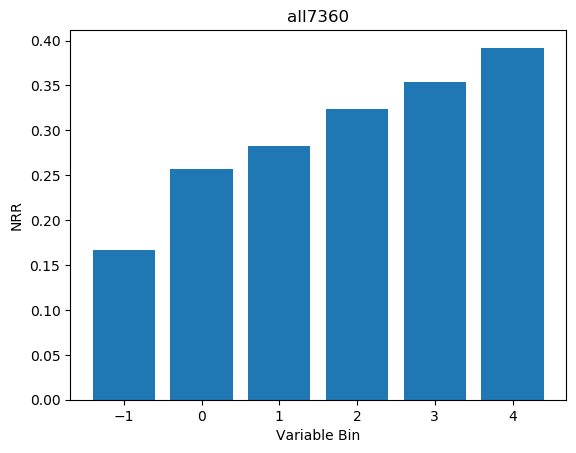

             count       NRR   min    max
all7360_bin                              
-1.0             6  0.166667  -9.0   -9.0
 0.0         50409  0.257454   0.0   13.0
 1.0         44006  0.282961  14.0   28.0
 2.0         47910  0.323962  29.0   42.0
 3.0         46126  0.354182  43.0   57.0
 4.0         46338  0.392054  58.0  100.0




Variable Rank:  6
Variable Source:  Experian
Variable Definition:  Longest consecutive months with a satisfactory balance activity status on trades, excluding collections and other unsatisfied derogatory including indeterminates


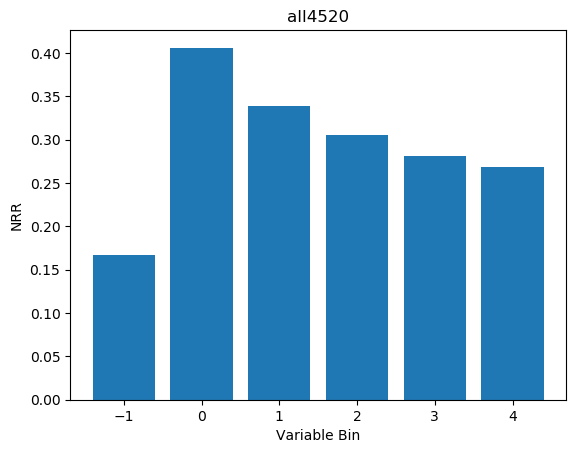

             count       NRR   min   max
all4520_bin                             
-1.0             6  0.166667  -9.0  -9.0
 0.0         49231  0.406228   0.0  17.0
 1.0         45699  0.339438  18.0  29.0
 2.0         47921  0.305419  30.0  44.0
 3.0         45825  0.281724  45.0  65.0
 4.0         46113  0.268861  66.0  84.0




Variable Rank:  7
Variable Source:  Experian
Variable Definition:  Total number of trades ever derogatory including non-medical collections


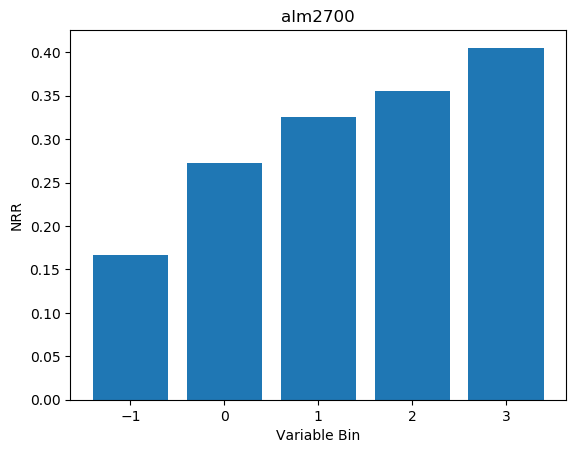

              count       NRR  min   max
alm2700_bin                             
-1.0              6  0.166667 -9.0  -9.0
 0.0         100807  0.272729  0.0   1.0
 1.0          58454  0.325846  2.0   3.0
 2.0          33671  0.355142  4.0   5.0
 3.0          41857  0.405117  6.0  54.0




Variable Rank:  8
Variable Source:  InfoBase
Variable Definition:  RFM - Weeks Since Last Order - General Merchandise


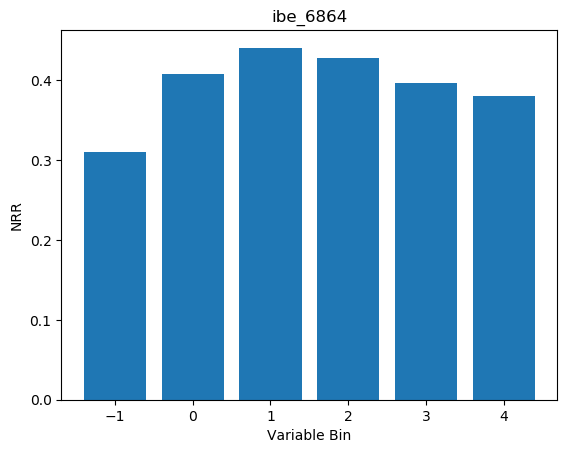

               count       NRR    min    max
ibe_6864_bin                                
-1.0          208862  0.310296   -9.0   -9.0
 0.0            5198  0.407657    8.0  137.0
 1.0            5197  0.440831  138.0  240.0
 2.0            5173  0.428185  241.0  473.0
 3.0            5197  0.396190  474.0  655.0
 4.0            5168  0.379837  656.0  999.0




Variable Rank:  9
Variable Source:  promo
Variable Definition:  fht_12mo_total


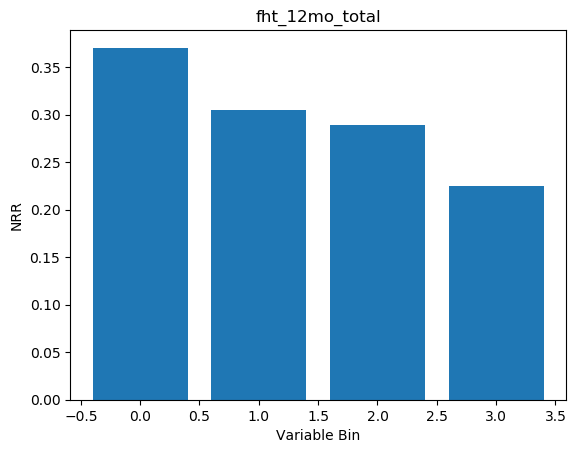

                     count       NRR  min   max
fht_12mo_total_bin                             
0.0                 122633  0.370504  0.0   1.0
1.0                  28720  0.304840  2.0   2.0
2.0                  38227  0.289664  3.0   4.0
3.0                  45215  0.225412  5.0  13.0




Variable Rank:  10
Variable Source:  Experian
Variable Definition:  Percentage of trades including collections that are ever derogatory


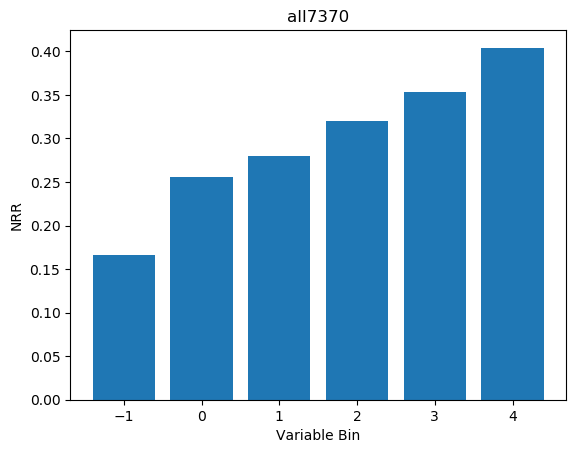

             count       NRR   min    max
all7370_bin                              
-1.0             6  0.166667  -9.0   -9.0
 0.0         48431  0.255766   0.0    8.0
 1.0         45704  0.279822   9.0   22.0
 2.0         47388  0.319743  23.0   35.0
 3.0         50998  0.353818  36.0   50.0
 4.0         42268  0.404159  51.0  100.0




Variable Rank:  11
Variable Source:  Experian
Variable Definition:  Total number of trades ever 90 or more days delinquent or derogatory including non-medical collections, or public records


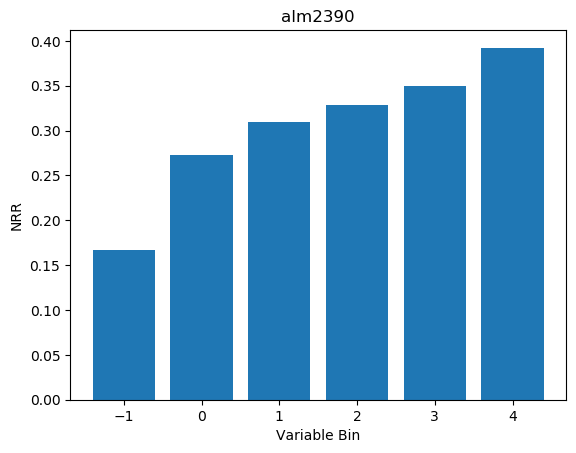

             count       NRR  min   max
alm2390_bin                            
-1.0             6  0.166667 -9.0  -9.0
 0.0         83818  0.272638  0.0   1.0
 1.0         30900  0.310032  2.0   2.0
 2.0         44796  0.328333  3.0   4.0
 3.0         28787  0.350054  5.0   6.0
 4.0         46488  0.392316  7.0  56.0




Variable Rank:  12
Variable Source:  Experian
Variable Definition:  Number of months since the most recently opened open trade with a balance > $0


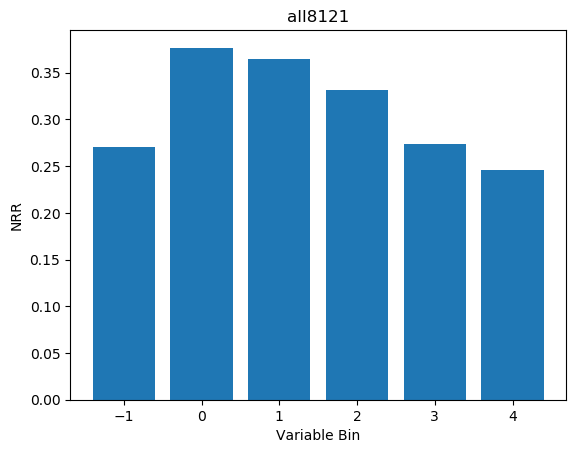

             count       NRR   min     max
all8121_bin                               
-1.0          4083  0.270634  -9.0  9996.0
 0.0         57104  0.376699   0.0     2.0
 1.0         44135  0.364427   3.0     4.0
 2.0         44468  0.331317   5.0     8.0
 3.0         40491  0.273666   9.0    18.0
 4.0         44514  0.245810  19.0   641.0




Variable Rank:  13
Variable Source:  Experian
Variable Definition:  Total balance on open, or closed with a balance > $0 credit card trades with actual payment > $0, excluding derogatory trades, reported in the last 6 months


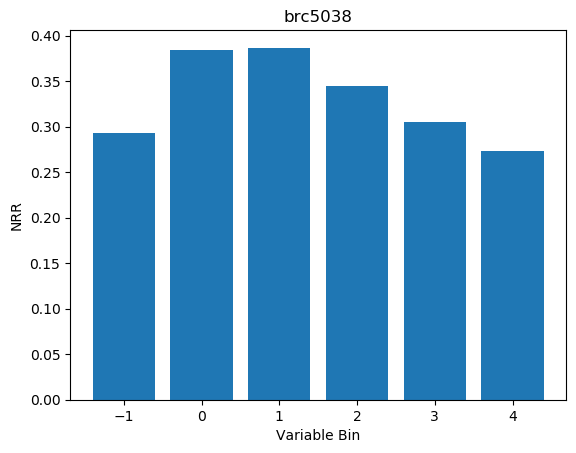

             count       NRR     min          max
brc5038_bin                                      
-1.0         88899  0.292917    -9.0  999999998.0
 0.0         29219  0.383894     0.0        219.0
 1.0         29149  0.386668   220.0        466.0
 2.0         29193  0.344124   467.0       1014.0
 3.0         29166  0.305458  1015.0       2410.0
 4.0         29169  0.273338  2411.0      89805.0




Variable Rank:  14
Variable Source:  Experian
Variable Definition:  Total number of inquiries


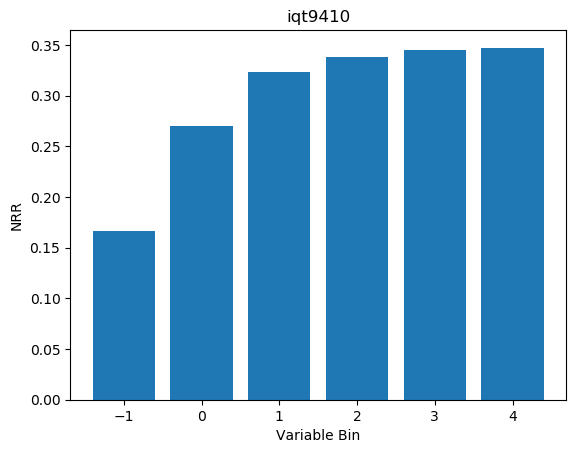

             count       NRR  min   max
iqt9410_bin                            
-1.0             6  0.166667 -9.0  -9.0
 0.0         57336  0.269935  0.0   1.0
 1.0         39777  0.323202  2.0   2.0
 2.0         69414  0.338289  3.0   4.0
 3.0         23774  0.344704  5.0   5.0
 4.0         44488  0.347172  6.0  22.0




Variable Rank:  15
Variable Source:  InfoBase
Variable Definition:  Mail Order Buyer Categories Apparel - Female Apparel MOBs


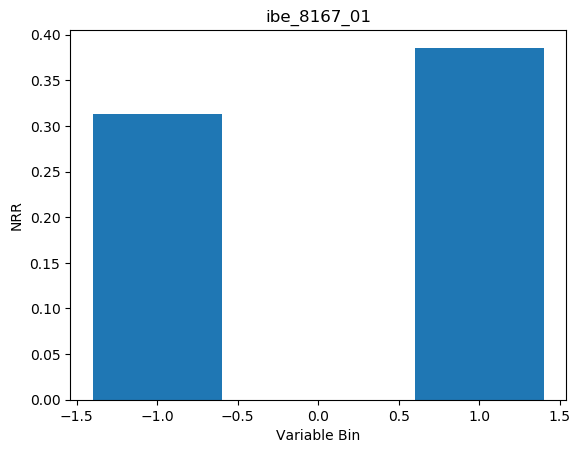

                  count       NRR  min  max
ibe_8167_01_bin                            
-1.0             208137  0.313121 -9.0 -9.0
 1.0              26658  0.385775  1.0  1.0




Variable Rank:  16
Variable Source:  Experian
Variable Definition:  Worst ever status on a trade in the last 12 months including non-medical collections and indeterminates


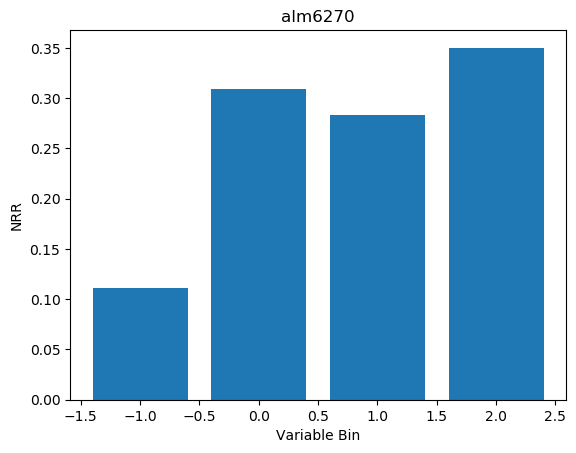

              count       NRR   min    max
alm6270_bin                               
-1.0              9  0.111111  -9.0  997.0
 0.0         116577  0.309461   0.0    1.0
 1.0          30145  0.283629  30.0   60.0
 2.0          88064  0.350075  90.0  400.0




Variable Rank:  17
Variable Source:  Experian
Variable Definition:  Percentage of total payment history in the last 12 months on open revolving bankcard trades opened at least 6 months that have balance activities, reported in the last 12 months and excluding unsatisfied derogatory


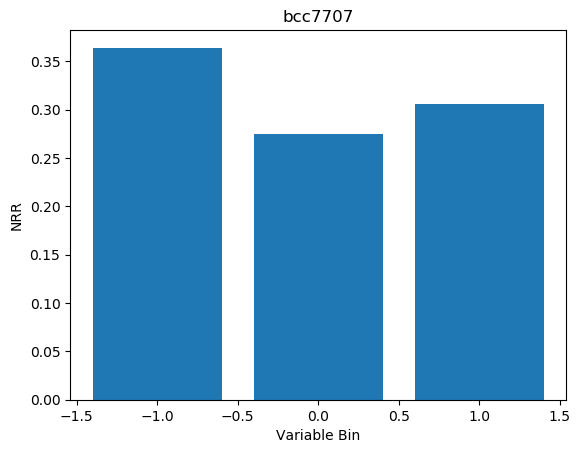

              count       NRR   min    max
bcc7707_bin                               
-1.0          80081  0.364069  -9.0  998.0
 0.0          35118  0.275073   0.0   92.0
 1.0         119596  0.306373  93.0  100.0




Variable Rank:  18
Variable Source:  Experian
Variable Definition:  Number of months since the most recently opened bankcard revolving and charge trade including indeterminates


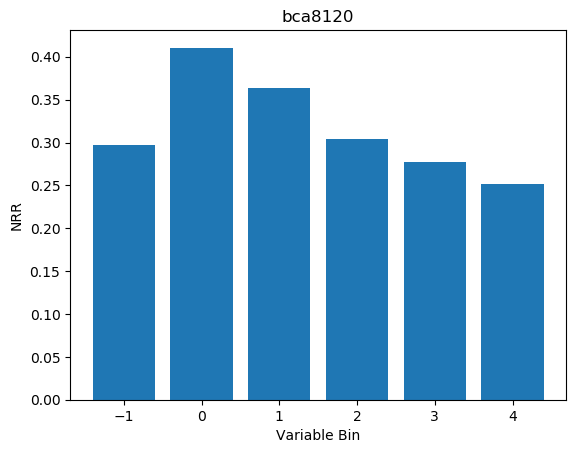

             count       NRR   min     max
bca8120_bin                               
-1.0         23084  0.297002  -9.0  9998.0
 0.0         51109  0.410573   0.0     3.0
 1.0         34999  0.363696   4.0     6.0
 2.0         42355  0.304144   7.0    13.0
 3.0         41496  0.277400  14.0    33.0
 4.0         41752  0.251341  34.0   633.0




Variable Rank:  19
Variable Source:  LexisNexis
Variable Definition:  Unique addresses found with subject


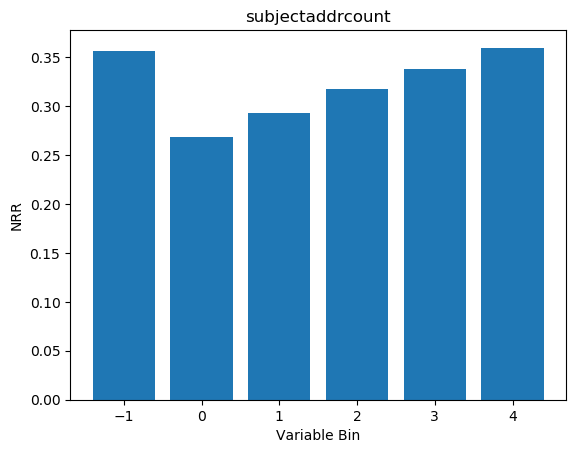

                      count       NRR   min   max
subjectaddrcount_bin                             
-1.0                  51189  0.356209  -9.0  -9.0
 0.0                  47915  0.267995   0.0   4.0
 1.0                  30150  0.293002   5.0   6.0
 2.0                  39819  0.317788   7.0   9.0
 3.0                  34778  0.338317  10.0  13.0
 4.0                  30944  0.359585  14.0  81.0




Variable Rank:  20
Variable Source:  Experian
Variable Definition:  FICO Score


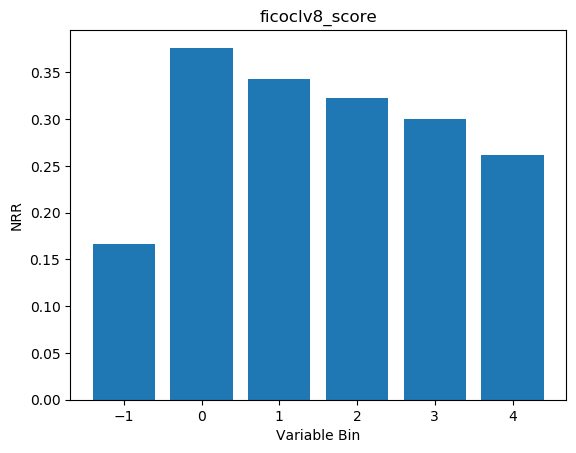

                    count       NRR    min    max
ficoclv8_score_bin                               
-1.0                    6  0.166667   -9.0   -9.0
 0.0                48207  0.376232  551.0  574.0
 1.0                47921  0.343232  575.0  592.0
 2.0                45612  0.322021  593.0  609.0
 3.0                47244  0.300144  610.0  632.0
 4.0                45805  0.262024  633.0  720.0




Variable Rank:  21
Variable Source:  LexisNexis
Variable Definition:  Year of most recent current address tax assessment


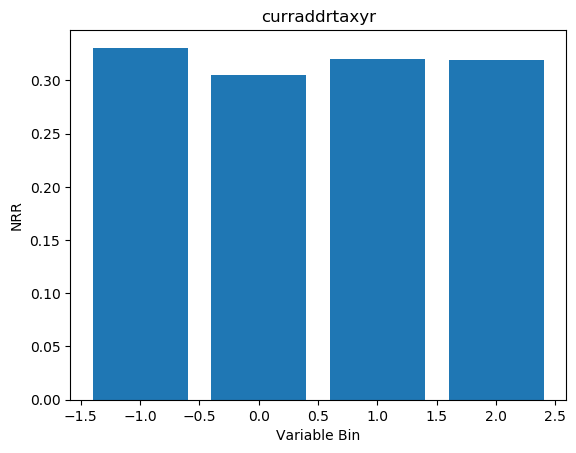

                    count       NRR     min     max
curraddrtaxyr_bin                                  
-1.0               108377  0.330661    -9.0    -1.0
 0.0                54749  0.305302  1994.0  2019.0
 1.0                49098  0.319769  2020.0  2020.0
 2.0                22571  0.319215  2021.0  2022.0




Variable Rank:  22
Variable Source:  Experian
Variable Definition:  Maximum credit amount on open trades reported in the last 6 months


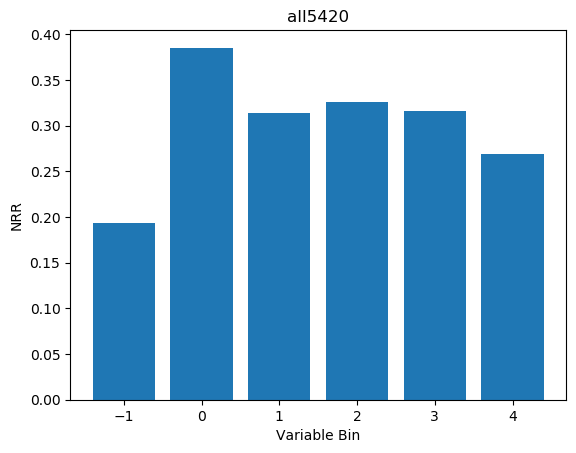

             count       NRR      min          max
all5420_bin                                       
-1.0          1032  0.193798     -9.0  999999997.0
 0.0         46756  0.385341      0.0       1120.0
 1.0         46749  0.313782   1122.0       7365.0
 2.0         46754  0.326218   7366.0      18253.0
 3.0         46751  0.315822  18254.0      32998.0
 4.0         46753  0.268496  32999.0    1478754.0




Variable Rank:  23
Variable Source:  promo
Variable Definition:  fht_6mo_bigbook


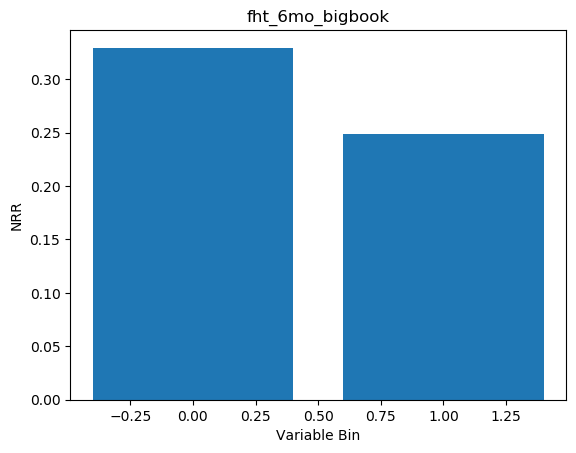

                      count       NRR  min  max
fht_6mo_bigbook_bin                            
0.0                  211697  0.329348  0.0  1.0
1.0                   23098  0.248247  2.0  2.0




Variable Rank:  24
Variable Source:  Experian
Variable Definition:  Total number of open credit card trades with actual payment > $0 reported in the last 6 months


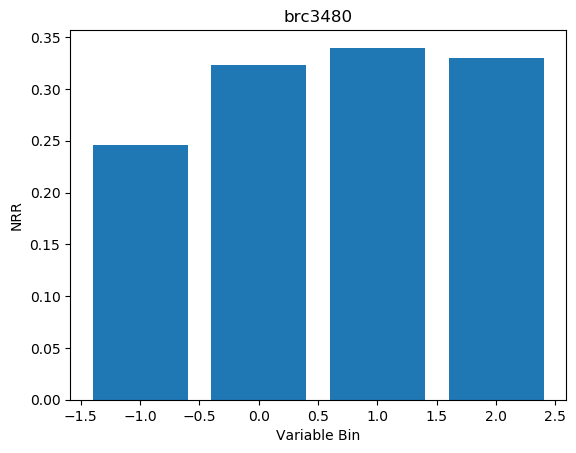

              count       NRR  min   max
brc3480_bin                             
-1.0          17112  0.246143 -9.0  98.0
 0.0         143614  0.323638  0.0   1.0
 1.0          32985  0.339851  2.0   2.0
 2.0          41084  0.329934  3.0  55.0




Variable Rank:  25
Variable Source:  promo
Variable Definition:  dayssincelaston_expz24


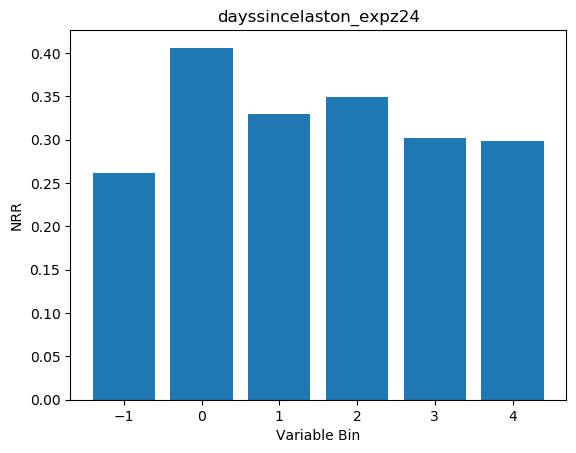

                            count       NRR    min     max
dayssincelaston_expz24_bin                                
-1.0                        53086  0.261444   -9.0    -9.0
 0.0                        40409  0.406246  -19.0    -8.0
 1.0                        32465  0.329401   -7.0   103.0
 2.0                        36385  0.349182  107.0   287.0
 3.0                        36330  0.302230  288.0   593.0
 4.0                        36120  0.298505  596.0  1089.0




Variable Rank:  26
Variable Source:  promo
Variable Definition:  fht_1mo_bigbook


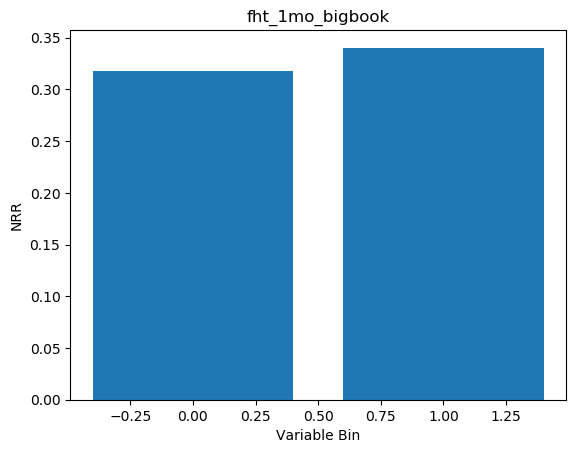

                      count       NRR  min  max
fht_1mo_bigbook_bin                            
0.0                  200620  0.318144  0.0  0.0
1.0                   34175  0.340307  1.0  1.0




Variable Rank:  27
Variable Source:  LexisNexis
Variable Definition:  Year of most recent previous address tax assessment


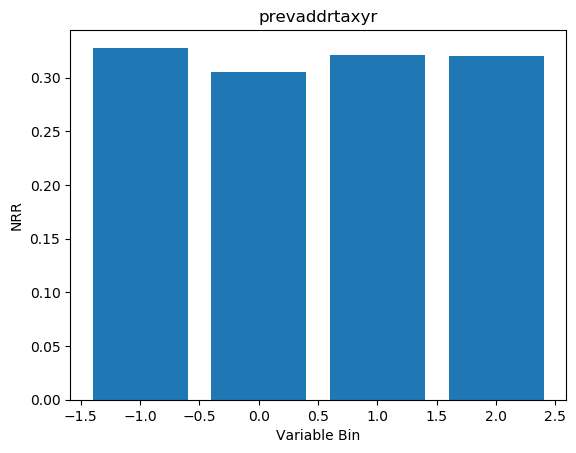

                    count       NRR     min     max
prevaddrtaxyr_bin                                  
-1.0               123804  0.327825    -9.0    -1.0
 0.0                47201  0.305311  1994.0  2019.0
 1.0                43671  0.320968  2020.0  2020.0
 2.0                20119  0.320195  2021.0  2022.0




Variable Rank:  28
Variable Source:  Experian
Variable Definition:  Percentage of open credit card trades that were opened in the last 12 months


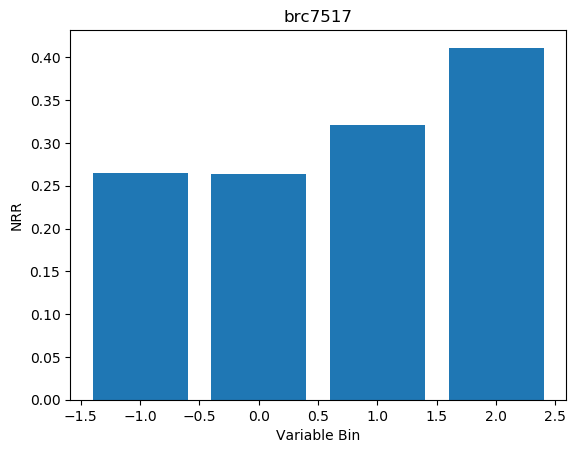

             count       NRR   min    max
brc7517_bin                              
-1.0         25375  0.264828  -9.0  998.0
 0.0         91668  0.263571   0.0   33.0
 1.0         42416  0.320422  34.0   67.0
 2.0         75336  0.411277  68.0  100.0




Variable Rank:  29
Variable Source:  InfoBase
Variable Definition:  Teletrends - Cellular User


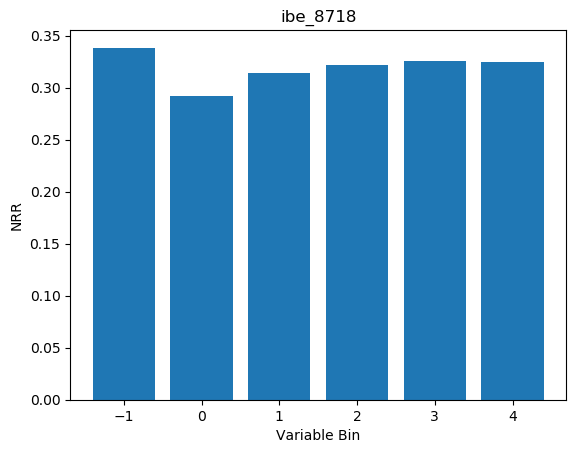

              count       NRR  min   max
ibe_8718_bin                            
-1.0          64593  0.338411 -9.0  -9.0
 0.0          37456  0.292049  1.0   2.0
 1.0          35887  0.314320  3.0   4.0
 2.0          36069  0.321550  5.0   6.0
 3.0          35071  0.325739  7.0   8.0
 4.0          25719  0.324896  9.0  10.0




Variable Rank:  30
Variable Source:  Experian
Variable Definition:  Actual payment on an open revolving retail trade with the highest credit amount, actual payment > $0 and credit amount > $0


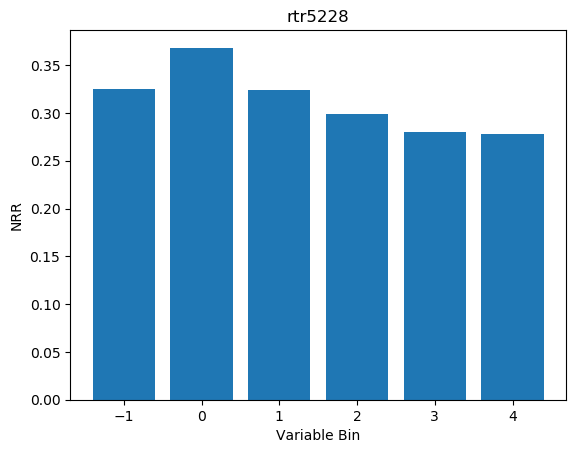

              count       NRR    min          max
rtr5228_bin                                      
-1.0         174843  0.325206   -9.0  999999998.0
 0.0          12521  0.368261    1.0         30.0
 1.0          11554  0.323957   31.0         45.0
 2.0          11965  0.299122   46.0         65.0
 3.0          11964  0.279589   66.0        103.0
 4.0          11948  0.277703  104.0       8690.0




Variable Rank:  31
Variable Source:  Experian
Variable Definition:  Number of months since the oldest no preset spending limit bankcard trade was opened including indeterminates


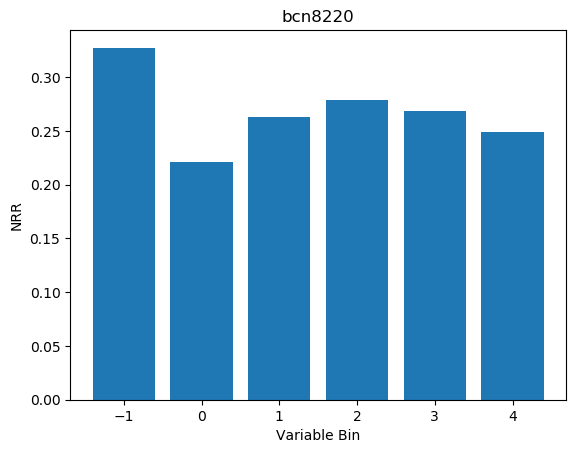

              count       NRR    min     max
bcn8220_bin                                 
-1.0         215434  0.327279   -9.0  9998.0
 0.0           3942  0.220700    0.0    25.0
 1.0           3901  0.262497   26.0    52.0
 2.0           3838  0.278791   53.0    70.0
 3.0           3815  0.268152   71.0   106.0
 4.0           3865  0.248900  107.0   635.0




Variable Rank:  32
Variable Source:  promo
Variable Definition:  fht_3mo_bigbook


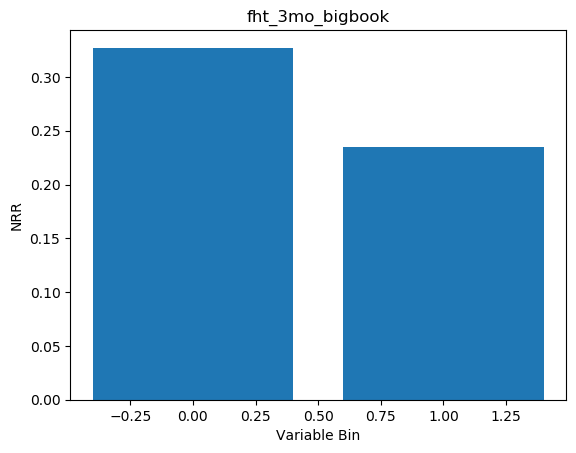

                      count       NRR  min  max
fht_3mo_bigbook_bin                            
0.0                  220059  0.327144  0.0  1.0
1.0                   14736  0.235138  2.0  2.0




Variable Rank:  33
Variable Source:  promo
Variable Definition:  fht_dayssincelaststandarddecline


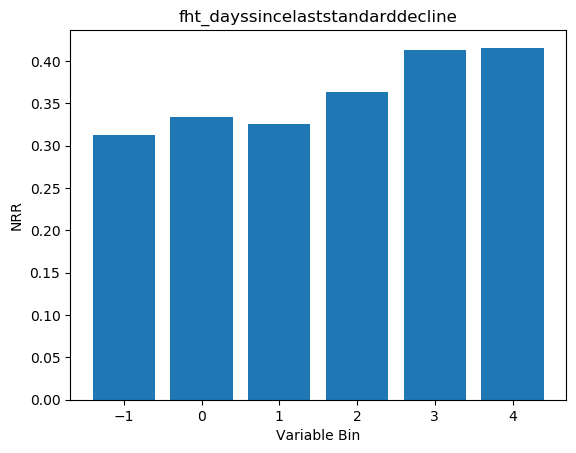

                                       count       NRR     min     max
fht_dayssincelaststandarddecline_bin                                  
-1.0                                  198461  0.312364    -9.0    -9.0
 0.0                                    7273  0.333975   434.0  1791.0
 1.0                                    7265  0.325809  1792.0  2472.0
 2.0                                    7264  0.363987  2473.0  3297.0
 3.0                                    7267  0.413238  3298.0  4204.0
 4.0                                    7265  0.415829  4205.0  5649.0




Variable Rank:  34
Variable Source:  LexisNexis
Variable Definition:  Time since phone service first seen in the Electronic Directory Assistance (EDA) records


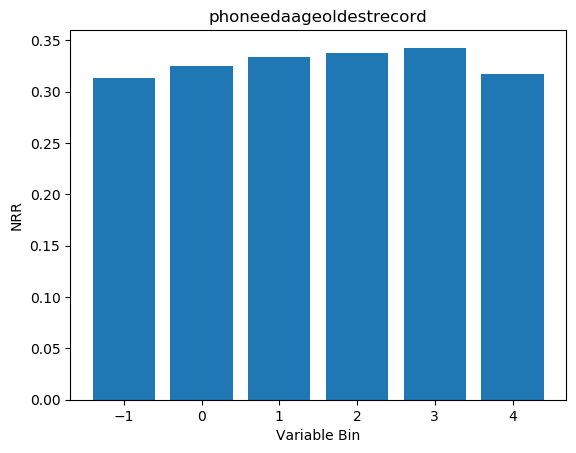

                              count       NRR    min    max
phoneedaageoldestrecord_bin                                
-1.0                         131274  0.313466   -9.0   -1.0
 0.0                          20960  0.325477    0.0  124.0
 1.0                          20942  0.333445  125.0  163.0
 2.0                          20250  0.337728  164.0  181.0
 3.0                          20755  0.342905  182.0  201.0
 4.0                          20614  0.317503  202.0  268.0




Variable Rank:  35
Variable Source:  Experian
Variable Definition:  Number of months since the most recent derogatory on trades excluding collections including indeterminates


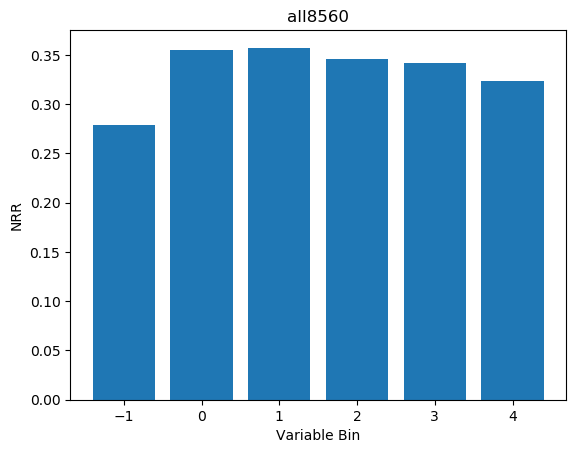

             count       NRR   min     max
all8560_bin                               
-1.0         84672  0.279077  -9.0  9996.0
 0.0         30866  0.355245   0.0    10.0
 1.0         30821  0.357321  11.0    20.0
 2.0         30778  0.346091  21.0    31.0
 3.0         28623  0.342207  32.0    46.0
 4.0         29035  0.323782  47.0    82.0




Variable Rank:  36
Variable Source:  Experian
Variable Definition:  Number of months since the most recent 60 or more days delinquency or derogatory excluding collections including indeterminates


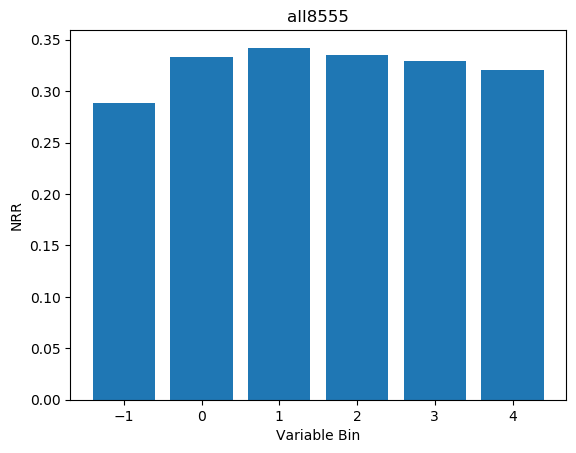

             count       NRR   min     max
all8555_bin                               
-1.0         58776  0.288536  -9.0  9996.0
 0.0         38294  0.333525   0.0     6.0
 1.0         33179  0.342265   7.0    13.0
 2.0         35756  0.335328  14.0    23.0
 3.0         34086  0.329783  24.0    38.0
 4.0         34704  0.320943  39.0    82.0




Variable Rank:  37
Variable Source:  Experian
Variable Definition:  Total number of unsatisfied charge-off trades


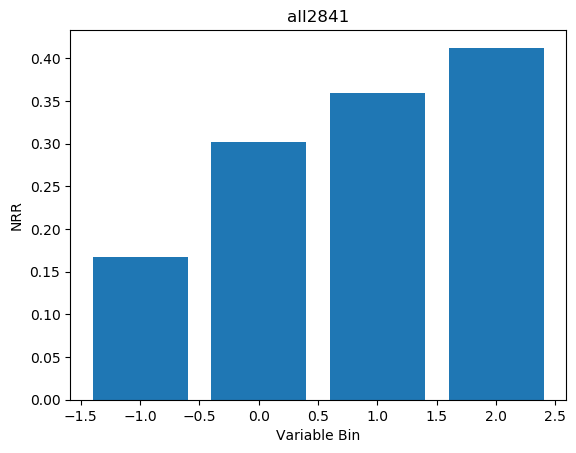

              count       NRR  min   max
all2841_bin                             
-1.0              6  0.166667 -9.0  -9.0
 0.0         181745  0.302033  0.0   1.0
 1.0          24428  0.358728  2.0   2.0
 2.0          28616  0.412322  3.0  27.0




Variable Rank:  38
Variable Source:  Experian
Variable Definition:  Worst ever status on a revolving trade opened in the last 36 months including indeterminates


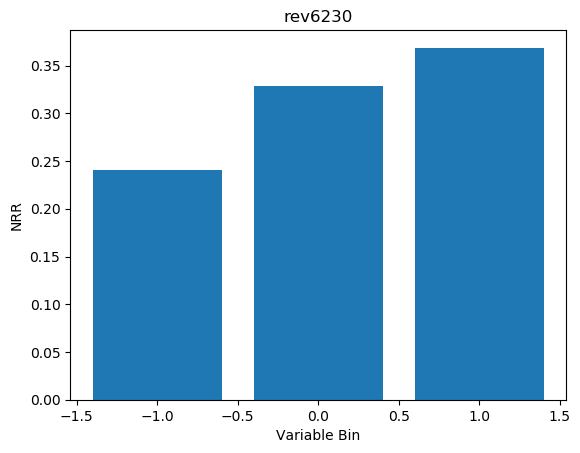

              count       NRR   min    max
rev6230_bin                               
-1.0          37174  0.240679  -9.0  998.0
 0.0         160305  0.329073   1.0   60.0
 1.0          37316  0.368662  90.0  400.0




Variable Rank:  39
Variable Source:  Experian
Variable Definition:  Number of months since the most recent derogatory on revolving trades including indeterminates


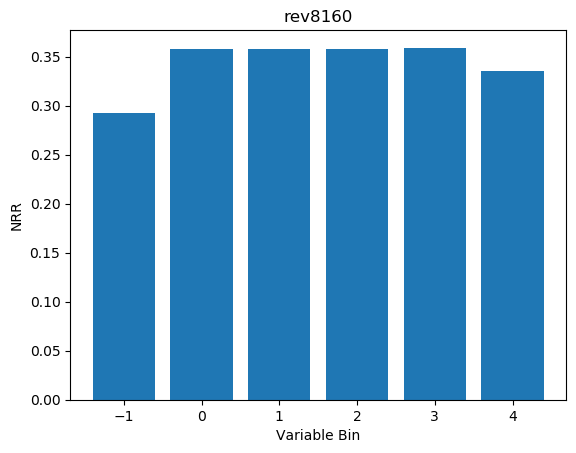

              count       NRR   min     max
rev8160_bin                                
-1.0         123662  0.292361  -9.0  9998.0
 0.0          22501  0.357673   0.0    12.0
 1.0          22578  0.357693  13.0    23.0
 2.0          23091  0.357888  24.0    35.0
 3.0          21355  0.359120  36.0    50.0
 4.0          21608  0.335292  51.0    83.0




Variable Rank:  40
Variable Source:  Experian
Variable Definition:  Number of months since the most recently closed trade excluding presently derogatory trades and collections


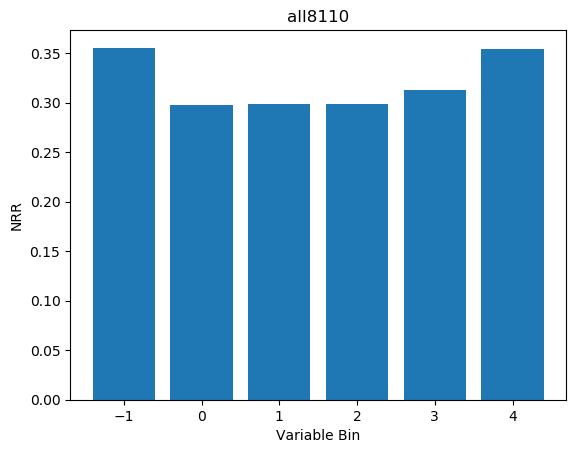

             count       NRR   min     max
all8110_bin                               
-1.0         48428  0.355517  -9.0  9996.0
 0.0         40219  0.298068   0.0     3.0
 1.0         36512  0.298696   4.0     8.0
 2.0         36583  0.298909   9.0    18.0
 3.0         35857  0.312798  19.0    39.0
 4.0         37196  0.354716  40.0   186.0




Variable Rank:  41
Variable Source:  Experian
Variable Definition:  Number of months since the most recent non-medical collection with a balance > $200 including indeterminates


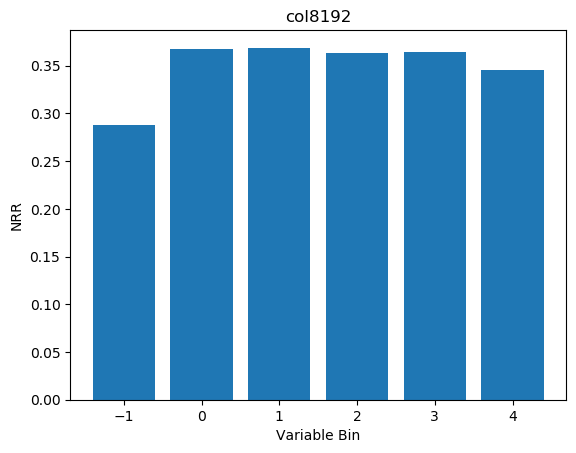

              count       NRR   min     max
col8192_bin                                
-1.0         128457  0.287762  -9.0  9998.0
 0.0          23805  0.367528   1.0     7.0
 1.0          19215  0.368722   8.0    13.0
 2.0          21285  0.363261  14.0    22.0
 3.0          21641  0.364540  23.0    36.0
 4.0          20392  0.345037  37.0    81.0




Variable Rank:  42
Variable Source:  Experian
Variable Definition:  Worst ever status on a retail trade including indeterminates


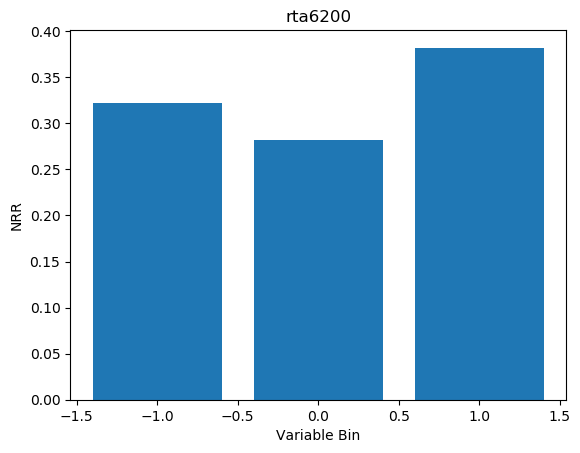

             count       NRR    min    max
rta6200_bin                               
-1.0         75076  0.322367   -9.0  998.0
 0.0         97732  0.282108    1.0  120.0
 1.0         61987  0.382064  400.0  400.0




Variable Rank:  43
Variable Source:  miacs
Variable Definition:  Households - % Food Stamps Last 12 Months (Tract level)


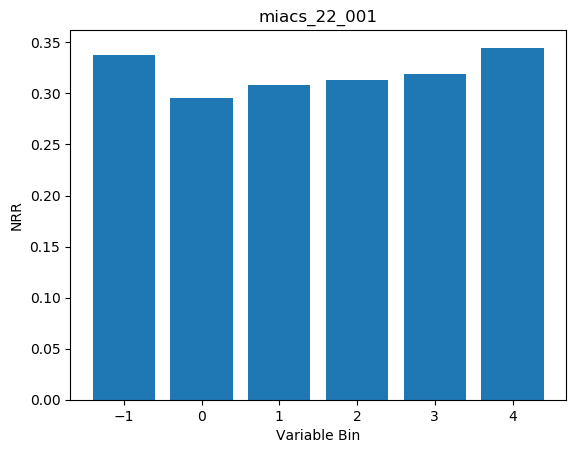

                  count       NRR   min   max
miacs_22_001_bin                             
-1.0              58543  0.337359  -9.0  -9.0
 0.0              35643  0.295822   0.0   6.0
 1.0              37643  0.308424   7.0  11.0
 2.0              32662  0.313422  12.0  16.0
 3.0              36386  0.319409  17.0  25.0
 4.0              33918  0.344743  26.0  99.0




Variable Rank:  44
Variable Source:  Experian
Variable Definition:  Type of trade industry of the most recently opened trade excluding collections including indeterminates (1=MTA, 2=BCA, 3=AUA, 4=RTA, 5=STU, 6=ILN, 7=UTI, 8=CRU, 9=others)


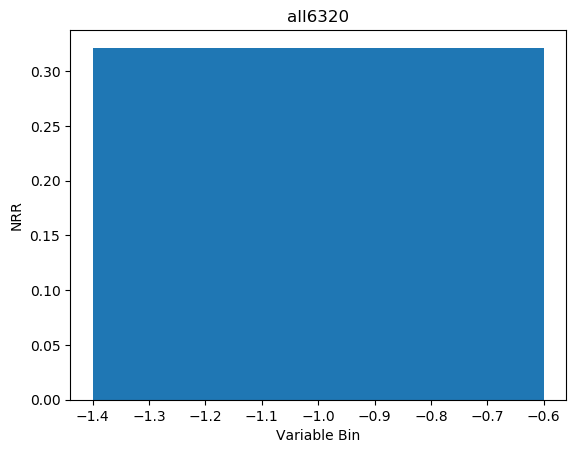

              count      NRR  min  max
all6320_bin                           
-1.0         234795  0.32137 -9.0  9.0




Variable Rank:  45
Variable Source:  miacs
Variable Definition:  Total Population - % In State Of Residence (Tract Level)


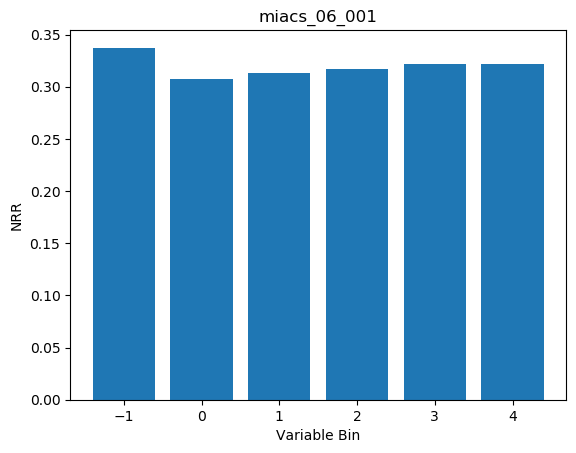

                  count       NRR   min   max
miacs_06_001_bin                             
-1.0              58543  0.337359  -9.0  -9.0
 0.0              36123  0.307283   0.0  48.0
 1.0              37787  0.313018  49.0  61.0
 2.0              33702  0.317251  62.0  70.0
 3.0              35976  0.321548  71.0  79.0
 4.0              32664  0.322006  80.0  99.0




Variable Rank:  46
Variable Source:  Experian
Variable Definition:  Total number of revolving retail trades never delinquent or derogatory


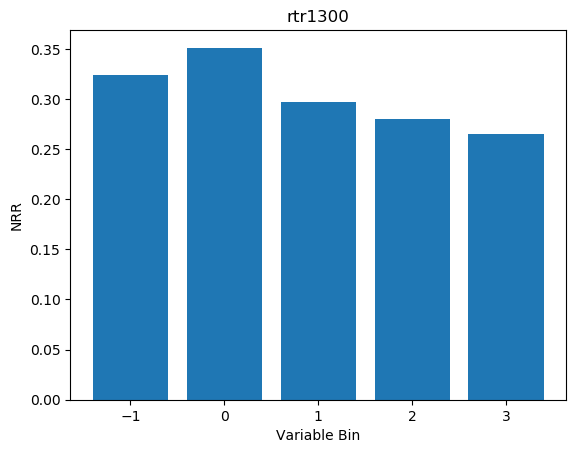

             count       NRR  min   max
rtr1300_bin                            
-1.0         81213  0.323914 -9.0  98.0
 0.0         86312  0.351110  0.0   1.0
 1.0         25392  0.296589  2.0   2.0
 2.0         13772  0.280497  3.0   3.0
 3.0         28106  0.265104  4.0  53.0




Variable Rank:  47
Variable Source:  Experian
Variable Definition:  Average number of months since credit card trades were opened including indeterminates


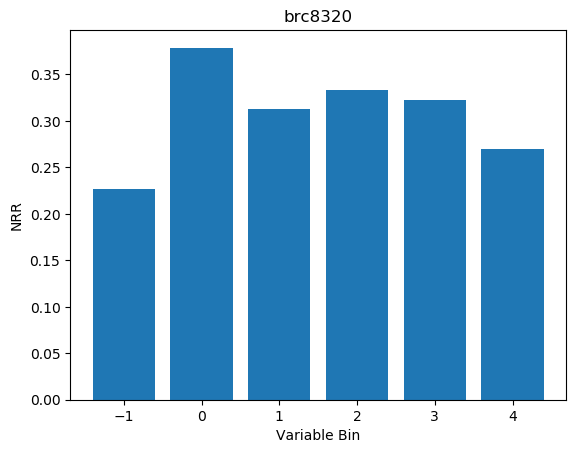

             count       NRR   min     max
brc8320_bin                               
-1.0          6475  0.226409  -9.0  9998.0
 0.0         47873  0.378794   0.0    15.0
 1.0         44920  0.312778  16.0    33.0
 2.0         44380  0.333551  34.0    51.0
 3.0         46354  0.322043  52.0    79.0
 4.0         44793  0.269573  80.0   684.0




Variable Rank:  48
Variable Source:  Experian
Variable Definition:  Number of months since the most recent charge-off including indeterminates


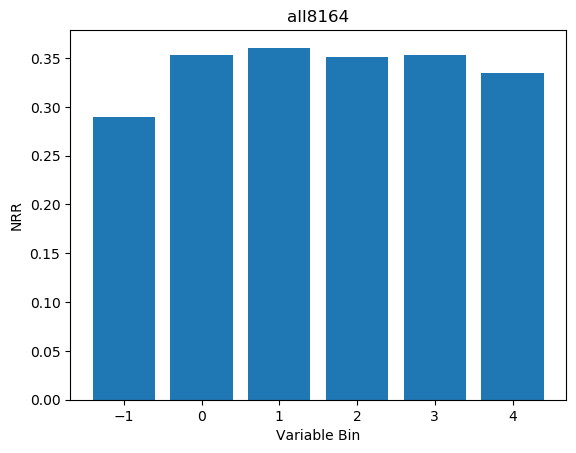

              count       NRR   min     max
all8164_bin                                
-1.0         112863  0.289732  -9.0  9996.0
 0.0          25582  0.353022   0.0    11.0
 1.0          23381  0.360592  12.0    21.0
 2.0          24744  0.351358  22.0    33.0
 3.0          24935  0.353439  34.0    49.0
 4.0          23290  0.334350  50.0    83.0




Variable Rank:  49
Variable Source:  Experian
Variable Definition:  Total number of bankcard revolving and charge inquiries made in the last 12 months


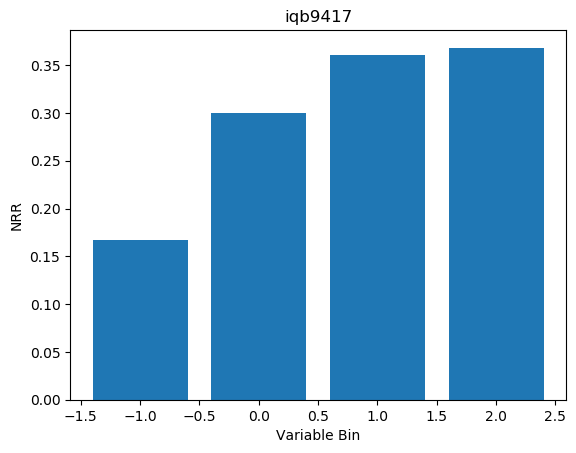

              count       NRR  min   max
iqb9417_bin                             
-1.0              6  0.166667 -9.0  -9.0
 0.0         157048  0.300278  0.0   1.0
 1.0          44499  0.360817  2.0   2.0
 2.0          33242  0.368239  3.0  11.0




Variable Rank:  50
Variable Source:  Experian
Variable Definition:  Total number of open bankcard revolving and charge trades opened in the last 6 months excluding authorized user trades


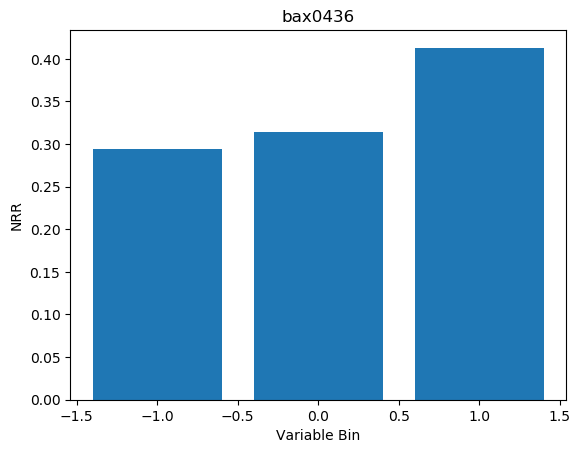

              count       NRR  min   max
bax0436_bin                             
-1.0          28834  0.293854 -9.0  98.0
 0.0         183335  0.314386  0.0   1.0
 1.0          22626  0.413020  2.0  10.0




Variable Rank:  51
Variable Source:  Experian
Variable Definition:  Number of days since the most recent bankcard revolving and charge inquiry (no deduplication)


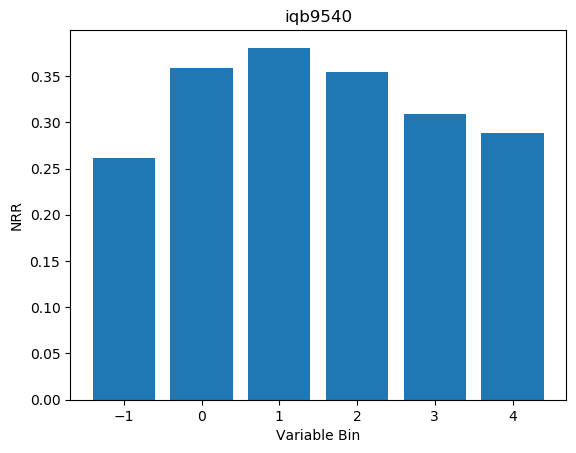

             count       NRR    min     max
iqb9540_bin                                
-1.0         51722  0.261223   -9.0  9999.0
 0.0         37255  0.359146    0.0    39.0
 1.0         36384  0.380607   40.0    96.0
 2.0         36322  0.354193   97.0   185.0
 3.0         36536  0.309393  186.0   343.0
 4.0         36576  0.288386  344.0   748.0




Variable Rank:  52
Variable Source:  Experian
Variable Definition:  Number of months since the most recent public record chapter 13 bankruptcy status date


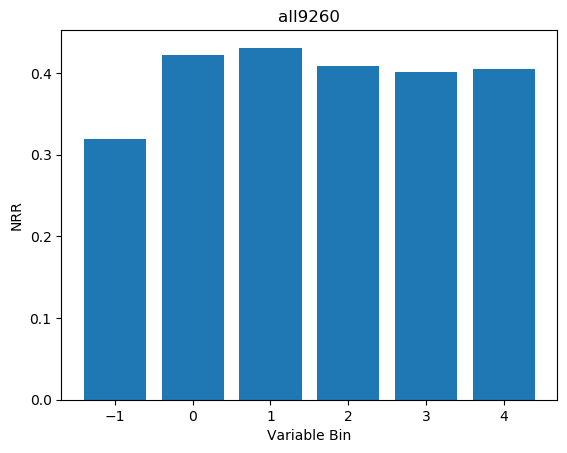

              count       NRR   min     max
all9260_bin                                
-1.0         228495  0.318825  -9.0  9999.0
 0.0           1309  0.422460   0.0    12.0
 1.0           1272  0.430818  13.0    21.0
 2.0           1275  0.408627  22.0    32.0
 3.0           1218  0.400657  33.0    46.0
 4.0           1226  0.404568  47.0    81.0




Variable Rank:  53
Variable Source:  Experian
Variable Definition:  Number of months since the most recent inquiry (no deduplication)


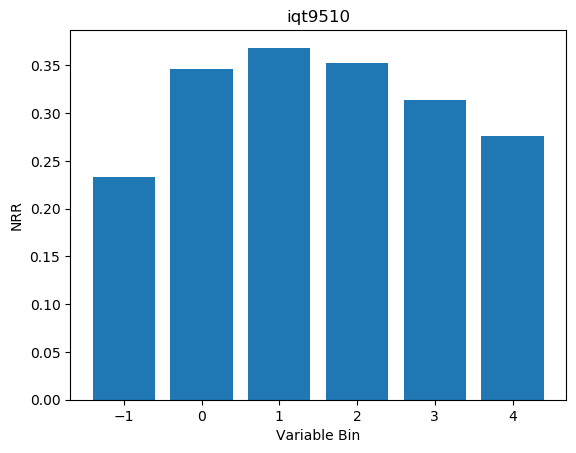

             count       NRR   min     max
iqt9510_bin                               
-1.0         22286  0.233151  -9.0  9999.0
 0.0         60960  0.346375   0.0     1.0
 1.0         28228  0.368393   2.0     2.0
 2.0         39439  0.352722   3.0     4.0
 3.0         45227  0.313308   5.0     9.0
 4.0         38655  0.275902  10.0    24.0




Variable Rank:  54
Variable Source:  Experian
Variable Definition:  Total balance on utility collections


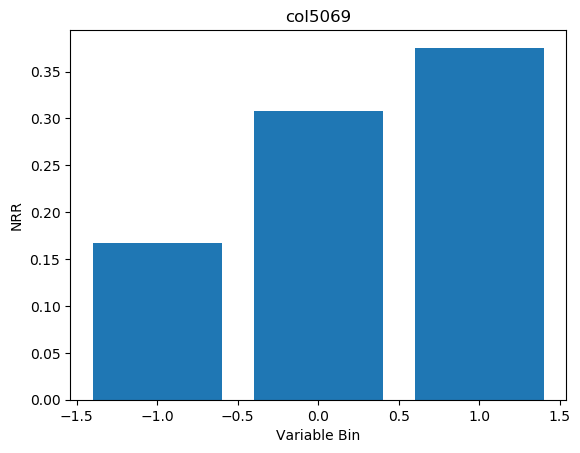

              count       NRR    min      max
col5069_bin                                  
-1.0              6  0.166667   -9.0     -9.0
 0.0         187880  0.307872    0.0    197.0
 1.0          46909  0.375450  198.0  24897.0




Variable Rank:  55
Variable Source:  InfoBase
Variable Definition:  AP005352 Use H R Block Onsite Tax Service Fin Rank


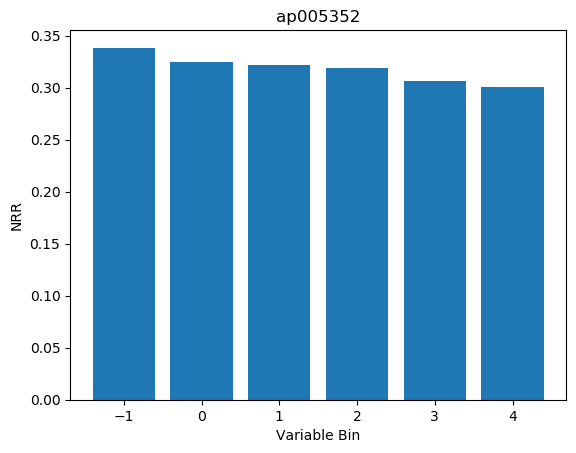

              count       NRR   min   max
ap005352_bin                             
-1.0          64593  0.338411  -9.0  -9.0
 0.0          41098  0.324566   1.0   3.0
 1.0          38970  0.322197   4.0   6.0
 2.0          22292  0.318859   7.0   8.0
 3.0          35614  0.306228   9.0  12.0
 4.0          32228  0.300608  13.0  20.0




Variable Rank:  56
Variable Source:  Experian
Variable Definition:  Type of trade industry of the oldest opened trade excluding collections including indeterminates (1=MTA, 2=BCA, 3=AUA, 4=RTA, 5=STU, 6=ILN, 7=UTI, 8=CRU, 9=others)


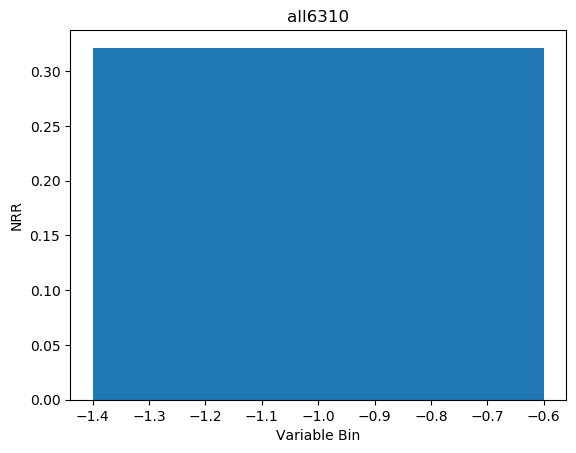

              count      NRR  min  max
all6310_bin                           
-1.0         234795  0.32137 -9.0  9.0




Variable Rank:  57
Variable Source:  Experian
Variable Definition:  Total number of personal finance inquiries


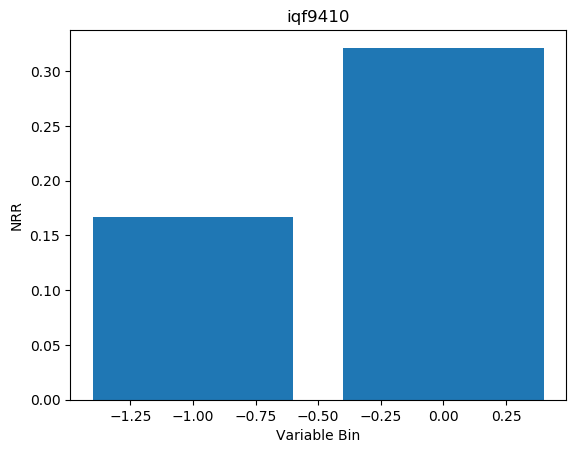

              count       NRR  min   max
iqf9410_bin                             
-1.0              6  0.166667 -9.0  -9.0
 0.0         234789  0.321374  0.0  13.0




Variable Rank:  58
Variable Source:  Experian
Variable Definition:  Total number of bankcard revolving and charge inquiries


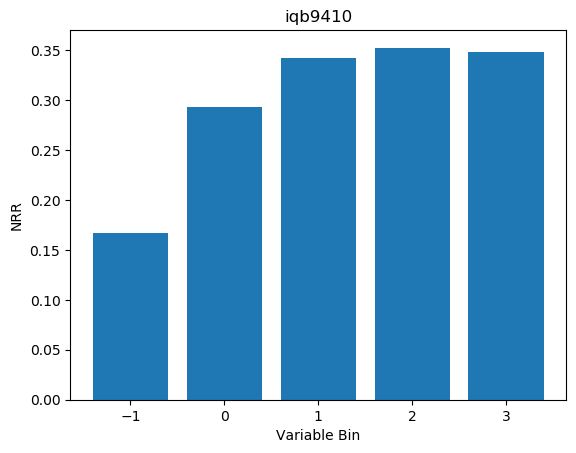

              count       NRR  min   max
iqb9410_bin                             
-1.0              6  0.166667 -9.0  -9.0
 0.0         111438  0.293051  0.0   1.0
 1.0          48742  0.342231  2.0   2.0
 2.0          33154  0.352416  3.0   3.0
 3.0          41455  0.348161  4.0  19.0




Variable Rank:  59
Variable Source:  LexisNexis
Variable Definition:  Time since the subject was most recently reported in other phone sources


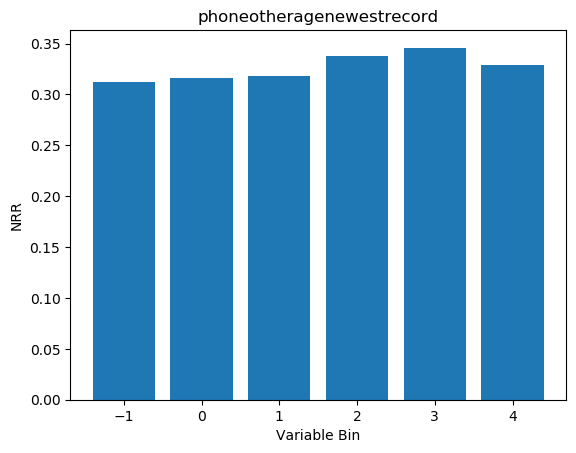

                                count       NRR    min    max
phoneotheragenewestrecord_bin                                
-1.0                           107785  0.312251   -9.0   -1.0
 0.0                            27284  0.315826    0.0    7.0
 1.0                            24150  0.317805    8.0   26.0
 2.0                            24848  0.337411   27.0   62.0
 3.0                            25581  0.345960   63.0  112.0
 4.0                            25147  0.329025  113.0  533.0




Variable Rank:  60
Variable Source:  Experian
Variable Definition:  Number of months since the most recent 30 or more days delinquency or derogatory excluding collections including indeterminates


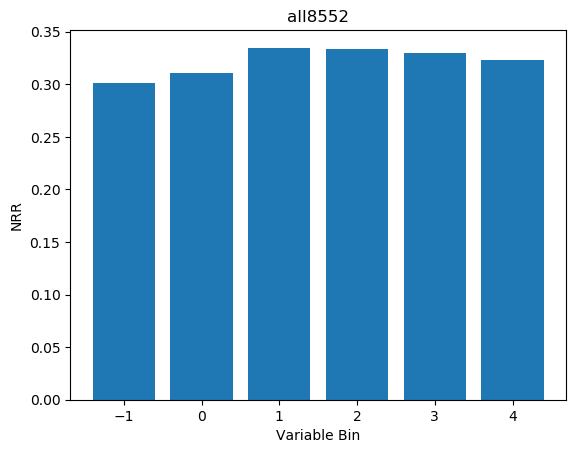

             count       NRR   min     max
all8552_bin                               
-1.0         46019  0.300941  -9.0  9996.0
 0.0         38335  0.311073   0.0     3.0
 1.0         41729  0.334731   4.0     9.0
 2.0         36168  0.333140  10.0    18.0
 3.0         35003  0.329286  19.0    32.0
 4.0         37541  0.323353  33.0    82.0




Variable Rank:  61
Variable Source:  Experian
Variable Definition:  Range of days between the first and last inquiry made in the last 6 months (no deduplication)


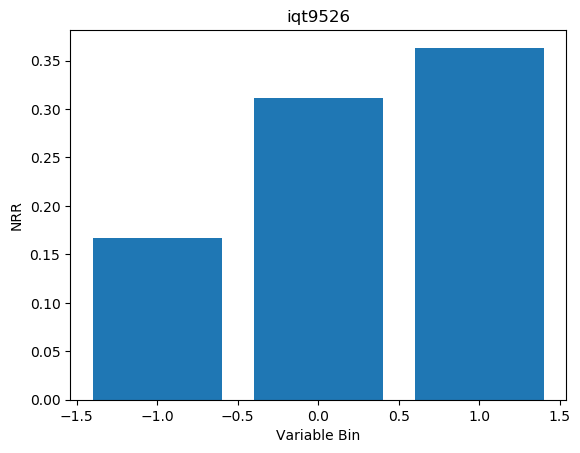

              count       NRR   min    max
iqt9526_bin                               
-1.0              6  0.166667  -9.0   -9.0
 0.0         188122  0.311000   0.0   80.0
 1.0          46667  0.363190  81.0  200.0




Variable Rank:  62
Variable Source:  Experian
Variable Definition:  Number of days since the most recent retail inquiry (no deduplication)


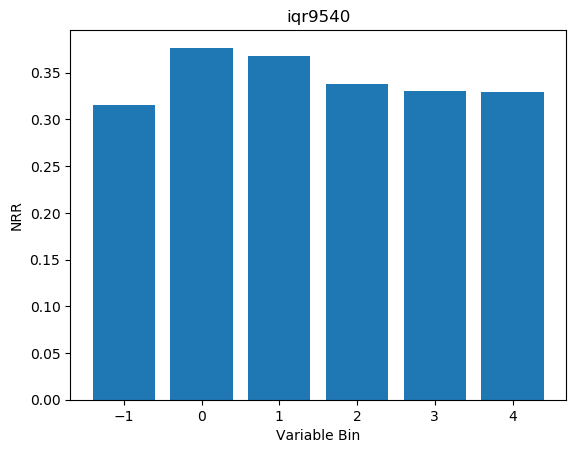

              count       NRR    min     max
iqr9540_bin                                 
-1.0         191205  0.315170   -9.0  9999.0
 0.0           8779  0.376808    0.0    98.0
 1.0           8658  0.368214   99.0   215.0
 2.0           8745  0.338022  216.0   356.0
 3.0           8696  0.330382  357.0   548.0
 4.0           8712  0.329316  549.0   748.0




Variable Rank:  63
Variable Source:  Experian
Variable Definition:  Percentage of total actual payment on open revolving bankcard trades that have the highest credit amount with credit amount > $0


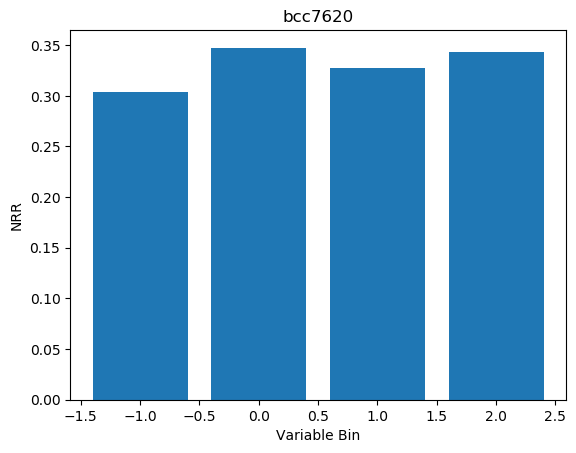

              count       NRR   min    max
bcc7620_bin                               
-1.0         121814  0.303356  -9.0  998.0
 0.0          23168  0.347462   0.0   45.0
 1.0          22185  0.327203  46.0   84.0
 2.0          67628  0.342964  85.0  100.0




Variable Rank:  64
Variable Source:  Experian
Variable Definition:  Number of months since the most recent mortgage type inquiry (no deduplication)


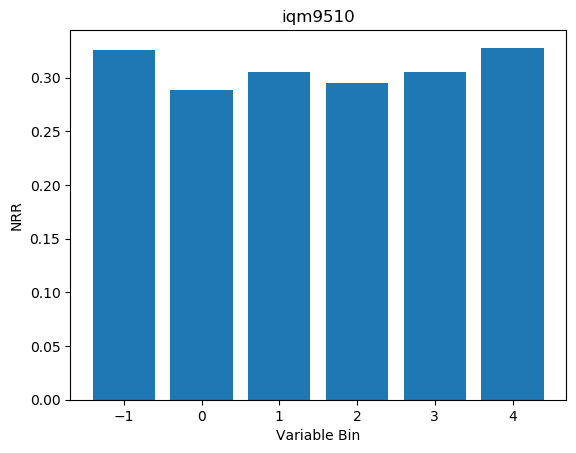

              count       NRR   min     max
iqm9510_bin                                
-1.0         187405  0.325898  -9.0  9999.0
 0.0          11104  0.288184   0.0     3.0
 1.0           9715  0.305404   4.0     7.0
 2.0           9166  0.295331   8.0    12.0
 3.0           8945  0.305422  13.0    18.0
 4.0           8460  0.328014  19.0    24.0




Variable Rank:  65
Variable Source:  InfoBase
Variable Definition:  Mail Order Buyer Categories Gift MOBs


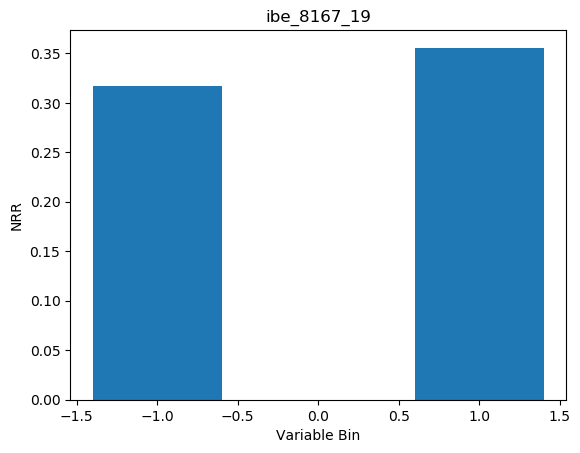

                  count       NRR  min  max
ibe_8167_19_bin                            
-1.0             206463  0.316667 -9.0 -9.0
 1.0              28332  0.355640  1.0  1.0




Variable Rank:  66
Variable Source:  InfoBase
Variable Definition:  RFM - Total Offline Orders - $250-$499.99 Range


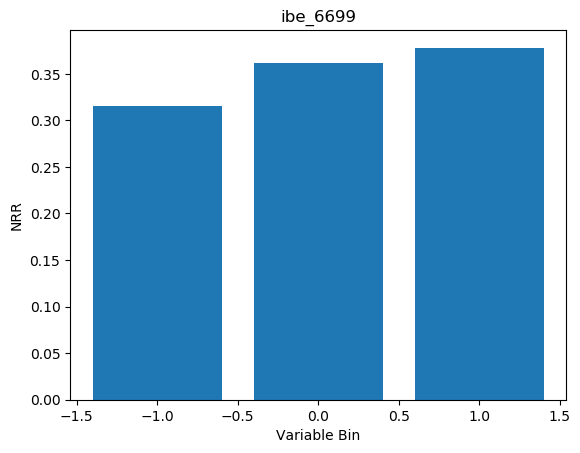

               count       NRR  min   max
ibe_6699_bin                             
-1.0          206138  0.315497 -9.0  -9.0
 0.0           25226  0.361651  1.0   2.0
 1.0            3431  0.378024  3.0  37.0




Variable Rank:  67
Variable Source:  Experian
Variable Definition:  Overall balance to credit amount ratio on open trades opened in the last 6 months with credit amount > $0


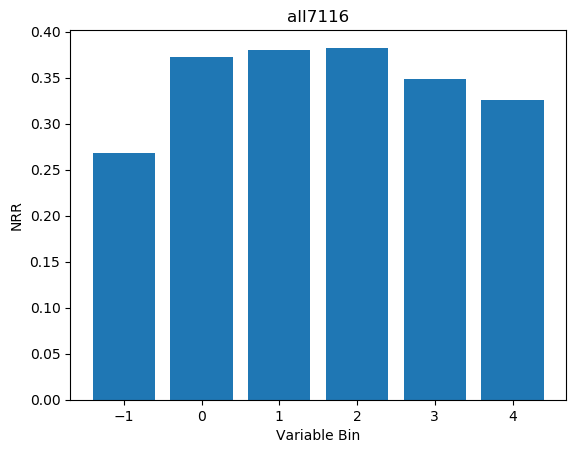

              count       NRR   min    max
all7116_bin                               
-1.0         102021  0.267876  -9.0  996.0
 0.0          26562  0.372223   0.0   37.0
 1.0          26849  0.380498  38.0   71.0
 2.0          27960  0.382582  72.0   90.0
 3.0          25533  0.348412  91.0   97.0
 4.0          25870  0.325899  98.0  906.0




Variable Rank:  68
Variable Source:  Experian
Variable Definition:  Number of days since the most recent personal finance inquiry (no deduplication)


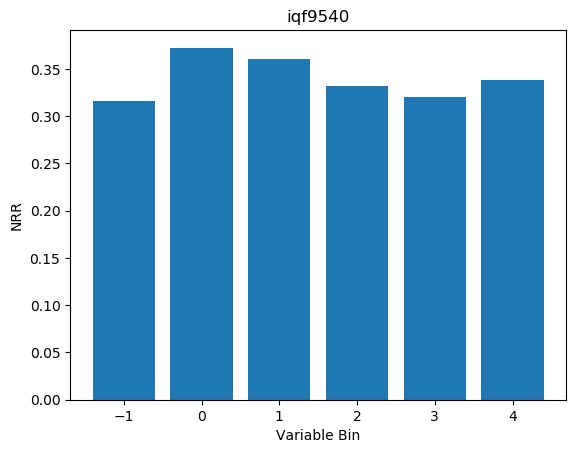

              count       NRR    min     max
iqf9540_bin                                 
-1.0         192898  0.316338   -9.0  9999.0
 0.0           8392  0.372498    0.0    79.0
 1.0           8385  0.360644   80.0   198.0
 2.0           8366  0.331700  199.0   349.0
 3.0           8398  0.319957  350.0   558.0
 4.0           8356  0.337841  559.0   748.0




Variable Rank:  69
Variable Source:  InfoBase
Variable Definition:  RFM - Weeks Since Last Order - Home Care


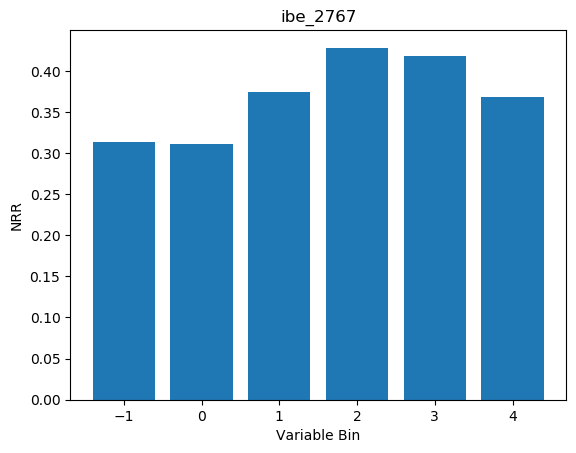

               count       NRR    min    max
ibe_2767_bin                                
-1.0          205660  0.313128   -9.0   -9.0
 0.0            5862  0.310645    7.0   91.0
 1.0            5876  0.373894   92.0  186.0
 2.0            5772  0.428101  187.0  320.0
 3.0            5807  0.417427  321.0  527.0
 4.0            5818  0.368683  528.0  999.0




Variable Rank:  70
Variable Source:  InfoBase
Variable Definition:  Community Involvement - Causes Supported Financially Childrens


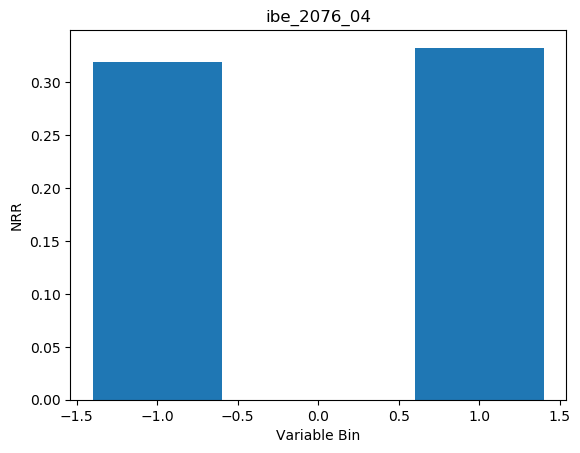

                  count       NRR  min  max
ibe_2076_04_bin                            
-1.0             194013  0.318999 -9.0 -9.0
 1.0              40782  0.332647  1.0  1.0




Variable Rank:  71
Variable Source:  InfoBase
Variable Definition:  Home Length of Residence - 100% LOR


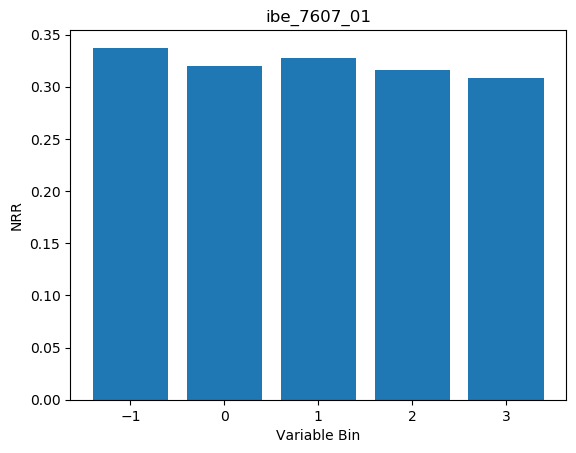

                 count       NRR   min   max
ibe_7607_01_bin                             
-1.0             58543  0.337359  -9.0  -9.0
 0.0             40705  0.319690   0.0   1.0
 1.0             35357  0.327177   2.0   4.0
 2.0             32552  0.315956   5.0  10.0
 3.0             67638  0.308111  11.0  15.0




Variable Rank:  72
Variable Source:  promo
Variable Definition:  fht_36mo_standard


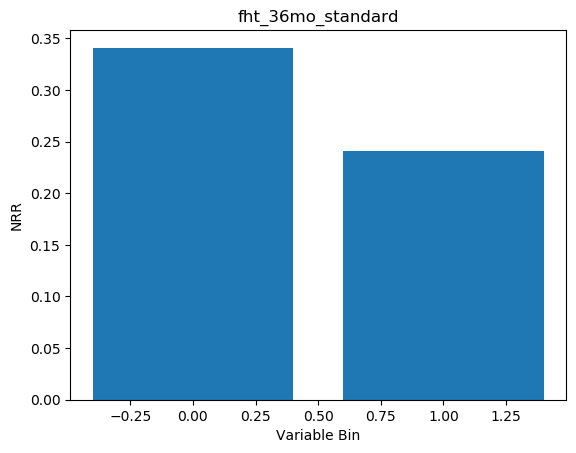

                        count       NRR  min   max
fht_36mo_standard_bin                             
0.0                    188856  0.340879  0.0   3.0
1.0                     45939  0.241168  4.0  31.0




Variable Rank:  73
Variable Source:  Experian
Variable Definition:  Maximum credit amount on open revolving bankcard trades reported in the last 6 months excluding authorized user trades


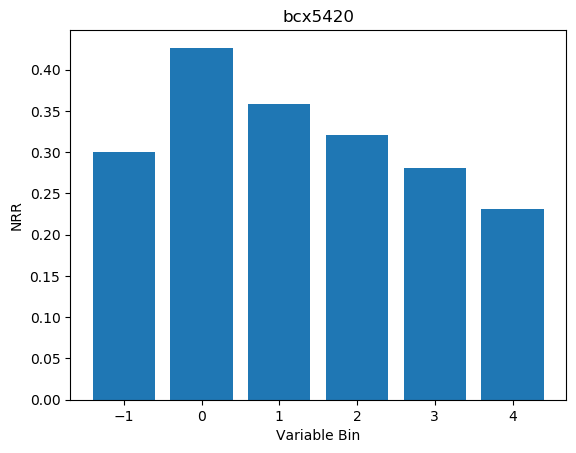

             count       NRR     min          max
bcx5420_bin                                      
-1.0         59681  0.300028    -9.0  999999998.0
 0.0         40361  0.426526    24.0        300.0
 1.0         43899  0.358004   301.0        500.0
 2.0         20814  0.320746   501.0        751.0
 3.0         35020  0.280868   752.0       1800.0
 4.0         35020  0.231496  1802.0      50000.0




Variable Rank:  74
Variable Source:  Experian
Variable Definition:  Percentage of balance on open revolving trades reported in the last 6 months that are revolving retail trades (requires 2 or more qualified trades)


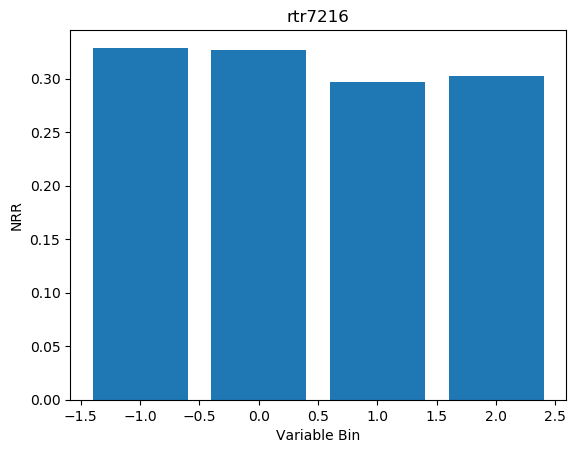

             count       NRR   min    max
rtr7216_bin                              
-1.0         96498  0.328908  -9.0  998.0
 0.0         83188  0.326826   0.0   10.0
 1.0         27495  0.296927  11.0   42.0
 2.0         27614  0.302926  43.0  100.0




Variable Rank:  75
Variable Source:  Experian
Variable Definition:  Total number of occurrences of 30-180 days delinquency in the last 12 months on trades excluding collections and other unsatisfied derogatory


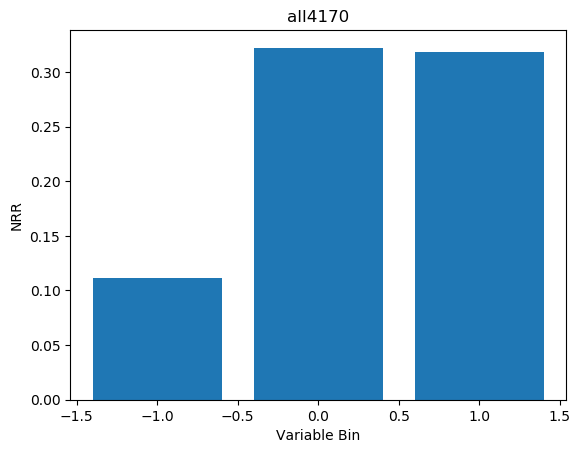

              count       NRR  min    max
all4170_bin                              
-1.0              9  0.111111 -9.0  997.0
 0.0         191591  0.322129  0.0    2.0
 1.0          43195  0.318046  3.0  290.0




Variable Rank:  76
Variable Source:  Experian
Variable Definition:  Total number of credit union trades


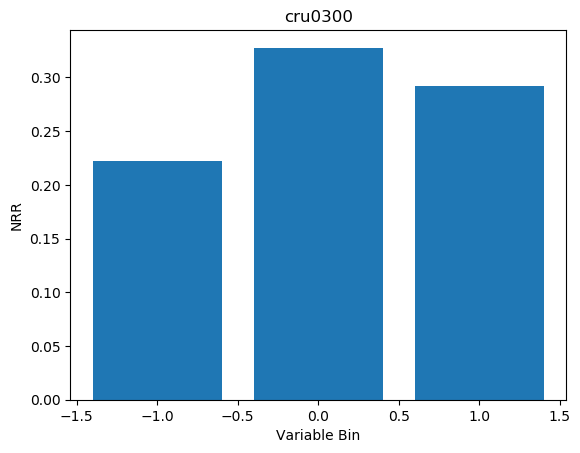

              count       NRR  min   max
cru0300_bin                             
-1.0              9  0.222222 -9.0  90.0
 0.0         193626  0.327673  0.0   1.0
 1.0          41160  0.291740  2.0  85.0




Variable Rank:  77
Variable Source:  Experian
Variable Definition:  Number of months since the most recent public record filed


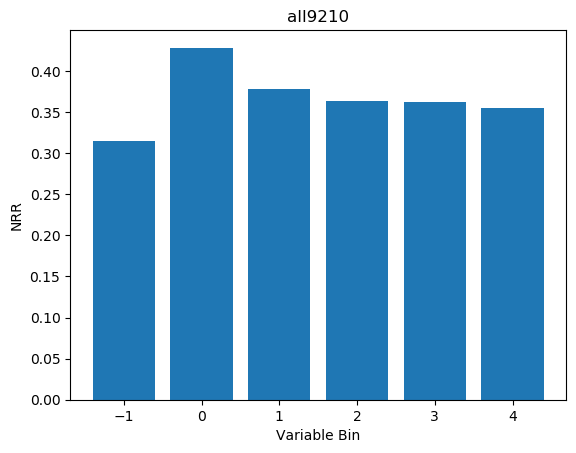

              count       NRR   min     max
all9210_bin                                
-1.0         211576  0.315220  -9.0  9999.0
 0.0           4673  0.428205   0.0    18.0
 1.0           4711  0.377415  19.0    35.0
 2.0           4550  0.363736  36.0    55.0
 3.0           4759  0.362471  56.0    79.0
 4.0           4526  0.354397  80.0   118.0




Variable Rank:  78
Variable Source:  Experian
Variable Definition:  Total number of revolving trades excluding home equity line of credit trades


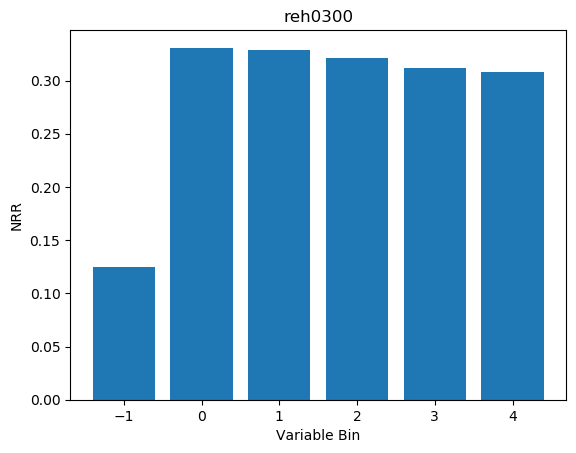

             count       NRR  min   max
reh0300_bin                            
-1.0             8  0.125000 -9.0  90.0
 0.0         81051  0.330866  0.0   2.0
 1.0         30556  0.328381  3.0   3.0
 2.0         42328  0.320922  4.0   5.0
 3.0         36031  0.311565  6.0   8.0
 4.0         44821  0.307758  9.0  89.0




Variable Rank:  79
Variable Source:  Experian
Variable Definition:  Maximum credit amount on trades excluding collections and student loans including indeterminates


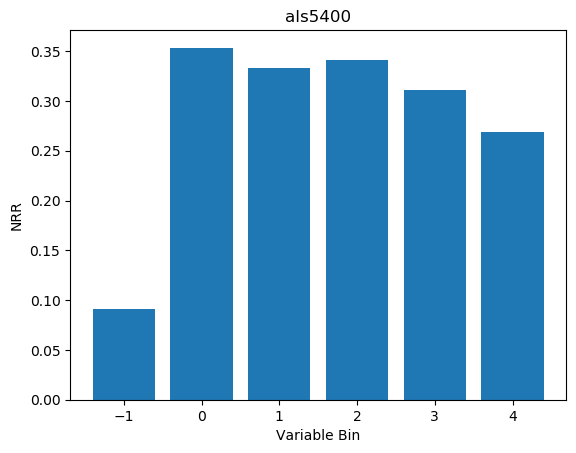

             count       NRR      min          max
als5400_bin                                       
-1.0            11  0.090909     -9.0  999999998.0
 0.0         46960  0.353407      0.0       3775.0
 1.0         46956  0.332716   3776.0      14954.0
 2.0         46958  0.341049  14955.0      22875.0
 3.0         46953  0.310694  22876.0      40676.0
 4.0         46957  0.269033  40678.0   82113592.0




Variable Rank:  80
Variable Source:  Experian
Variable Definition:  Number of months since the most recent real estate and property management inquiry (no deduplication)


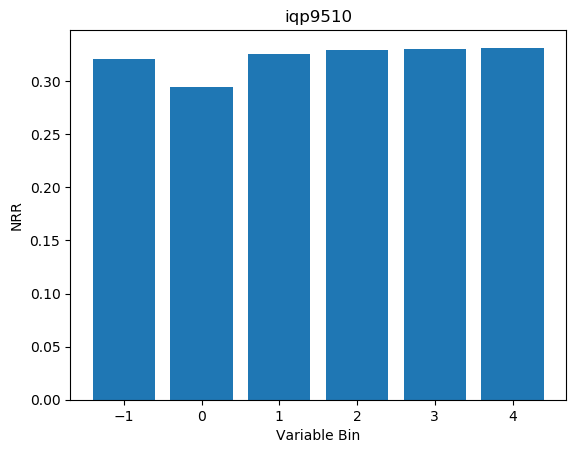

              count       NRR   min     max
iqp9510_bin                                
-1.0         218120  0.321364  -9.0  9999.0
 0.0           3862  0.294925   0.0     5.0
 1.0           2809  0.326095   6.0     9.0
 2.0           3346  0.329348  10.0    14.0
 3.0           3392  0.330189  15.0    19.0
 4.0           3266  0.331598  20.0    24.0




Variable Rank:  81
Variable Source:  Experian
Variable Definition:  Percentage of trades excluding collections that have a balance > $0 reported in the last 6 months excluding derogatory


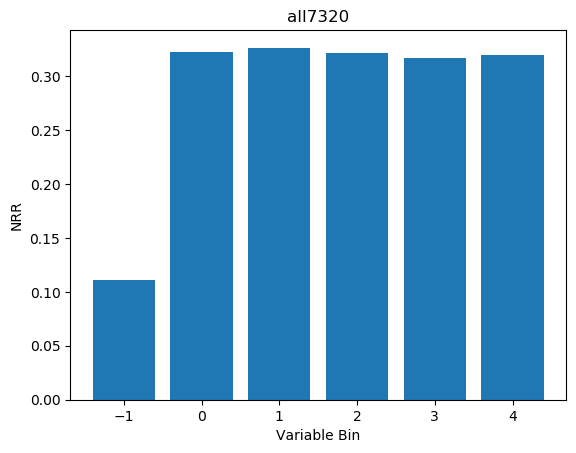

             count       NRR   min    max
all7320_bin                              
-1.0             9  0.111111  -9.0  997.0
 0.0         53400  0.322715   0.0   25.0
 1.0         45465  0.326273  26.0   40.0
 2.0         44428  0.321441  41.0   56.0
 3.0         46617  0.316837  57.0   75.0
 4.0         44876  0.319480  76.0  100.0




Variable Rank:  82
Variable Source:  promo
Variable Definition:  fht_12mo_standard


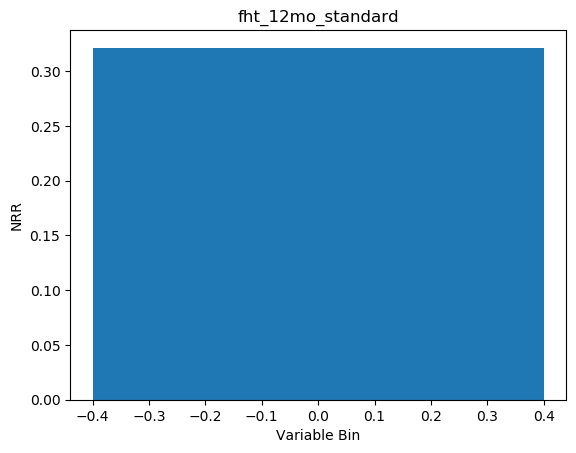

                        count      NRR  min  max
fht_12mo_standard_bin                           
0.0                    234795  0.32137  0.0  5.0




Variable Rank:  83
Variable Source:  Experian
Variable Definition:  Overall balance to credit amount ratio on open revolving retail trades reported in the last 6 months with credit amount > $0


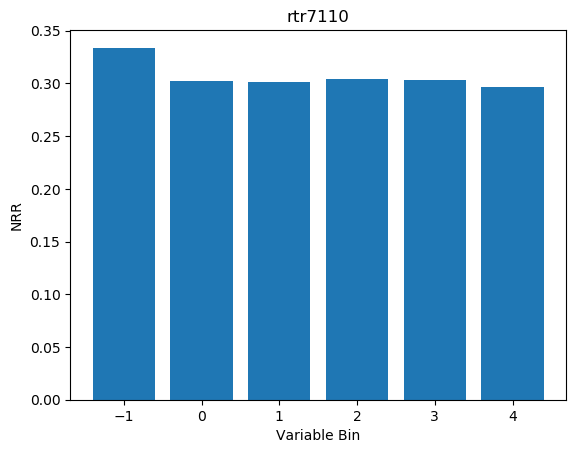

              count       NRR   min    max
rtr7110_bin                               
-1.0         144802  0.333780  -9.0  998.0
 0.0          18293  0.301864   0.0   10.0
 1.0          17879  0.300912  11.0   40.0
 2.0          18181  0.303779  41.0   65.0
 3.0          18036  0.303449  66.0   86.0
 4.0          17604  0.296864  87.0  609.0




Variable Rank:  84
Variable Source:  miacs
Variable Definition:  Renter-occupied Housing Units - Average Gross Rent


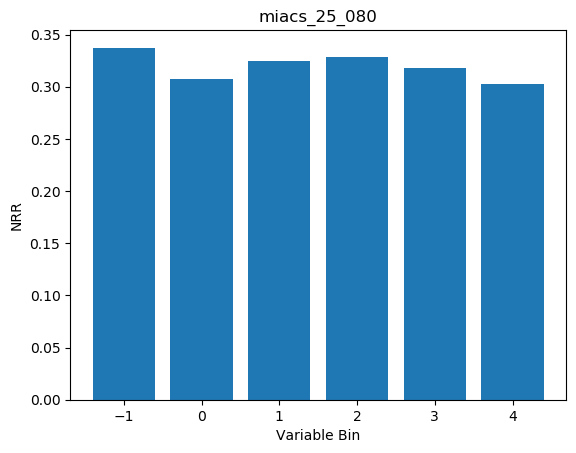

                  count       NRR     min     max
miacs_25_080_bin                                 
-1.0              58543  0.337359    -9.0    -9.0
 0.0              35345  0.306946     0.0   635.0
 1.0              35283  0.324746   636.0   811.0
 2.0              35133  0.328552   812.0   984.0
 3.0              35290  0.317937   985.0  1248.0
 4.0              35201  0.302151  1249.0  4142.0




Variable Rank:  85
Variable Source:  miacs
Variable Definition:  Households - % $150000+


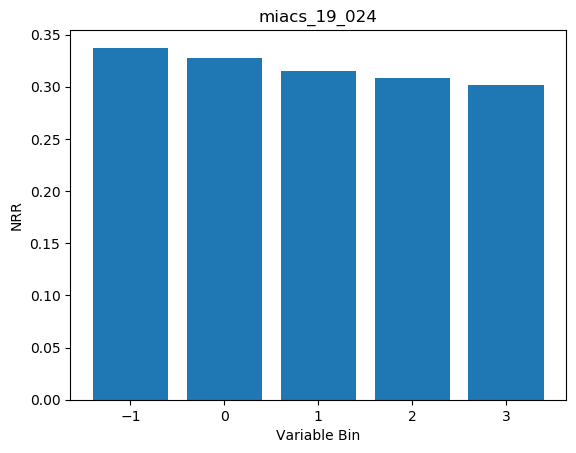

                  count       NRR   min   max
miacs_19_024_bin                             
-1.0              58543  0.337359  -9.0  -9.0
 0.0              70799  0.327137   0.0   3.0
 1.0              39883  0.314695   4.0   7.0
 2.0              32104  0.308778   8.0  13.0
 3.0              33466  0.301231  14.0  99.0




Variable Rank:  86
Variable Source:  Experian
Variable Definition:  Total number of retail trades


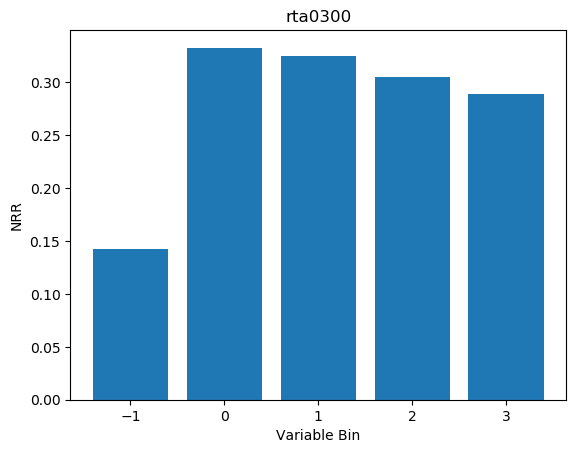

              count       NRR  min   max
rta0300_bin                             
-1.0              7  0.142857 -9.0  90.0
 0.0         136450  0.332664  0.0   1.0
 1.0          31134  0.325111  2.0   2.0
 2.0          32135  0.305088  3.0   4.0
 3.0          35069  0.289059  5.0  63.0




Variable Rank:  87
Variable Source:  Experian
Variable Definition:  Maximum single actual payment to balance ratio on an open credit card trade reported in the last 6 months


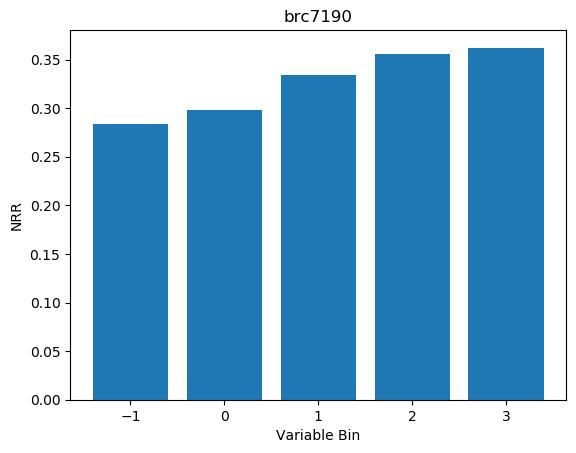

             count       NRR   min    max
brc7190_bin                              
-1.0         40294  0.284013  -9.0  998.0
 0.0         79264  0.297903   0.0    6.0
 1.0         38057  0.334052   7.0   17.0
 2.0         38346  0.355239  18.0   48.0
 3.0         38834  0.362157  49.0  989.0




Variable Rank:  88
Variable Source:  Experian
Variable Definition:  Number of months since the most recent 60 or more days delinquency or derogatory on bankcard revolving and charge trades including indeterminates


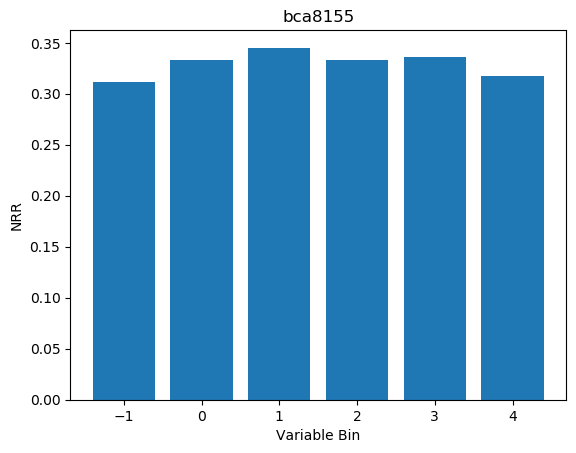

              count       NRR   min     max
bca8155_bin                                
-1.0         130483  0.311964  -9.0  9998.0
 0.0          23197  0.333017   0.0     9.0
 1.0          20399  0.345164  10.0    18.0
 2.0          18998  0.333140  19.0    28.0
 3.0          21850  0.335973  29.0    45.0
 4.0          19868  0.317797  46.0    82.0




Variable Rank:  89
Variable Source:  Experian
Variable Definition:  Percentage of trades excluding collections that are bankcard revolving and charge trades


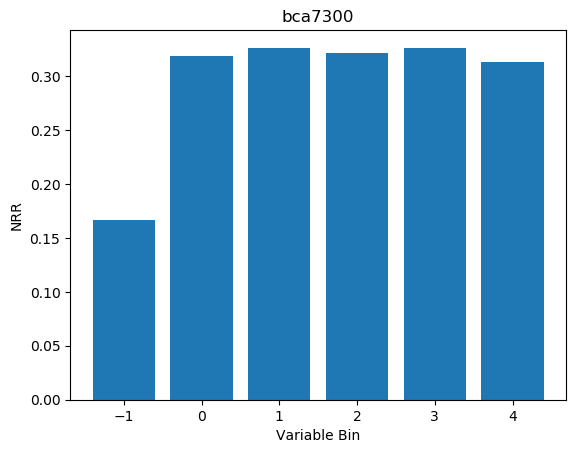

             count       NRR   min    max
bca7300_bin                              
-1.0             6  0.166667  -9.0   -9.0
 0.0         50243  0.318213   0.0   13.0
 1.0         54006  0.326279  14.0   25.0
 2.0         37403  0.321472  26.0   35.0
 3.0         50815  0.326183  36.0   50.0
 4.0         42322  0.313005  51.0  100.0




Variable Rank:  90
Variable Source:  InfoBase
Variable Definition:  Vehicle - Known Owned Number


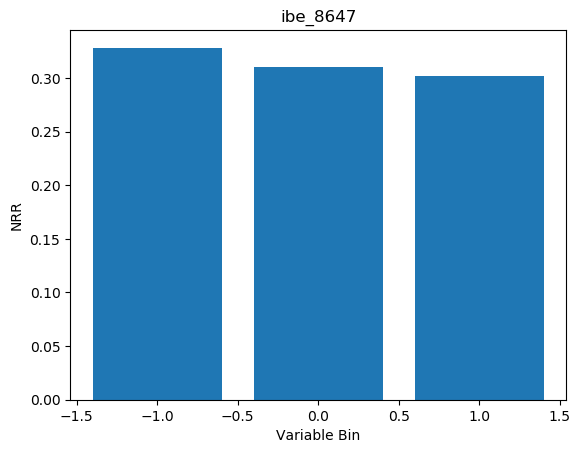

               count       NRR  min  max
ibe_8647_bin                            
-1.0          157779  0.328181 -9.0 -9.0
 0.0           51856  0.310321  1.0  2.0
 1.0           25160  0.301431  3.0  3.0




Variable Rank:  91
Variable Source:  Experian
Variable Definition:  Overall balance to credit amount ratio on open trades opened in the last 3 months with credit amount > $0


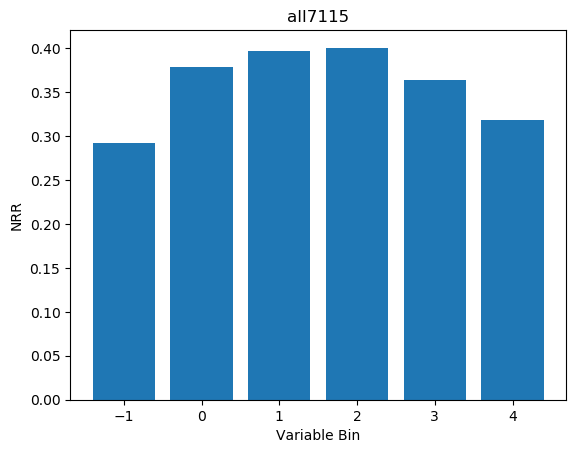

              count       NRR   min    max
all7115_bin                               
-1.0         148155  0.291850  -9.0  996.0
 0.0          17851  0.379026   0.0   25.0
 1.0          16954  0.397251  26.0   62.0
 2.0          17331  0.400496  63.0   88.0
 3.0          17321  0.363663  89.0   98.0
 4.0          17183  0.318687  99.0  422.0




Variable Rank:  92
Variable Source:  Experian
Variable Definition:  Number of months since the most recent public record bankruptcy filed excluding dismissed and discharged


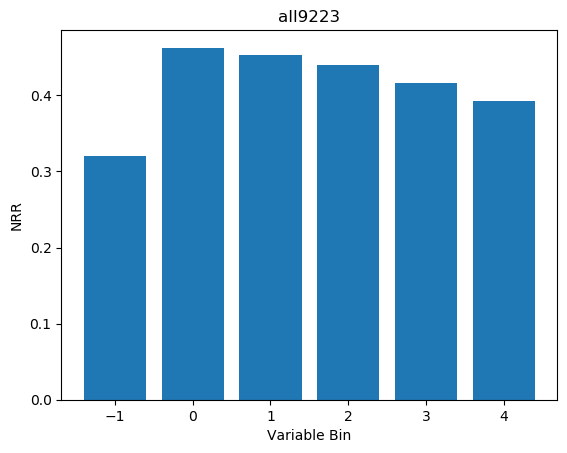

              count       NRR   min     max
all9223_bin                                
-1.0         231697  0.319875  -9.0  9999.0
 0.0            627  0.462520   0.0    14.0
 1.0            652  0.452454  15.0    24.0
 2.0            635  0.439370  25.0    35.0
 3.0            592  0.415541  36.0    49.0
 4.0            592  0.391892  50.0   117.0




Variable Rank:  93
Variable Source:  Experian
Variable Definition:  Overall balance to credit amount ratio on open student trades including deferred reported in the last 6 months with credit amount > $0


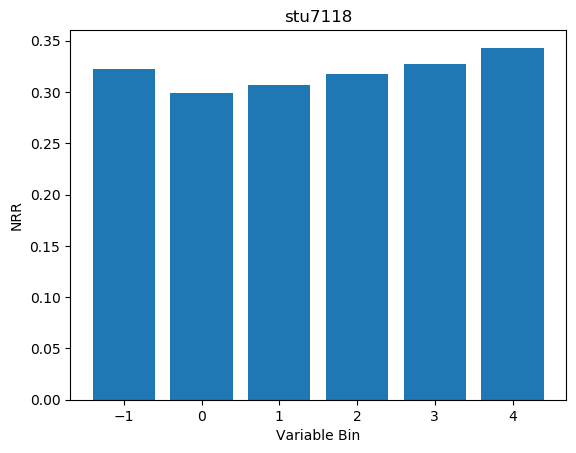

              count       NRR    min    max
stu7118_bin                                
-1.0         178629  0.322333   -9.0  998.0
 0.0          13069  0.298722    0.0  101.0
 1.0          10006  0.306416  102.0  108.0
 2.0          10955  0.318028  109.0  119.0
 3.0          11046  0.327539  120.0  138.0
 4.0          11090  0.343192  139.0  968.0




Variable Rank:  94
Variable Source:  InfoBase
Variable Definition:  Purchase Apparel from Walmart Rank


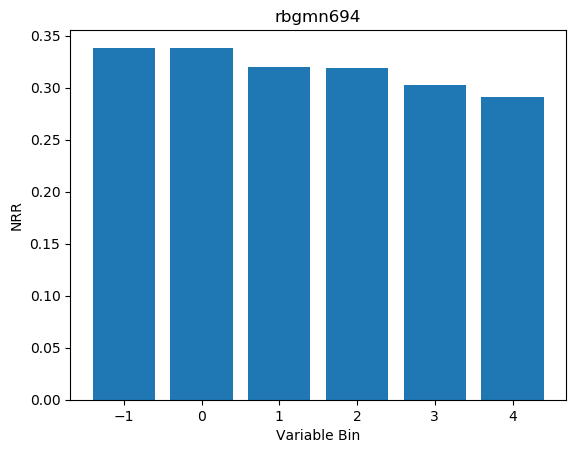

              count       NRR   min   max
rbgmn694_bin                             
-1.0          64593  0.338411  -9.0  -9.0
 0.0          38294  0.337703   1.0   3.0
 1.0          35305  0.319643   4.0   6.0
 2.0          31679  0.318760   7.0   9.0
 3.0          33827  0.302776  10.0  13.0
 4.0          31097  0.290703  14.0  20.0




Variable Rank:  95
Variable Source:  promo
Variable Definition:  fht_36mo_bigbook


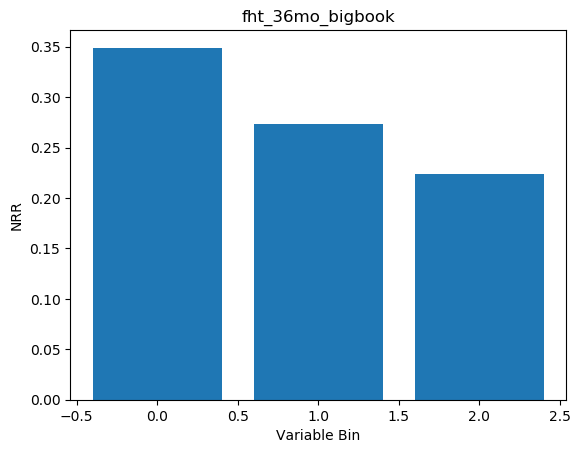

                       count       NRR  min   max
fht_36mo_bigbook_bin                             
0.0                   171406  0.349008  0.0   1.0
1.0                    28980  0.273844  2.0   2.0
2.0                    34409  0.223721  3.0  12.0




Variable Rank:  96
Variable Source:  miacs
Variable Definition:  Owner-occupied Housing Units - % Prior to 1970


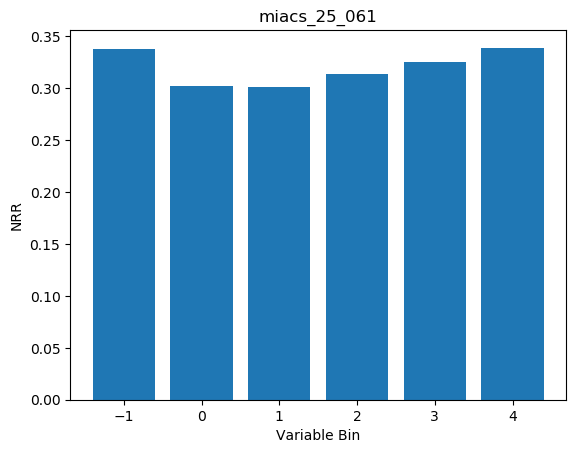

                  count       NRR   min   max
miacs_25_061_bin                             
-1.0              58543  0.337359  -9.0  -9.0
 0.0              36332  0.302295   0.0   8.0
 1.0              35120  0.301538   9.0  25.0
 2.0              35442  0.313301  26.0  50.0
 3.0              34853  0.325166  51.0  82.0
 4.0              34505  0.338965  83.0  99.0




Variable Rank:  97
Variable Source:  Experian
Variable Definition:  Number of months since the most recent banking, financial, or credit union collection including indeterminates


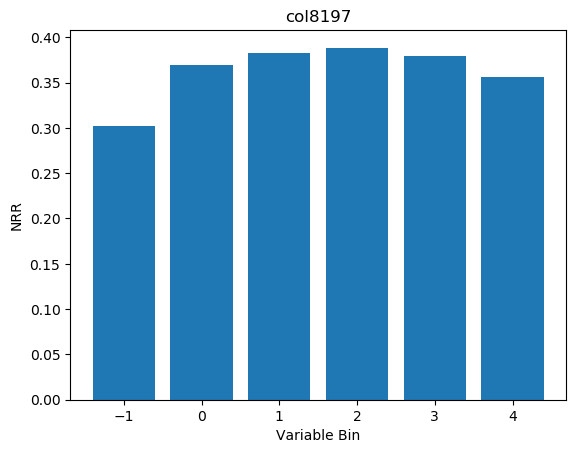

              count       NRR   min     max
col8197_bin                                
-1.0         173771  0.302438  -9.0  9998.0
 0.0          13076  0.368920   1.0    12.0
 1.0          11348  0.383063  13.0    20.0
 2.0          12483  0.388448  21.0    30.0
 3.0          12400  0.379435  31.0    43.0
 4.0          11717  0.356405  44.0    81.0




Variable Rank:  98
Variable Source:  miacs
Variable Definition:  Total Population - % Other (Tract Level)


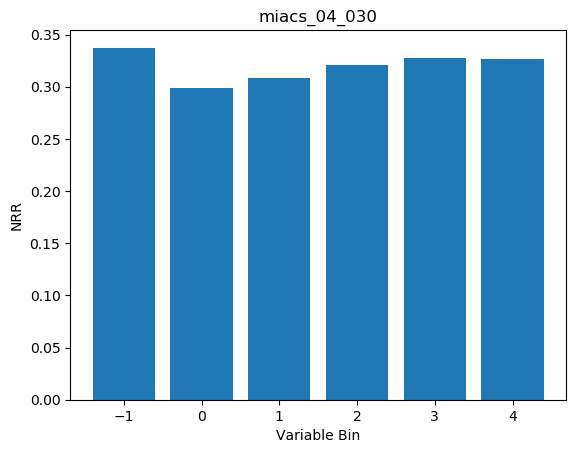

                  count       NRR   min   max
miacs_04_030_bin                             
-1.0              58543  0.337359  -9.0  -9.0
 0.0              38212  0.298466   0.0  21.0
 1.0              33014  0.308415  22.0  32.0
 2.0              35585  0.320697  33.0  47.0
 3.0              34936  0.327341  48.0  67.0
 4.0              34505  0.326648  68.0  99.0




Variable Rank:  99
Variable Source:  Experian
Variable Definition:  Maximum single balance to credit amount ratio on an open trade reported in the last 6 months with credit amount > $0


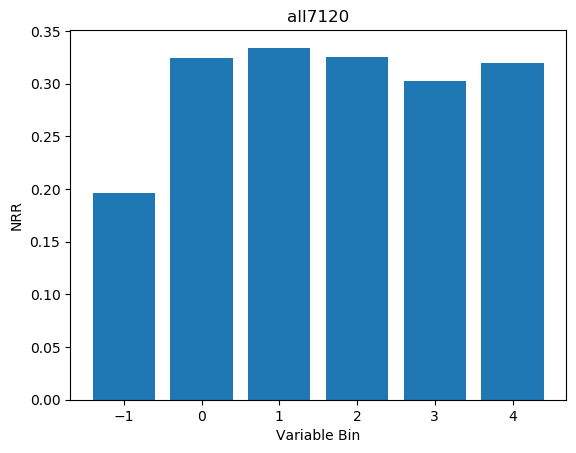

             count       NRR    min    max
all7120_bin                               
-1.0          1090  0.196330   -9.0  997.0
 0.0         48030  0.324589    0.0   82.0
 1.0         49279  0.334037   83.0   96.0
 2.0         51648  0.324969   97.0  100.0
 3.0         38590  0.302073  101.0  108.0
 4.0         46158  0.319555  109.0  987.0




Variable Rank:  100
Variable Source:  Experian
Variable Definition:  Number of months since the oldest real-estate property management trade was opened including indeterminates


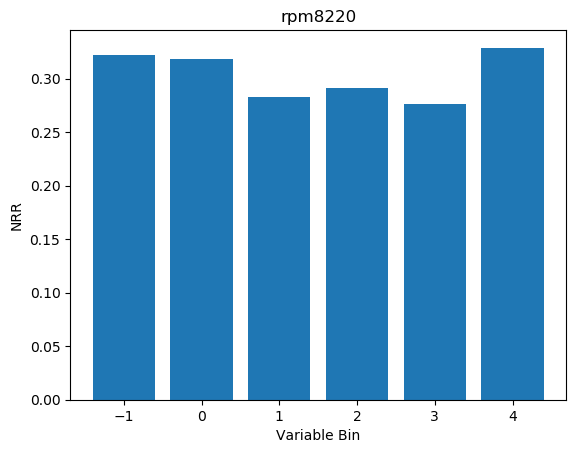

              count       NRR   min     max
rpm8220_bin                                
-1.0         231304  0.321702  -9.0  9998.0
 0.0            704  0.318182   1.0    15.0
 1.0            721  0.282940  16.0    31.0
 2.0            687  0.291121  32.0    48.0
 3.0            695  0.276259  49.0    74.0
 4.0            684  0.328947  75.0   234.0






In [197]:
import numpy as np
import matplotlib.pyplot as plt

# Update these 3 parameters
target = 'RESPONSE_FLG'
profile_vars = top_ten_vars

#profile_vars = ibe_vars
mdl_data = val_final2

i = 0 

for var in profile_vars['Variable']:
    
    #writer = pd.ExcelWriter('Top 10 Variable Reduction Report (8-18-22).xlsx', engine='xlsxwriter')
    
    first_num = int(repr(int(mdl_data[var].max()))[0])

    if profile_vars['Source'][i] == 'Experian' and first_num == 9:

        var_profile = mdl_data[[target,var]]
        var_profile = var_profile.reset_index(drop=True)

        max_def = var_profile[var].max() - int(repr(int(var_profile[var].max()))[-1])


        var_profile[var+'_bin'] = np.where(var_profile[var] == -9, -1, var_profile[var])
        var_profile[var+'_bin'] = np.where(var_profile[var] >= max_def, -1, var_profile[var+'_bin'])

        def_group = var_profile[var_profile[var+'_bin']==-1]

        no_def_group = var_profile[var_profile[var+'_bin']!=-1]
        no_def_group = no_def_group.reset_index(drop=True)

        if len(no_def_group[var].value_counts()) <= 2:
            comb_group = pd.concat([def_group,no_def_group],axis=0)

        else:
            no_def_group[var+'_bin'] = pd.qcut(no_def_group[var], q=5, precision=0,duplicates='drop',labels=False)

            comb_group = pd.concat([def_group,no_def_group],axis=0)




        comb_group2=comb_group.groupby([var+'_bin'])[target].agg(['count','mean']).sort_values(var+'_bin',ascending=True)
        comb_group2.columns = ['count','NRR']

        #print("Variable Rank: ",i+1)
        print("Variable Rank: ",final_var_summary[final_var_summary['Variable']==var].index.item()+1)
        print("Variable Source: ",profile_vars['Source'][i])
        print("Variable Definition: ",profile_vars['Description'][i])
            
            

        plt.bar(comb_group2.index, comb_group2['NRR'])
        plt.title(var)
        plt.xlabel('Variable Bin')
        plt.ylabel('NRR')
        plt.show()

        #plt.savefig(var+'.png')

        comb_group3=comb_group.groupby([var+'_bin'])[var].agg(['min','max']).sort_values(var+'_bin',ascending=True)
        comb_group3.columns = ['min','max']

        comb_group_final = pd.concat([comb_group2,comb_group3],axis=1)



        print(comb_group_final )
        print('\n')
        print('\n')

        #comb_group2.to_excel(writer, sheet_name=var)
        #worksheet = writer.sheets[var]
        #worksheet.insert_image('E3',var+'.png')

        #writer.save()


    else:

        var_profile = mdl_data[[target,var]]
        var_profile = var_profile.reset_index(drop=True)


        var_profile[var+'_bin'] = np.where(var_profile[var] == -9, -1, var_profile[var])

        def_group = var_profile[var_profile[var+'_bin']==-1]

        no_def_group = var_profile[var_profile[var+'_bin']!=-1]
        no_def_group = no_def_group.reset_index(drop=True)

        if len(no_def_group[var].value_counts()) <= 2:
            comb_group = pd.concat([def_group,no_def_group],axis=0)

        else:
            no_def_group[var+'_bin'] = pd.qcut(no_def_group[var], q=5, precision=0,duplicates='drop',labels=False)

            comb_group = pd.concat([def_group,no_def_group],axis=0)

        comb_group2=comb_group.groupby([var+'_bin'])[target].agg(['count','mean']).sort_values(var+'_bin',ascending=True)
        comb_group2.columns = ['count','NRR']

        #print("Variable Rank: ",i+1)
        print("Variable Rank: ",final_var_summary[final_var_summary['Variable']==var].index.item()+1)
        print("Variable Source: ",profile_vars['Source'][i])
        print("Variable Definition: ",profile_vars['Description'][i])

        plt.bar(comb_group2.index, comb_group2['NRR'])
        plt.title(var)
        plt.xlabel('Variable Bin')
        plt.ylabel('NRR')
        plt.show()

        #plt.savefig(var+'.png')

        comb_group3=comb_group.groupby([var+'_bin'])[var].agg(['min','max']).sort_values(var+'_bin',ascending=True)
        comb_group3.columns = ['min','max']

        comb_group_final = pd.concat([comb_group2,comb_group3],axis=1)

        print(comb_group_final )
        print('\n')
        print('\n')

        #var_profile2.to_excel(writer, sheet_name=var)
        #worksheet = writer.sheets[var]
        #worksheet.insert_image('E3',var+'.png')

        #writer.save()


    i=i+1  
              

# Create Predictor Variable and Target Variable Relationship charts

Variable Rank:  1
Variable Definition:  Average credit amount on open revolving bankcard trades reported in the last 6 months with credit amount > $0


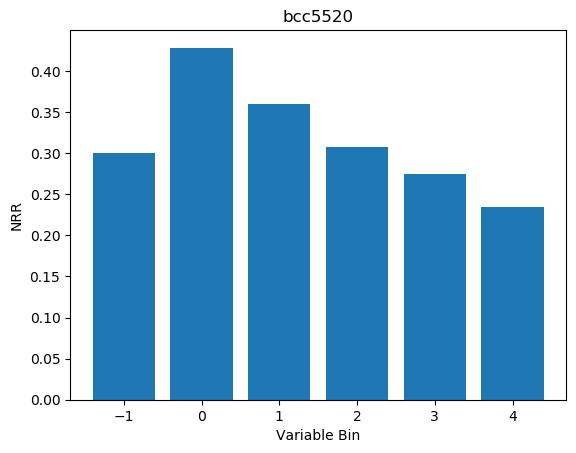

             count       NRR     min          max
bcc5520_bin                                      
-1.0         50491  0.300232    -9.0  999999998.0
 0.0         39761  0.428385    24.0        300.0
 1.0         52311  0.359580   301.0        500.0
 2.0         18518  0.307755   501.0        657.0
 3.0         36937  0.274197   658.0       1367.0
 4.0         36777  0.234576  1368.0      73000.0




Variable Rank:  2
Variable Definition:  Number of months since the oldest open and presently satisfactory revolving trade was opened excluding home equity line of credit trades


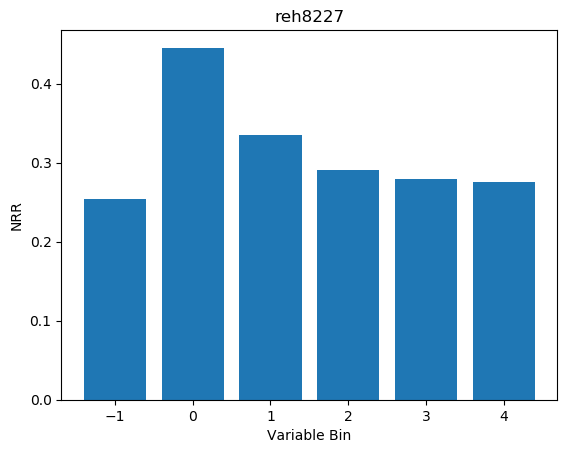

             count       NRR   min     max
reh8227_bin                               
-1.0         22743  0.254320  -9.0  9998.0
 0.0         47943  0.445550   0.0     8.0
 1.0         38422  0.335277   9.0    18.0
 2.0         42026  0.290963  19.0    38.0
 3.0         41726  0.278867  39.0    76.0
 4.0         41935  0.275784  77.0   752.0




Variable Rank:  3
Variable Definition:  fht_36mo_total


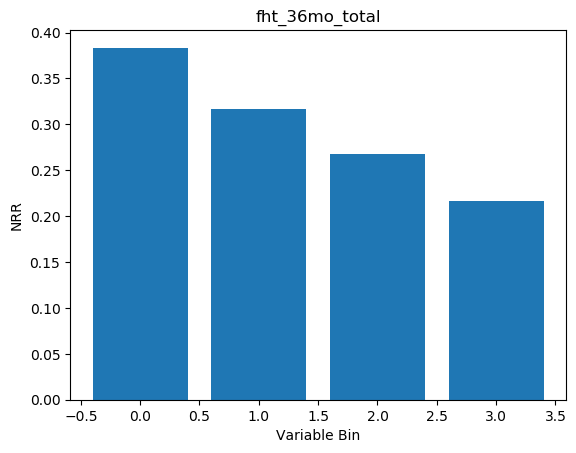

                     count       NRR   min   max
fht_36mo_total_bin                              
0.0                 112072  0.383441   0.0   2.0
1.0                  34762  0.317070   3.0   4.0
2.0                  47160  0.267875   5.0   9.0
3.0                  40801  0.216367  10.0  39.0




Variable Rank:  4
Variable Definition:  Percentage of trades including collections that are never delinquent or derogatory


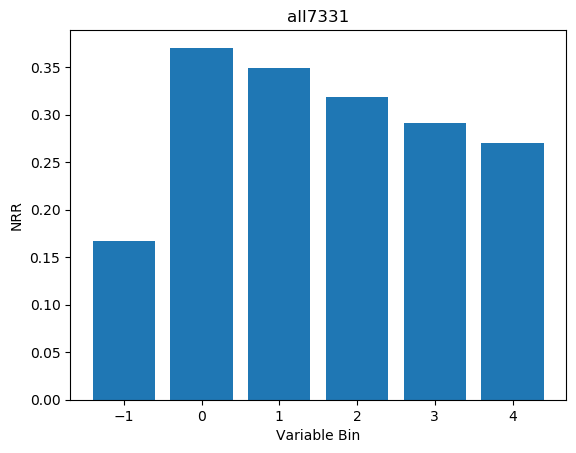

             count       NRR   min    max
all7331_bin                              
-1.0             6  0.166667  -9.0   -9.0
 0.0         48050  0.370531   0.0   33.0
 1.0         55026  0.349253  34.0   50.0
 2.0         39119  0.318157  51.0   65.0
 3.0         46675  0.291119  66.0   80.0
 4.0         45919  0.270019  81.0  100.0




Variable Rank:  5
Variable Definition:  fht_nbr_times_vertical_36mo


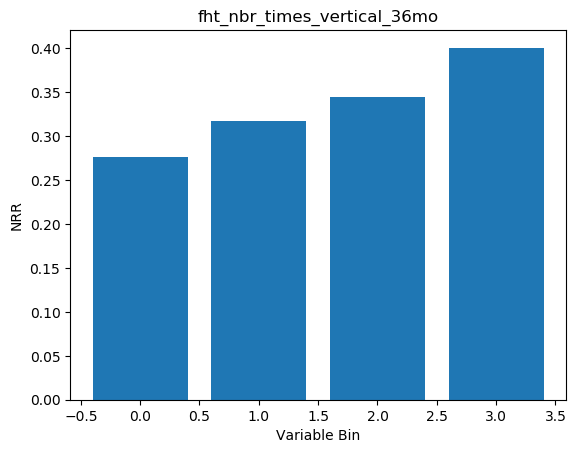

                                  count       NRR   min    max
fht_nbr_times_vertical_36mo_bin                               
0.0                              102356  0.276515   0.0    3.0
1.0                               39620  0.317441   4.0    8.0
2.0                               46518  0.344275   9.0   21.0
3.0                               46301  0.400877  22.0  360.0




Variable Rank:  6
Variable Definition:  Worst ever status on a trade in the last 12 months including non-medical collections and indeterminates


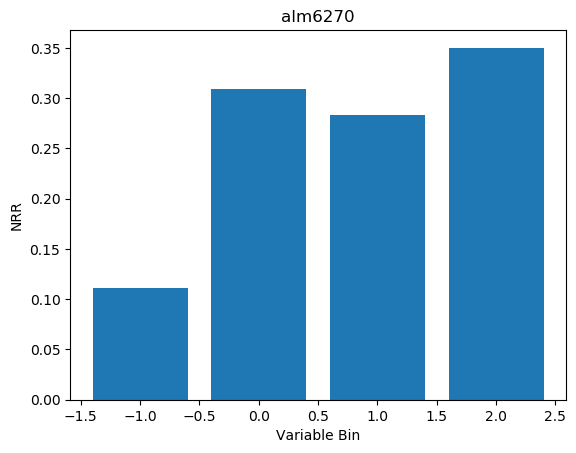

              count       NRR   min    max
alm6270_bin                               
-1.0              9  0.111111  -9.0  997.0
 0.0         116577  0.309461   0.0    1.0
 1.0          30145  0.283629  30.0   60.0
 2.0          88064  0.350075  90.0  400.0




Variable Rank:  7
Variable Definition:  Total number of trades ever derogatory including non-medical collections


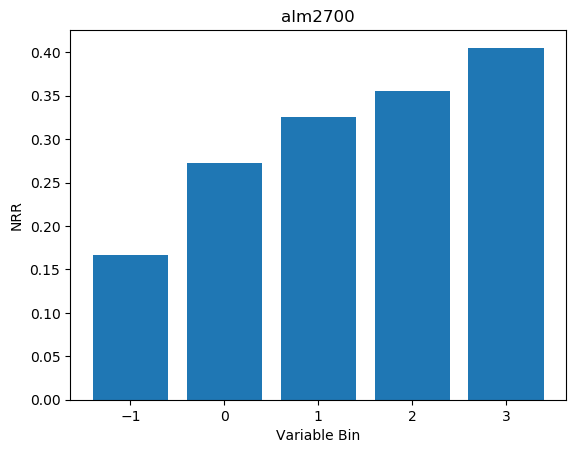

              count       NRR  min   max
alm2700_bin                             
-1.0              6  0.166667 -9.0  -9.0
 0.0         100807  0.272729  0.0   1.0
 1.0          58454  0.325846  2.0   3.0
 2.0          33671  0.355142  4.0   5.0
 3.0          41857  0.405117  6.0  54.0




Variable Rank:  8
Variable Definition:  Percentage of trades including collections that are ever derogatory


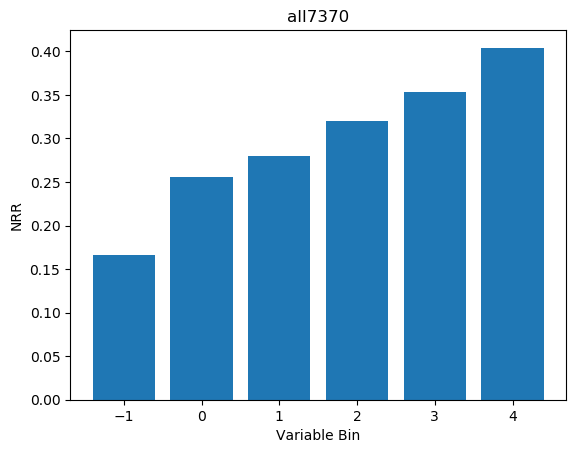

             count       NRR   min    max
all7370_bin                              
-1.0             6  0.166667  -9.0   -9.0
 0.0         48431  0.255766   0.0    8.0
 1.0         45704  0.279822   9.0   22.0
 2.0         47388  0.319743  23.0   35.0
 3.0         50998  0.353818  36.0   50.0
 4.0         42268  0.404159  51.0  100.0




Variable Rank:  9
Variable Definition:  Number of months since the most recently opened open trade with a balance > $0


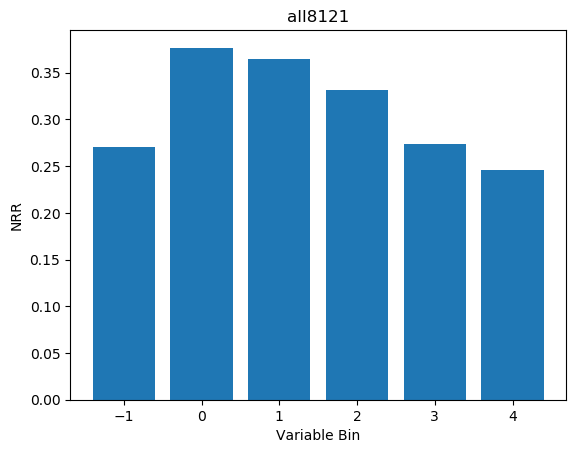

             count       NRR   min     max
all8121_bin                               
-1.0          4083  0.270634  -9.0  9996.0
 0.0         57104  0.376699   0.0     2.0
 1.0         44135  0.364427   3.0     4.0
 2.0         44468  0.331317   5.0     8.0
 3.0         40491  0.273666   9.0    18.0
 4.0         44514  0.245810  19.0   641.0




Variable Rank:  10
Variable Definition:  Longest consecutive months with a satisfactory balance activity status on trades, excluding collections and other unsatisfied derogatory including indeterminates


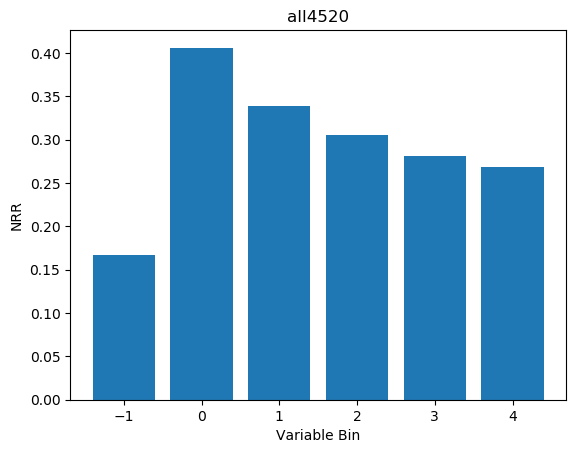

             count       NRR   min   max
all4520_bin                             
-1.0             6  0.166667  -9.0  -9.0
 0.0         49231  0.406228   0.0  17.0
 1.0         45699  0.339438  18.0  29.0
 2.0         47921  0.305419  30.0  44.0
 3.0         45825  0.281724  45.0  65.0
 4.0         46113  0.268861  66.0  84.0






In [67]:
import numpy as np
import matplotlib.pyplot as plt

#import openpyxl
#import xlsxwriter




i = 0 

for var in top_ten_vars['Variable']:
    
    #writer = pd.ExcelWriter('Top 10 Variable Reduction Report (8-18-22).xlsx', engine='xlsxwriter')
    
    first_num = int(repr(int(val_final2[var].max()))[0])
    
    if top_ten_vars['Source'][i] == 'Experian' and first_num == 9:
        
        var_profile = val_final2[['RESPONSE_FLG',var]]
        var_profile = var_profile.reset_index(drop=True)

        max_def = var_profile[var].max() - int(repr(int(var_profile[var].max()))[-1])
        
        
        var_profile[var+'_bin'] = np.where(var_profile[var] == -9, -1, var_profile[var])
        var_profile[var+'_bin'] = np.where(var_profile[var] >= max_def, -1, var_profile[var+'_bin'])

        def_group = var_profile[var_profile[var+'_bin']==-1]

        no_def_group = var_profile[var_profile[var+'_bin']!=-1]
        no_def_group = no_def_group.reset_index(drop=True)
        
        if len(no_def_group[var].value_counts()) == 1:
            comb_group = pd.concat([def_group,no_def_group],axis=0)
    
        else:
            no_def_group[var+'_bin'] = pd.qcut(no_def_group[var], q=5, precision=0,duplicates='drop',labels=False)

            comb_group = pd.concat([def_group,no_def_group],axis=0)
            

        

        comb_group2=comb_group.groupby([var+'_bin'])['RESPONSE_FLG'].agg(['count','mean']).sort_values(var+'_bin',ascending=True)
        comb_group2.columns = ['count','NRR']
        
        #print("Variable Rank: ",i+1)
        print("Variable Rank: ",final_var_summary[final_var_summary['Variable']==var].index.item()+1)
        print("Variable Definition: ",top_ten_vars['Description'][i])

        plt.bar(comb_group2.index, comb_group2['NRR'])
        plt.title(var)
        plt.xlabel('Variable Bin')
        plt.ylabel('NRR')
        plt.show()
        
        #plt.savefig(var+'.png')
        
        comb_group3=comb_group.groupby([var+'_bin'])[var].agg(['min','max']).sort_values(var+'_bin',ascending=True)
        comb_group3.columns = ['min','max']
        
        comb_group_final = pd.concat([comb_group2,comb_group3],axis=1)
        
        

        print(comb_group_final )
        print('\n')
        print('\n')
        
        #comb_group2.to_excel(writer, sheet_name=var)
        #worksheet = writer.sheets[var]
        #worksheet.insert_image('E3',var+'.png')
        
        #writer.save()
        
        
    else:
        
        var_profile = val_final2[['RESPONSE_FLG',var]]
        var_profile = var_profile.reset_index(drop=True)


        var_profile[var+'_bin'] = np.where(var_profile[var] == -9, -1, var_profile[var])

        def_group = var_profile[var_profile[var+'_bin']==-1]

        no_def_group = var_profile[var_profile[var+'_bin']!=-1]
        no_def_group = no_def_group.reset_index(drop=True)
        
        if len(no_def_group[var].value_counts()) == 1:
            comb_group = pd.concat([def_group,no_def_group],axis=0)
    
        else:
            no_def_group[var+'_bin'] = pd.qcut(no_def_group[var], q=5, precision=0,duplicates='drop',labels=False)

            comb_group = pd.concat([def_group,no_def_group],axis=0)

        comb_group2=comb_group.groupby([var+'_bin'])['RESPONSE_FLG'].agg(['count','mean']).sort_values(var+'_bin',ascending=True)
        comb_group2.columns = ['count','NRR']
        
        #print("Variable Rank: ",i+1)
        print("Variable Rank: ",final_var_summary[final_var_summary['Variable']==var].index.item()+1)
        print("Variable Definition: ",top_ten_vars['Description'][i])

        plt.bar(comb_group2.index, comb_group2['NRR'])
        plt.title(var)
        plt.xlabel('Variable Bin')
        plt.ylabel('NRR')
        plt.show()
        
        #plt.savefig(var+'.png')
        
        comb_group3=comb_group.groupby([var+'_bin'])[var].agg(['min','max']).sort_values(var+'_bin',ascending=True)
        comb_group3.columns = ['min','max']
        
        comb_group_final = pd.concat([comb_group2,comb_group3],axis=1)

        print(comb_group_final )
        print('\n')
        print('\n')
        
        #var_profile2.to_excel(writer, sheet_name=var)
        #worksheet = writer.sheets[var]
        #worksheet.insert_image('E3',var+'.png')
        
        #writer.save()
        
    
    i=i+1
    

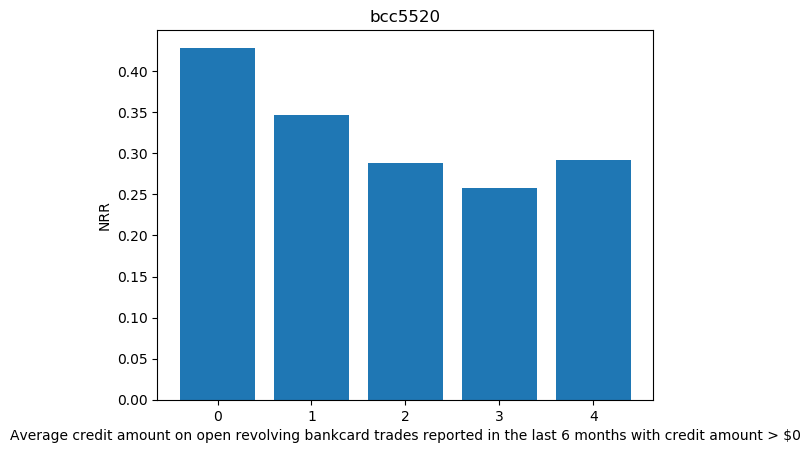

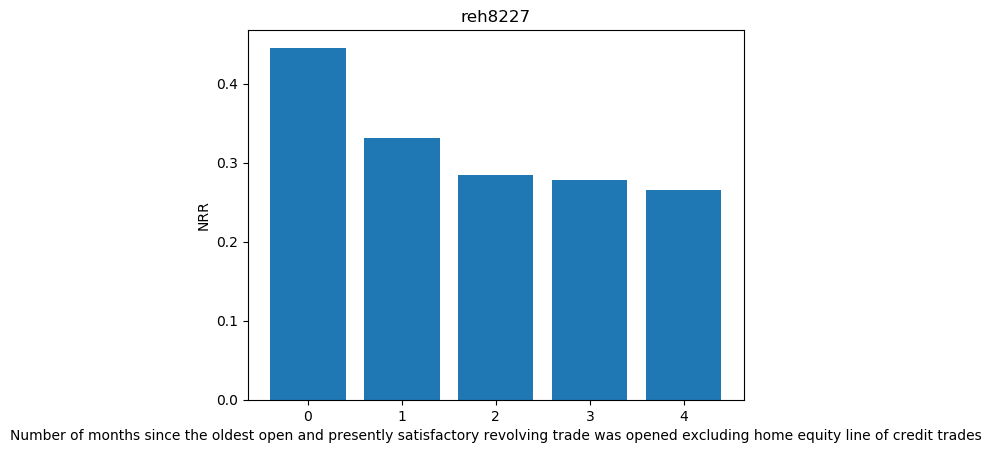

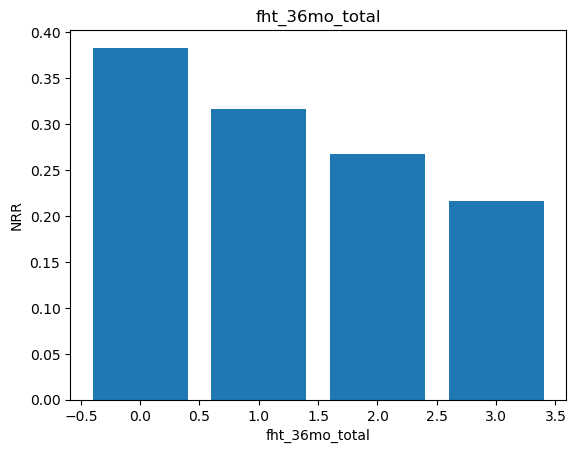

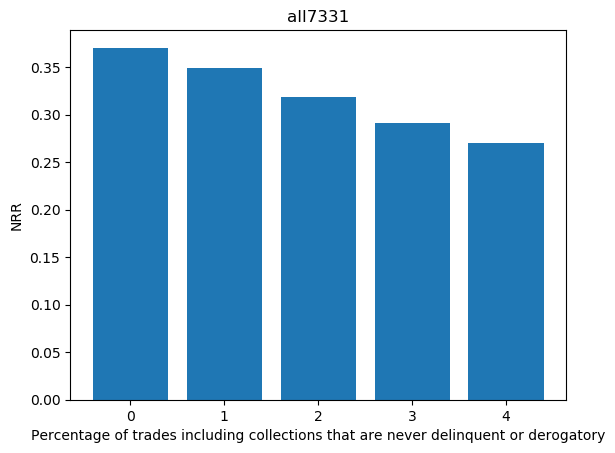

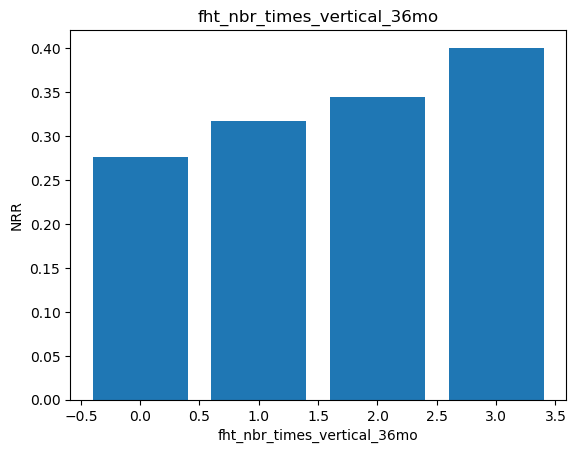

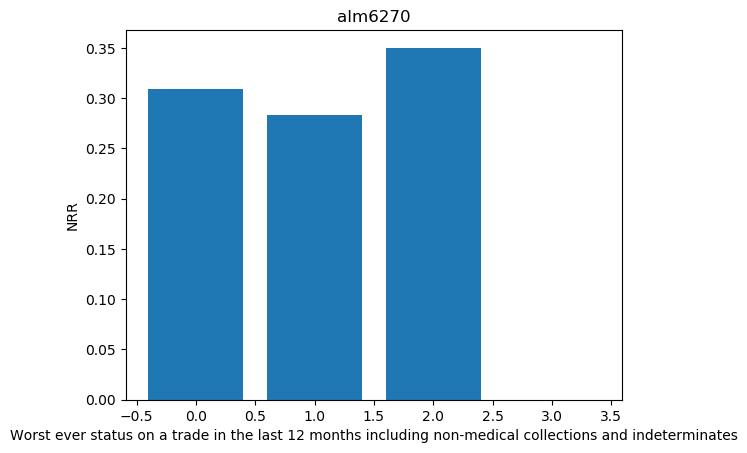

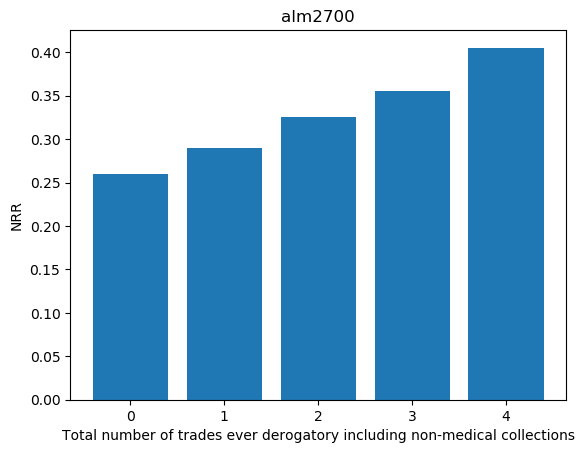

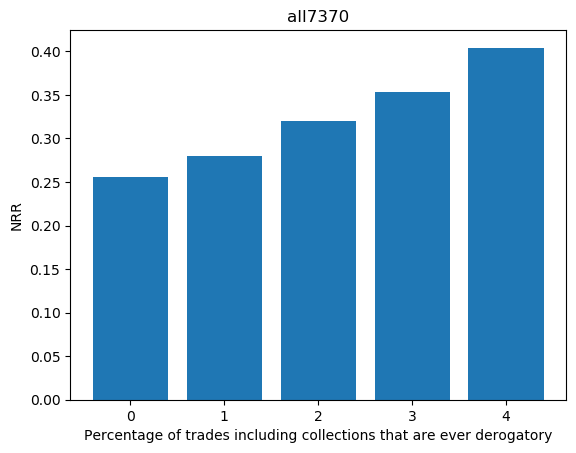

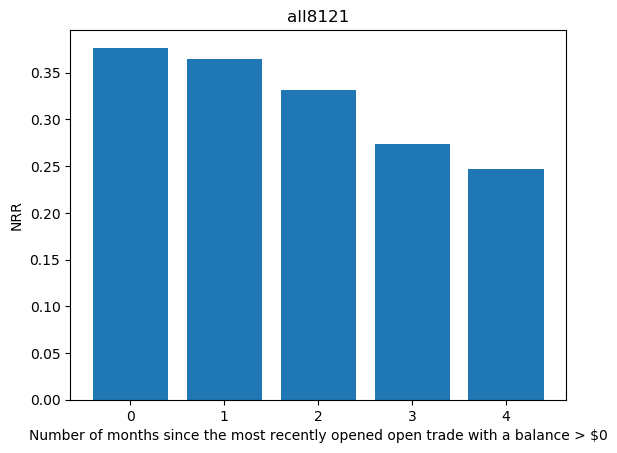

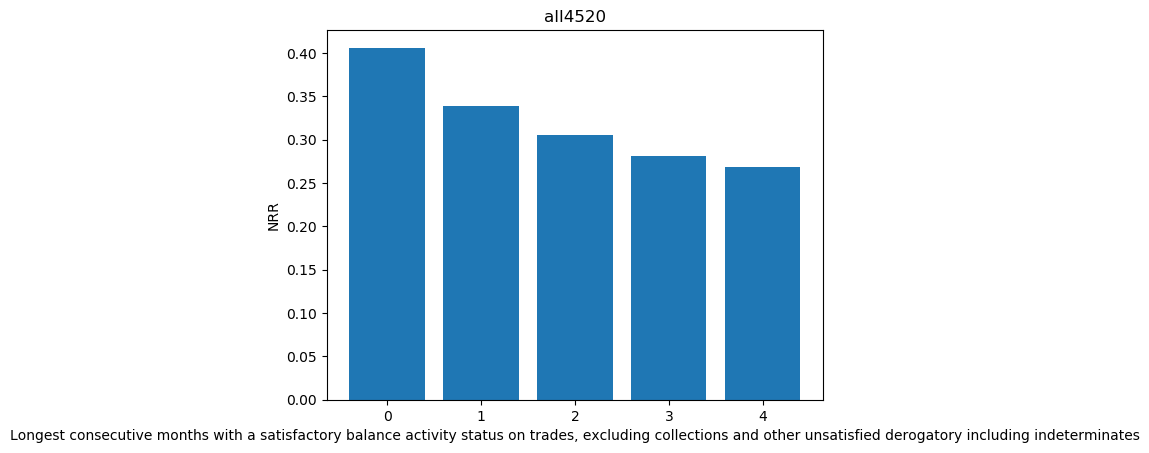

In [73]:
import matplotlib.pyplot as plt
i=0

for var in top_ten_vars['Variable']:
    var_profile = val_final2[['RESPONSE_FLG',var]]
    var_profile = var_profile.reset_index(drop=True)
    
    var_profile[top_ten_vars['Variable'][i]+'_bin'] = pd.qcut(var_profile[top_ten_vars['Variable'][i]], q=5, precision=0,duplicates='drop',labels=False)

    
    var_profile2=var_profile.groupby([top_ten_vars['Variable'][i]+'_bin'])['RESPONSE_FLG'].agg(['count','mean']).sort_values(top_ten_vars['Variable'][i]+'_bin',ascending=True)
    var_profile2.columns = ['count','NRR']

    plt.bar(var_profile2.index, var_profile2['NRR'])
    plt.title(top_ten_vars['Variable'][i])
    plt.xlabel(top_ten_vars['Description'][i])
    plt.ylabel('NRR')
    plt.show()
    
    i=i+1

In [73]:
var_profile['bcc5520'] = np.where(var_profile['bcc5520'] >= 999999990, -9, var_profile['bcc5520'])
var_profile

,RESPONSE_FLG,bcc5520,reh8227,fht_36mo_total,all7331,fht_nbr_times_vertical_36mo,alm6270,alm2700,all7370,all8121,...,bcc5520_bin,reh8227_bin,fht_36mo_total_bin,all7331_bin,fht_nbr_times_vertical_36mo_bin,alm6270_bin,alm2700_bin,all7370_bin,all8121_bin,all4520_bin
0,1.0,-9.0,-9.0,0.0,-9.0,0.0,-9.0,-9.0,-9.0,-9.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-9.0,-9.0,10.0,-9.0,0.0,-9.0,-9.0,-9.0,-9.0,...,0,0,3,0,0,0,0,0,0,0
2,0.0,400.0,10.0,1.0,50.0,17.0,1.0,1.0,4.0,1.0,...,1,1,0,1,2,0,1,0,0,1
3,0.0,988.0,105.0,0.0,72.0,36.0,400.0,9.0,23.0,2.0,...,2,3,0,3,3,2,4,2,0,3
4,1.0,809.0,52.0,2.0,60.0,4.0,1.0,5.0,40.0,2.0,...,2,3,0,2,1,0,3,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234790,0.0,-9.0,9996.0,0.0,73.0,0.0,1.0,3.0,27.0,1.0,...,4,4,0,3,0,0,2,2,0,0
234791,1.0,517.0,19.0,5.0,83.0,0.0,400.0,1.0,17.0,5.0,...,1,1,2,4,0,2,1,1,2,0
234792,0.0,300.0,9.0,0.0,45.0,2.0,400.0,6.0,55.0,15.0,...,0,1,0,1,0,2,4,4,3,3
234793,0.0,20000.0,411.0,1.0,50.0,7.0,400.0,4.0,40.0,3.0,...,3,4,0,1,1,2,3,3,1,4


In [76]:
var_profile['bcc5520'].max()

73000.0

In [81]:
var_profile['reh8227'].max() - int(repr(int(var_profile['reh8227'].max()))[-1])

9990.0

In [91]:
# find first digit

n=7018


int(repr(n)[0])

7

In [94]:
# find last digit

n=7018


int(repr(n)[-1])

8

In [ ]:
n = 162329
# 1. Get the string representation
num_str = repr(n)
# 2. Access the last string of the digit string:
last_digit_str = num_str[-1]
# 3. Convert the last digit string to an integer:
last_digit = int(last_digit_str)
print(f"The last digit of {n} is {last_digit}")

In [74]:
def_test = var_profile[var_profile['bcc5520']==-9]
def_test

,RESPONSE_FLG,bcc5520,reh8227,fht_36mo_total,all7331,fht_nbr_times_vertical_36mo,alm6270,alm2700,all7370,all8121,...,bcc5520_bin,reh8227_bin,fht_36mo_total_bin,all7331_bin,fht_nbr_times_vertical_36mo_bin,alm6270_bin,alm2700_bin,all7370_bin,all8121_bin,all4520_bin
0,1.0,-9.0,-9.0,0.0,-9.0,0.0,-9.0,-9.0,-9.0,-9.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-9.0,-9.0,10.0,-9.0,0.0,-9.0,-9.0,-9.0,-9.0,...,0,0,3,0,0,0,0,0,0,0
5,0.0,-9.0,9996.0,0.0,14.0,34.0,1.0,3.0,43.0,26.0,...,3,4,0,0,3,0,2,3,4,1
6,0.0,-9.0,48.0,5.0,0.0,7.0,1.0,0.0,0.0,9994.0,...,4,2,2,0,1,0,0,0,4,0
8,0.0,-9.0,9.0,8.0,45.0,5.0,400.0,3.0,15.0,13.0,...,3,1,2,1,1,2,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234772,0.0,-9.0,9998.0,2.0,86.0,0.0,1.0,0.0,0.0,1.0,...,4,4,0,4,0,0,0,0,0,4
234775,0.0,-9.0,3.0,1.0,95.0,0.0,1.0,0.0,0.0,2.0,...,4,0,0,4,0,0,0,0,0,3
234778,0.0,-9.0,9996.0,4.0,43.0,0.0,1.0,1.0,29.0,49.0,...,4,4,1,1,0,0,1,2,4,3
234781,0.0,-9.0,5.0,1.0,55.0,1.0,1.0,3.0,45.0,5.0,...,3,0,0,2,0,0,2,3,2,2


In [75]:
def_test['bcc5520'].max()

-9.0

In [93]:
def_test2 = var_profile[var_profile['bcc5520'] != -9]
def_test2

,RESPONSE_FLG,bcc5520,reh8227,fht_36mo_total,all7331,fht_nbr_times_vertical_36mo,alm6270,alm2700,all7370,all8121,...,bcc5520_bin,reh8227_bin,fht_36mo_total_bin,all7331_bin,fht_nbr_times_vertical_36mo_bin,alm6270_bin,alm2700_bin,all7370_bin,all8121_bin,all4520_bin
2,0.0,400.0,10.0,1.0,50.0,17.0,1.0,1.0,4.0,1.0,...,1,1,0,1,2,0,1,0,0,1
3,0.0,988.0,105.0,0.0,72.0,36.0,400.0,9.0,23.0,2.0,...,2,3,0,3,3,2,4,2,0,3
4,1.0,809.0,52.0,2.0,60.0,4.0,1.0,5.0,40.0,2.0,...,2,3,0,2,1,0,3,3,0,3
7,1.0,1000.0,4.0,0.0,17.0,3.0,400.0,3.0,67.0,4.0,...,2,0,0,0,0,2,2,4,1,0
9,0.0,200.0,12.0,3.0,22.0,3.0,400.0,7.0,78.0,12.0,...,0,1,1,0,0,2,4,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234789,0.0,1800.0,13.0,1.0,100.0,0.0,1.0,0.0,0.0,5.0,...,3,1,0,4,0,0,0,0,2,0
234791,1.0,517.0,19.0,5.0,83.0,0.0,400.0,1.0,17.0,5.0,...,1,1,2,4,0,2,1,1,2,0
234792,0.0,300.0,9.0,0.0,45.0,2.0,400.0,6.0,55.0,15.0,...,0,1,0,1,0,2,4,4,3,3
234793,0.0,20000.0,411.0,1.0,50.0,7.0,400.0,4.0,40.0,3.0,...,3,4,0,1,1,2,3,3,1,4


In [70]:
for i in top_ten_vars.index:
    var_profile[top_ten_vars['Variable'][i]+'_bin'] = pd.qcut(var_profile[top_ten_vars['Variable'][i]], q=5, precision=0,duplicates='drop',labels=False)



In [71]:
var_profile

,RESPONSE_FLG,bcc5520,reh8227,fht_36mo_total,all7331,fht_nbr_times_vertical_36mo,alm6270,alm2700,all7370,all8121,...,bcc5520_bin,reh8227_bin,fht_36mo_total_bin,all7331_bin,fht_nbr_times_vertical_36mo_bin,alm6270_bin,alm2700_bin,all7370_bin,all8121_bin,all4520_bin
0,1.0,-9.0,-9.0,0.0,-9.0,0.0,-9.0,-9.0,-9.0,-9.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-9.0,-9.0,10.0,-9.0,0.0,-9.0,-9.0,-9.0,-9.0,...,0,0,3,0,0,0,0,0,0,0
2,0.0,400.0,10.0,1.0,50.0,17.0,1.0,1.0,4.0,1.0,...,1,1,0,1,2,0,1,0,0,1
3,0.0,988.0,105.0,0.0,72.0,36.0,400.0,9.0,23.0,2.0,...,2,3,0,3,3,2,4,2,0,3
4,1.0,809.0,52.0,2.0,60.0,4.0,1.0,5.0,40.0,2.0,...,2,3,0,2,1,0,3,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234790,0.0,999999998.0,9996.0,0.0,73.0,0.0,1.0,3.0,27.0,1.0,...,4,4,0,3,0,0,2,2,0,0
234791,1.0,517.0,19.0,5.0,83.0,0.0,400.0,1.0,17.0,5.0,...,1,1,2,4,0,2,1,1,2,0
234792,0.0,300.0,9.0,0.0,45.0,2.0,400.0,6.0,55.0,15.0,...,0,1,0,1,0,2,4,4,3,3
234793,0.0,20000.0,411.0,1.0,50.0,7.0,400.0,4.0,40.0,3.0,...,3,4,0,1,1,2,3,3,1,4


In [ ]:
var_profile2=var_profile.groupby(['bcc5520_bin'])['RESPONSE_FLG'].agg(['count','mean']).sort_values('bcc5520_bin',ascending=True)

In [102]:
var_profile2=var_profile.groupby([top_ten_vars['Variable'][0]+'_bin'])['RESPONSE_FLG'].agg(['count','mean']).sort_values(top_ten_vars['Variable'][0]+'_bin',ascending=True)
var_profile2.columns = ['count','NRR']

In [113]:
var_profile2

,count,NRR
all4520_bin,,
0,49237,0.406199
1,45699,0.339438
2,47921,0.305419
3,45825,0.281724
4,46113,0.268861


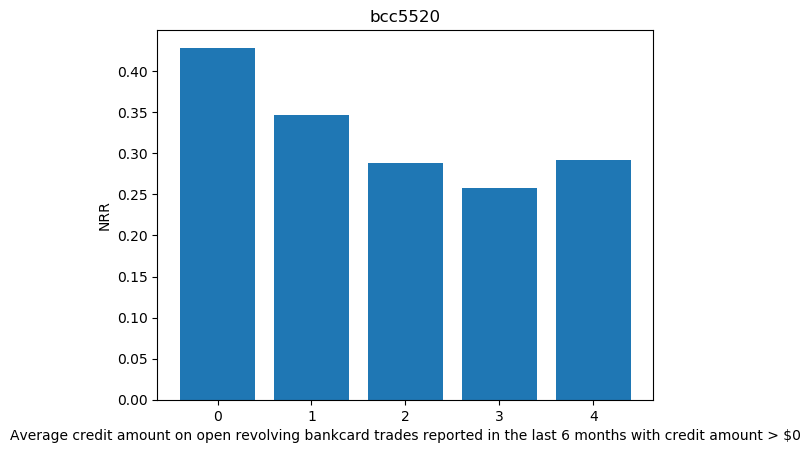

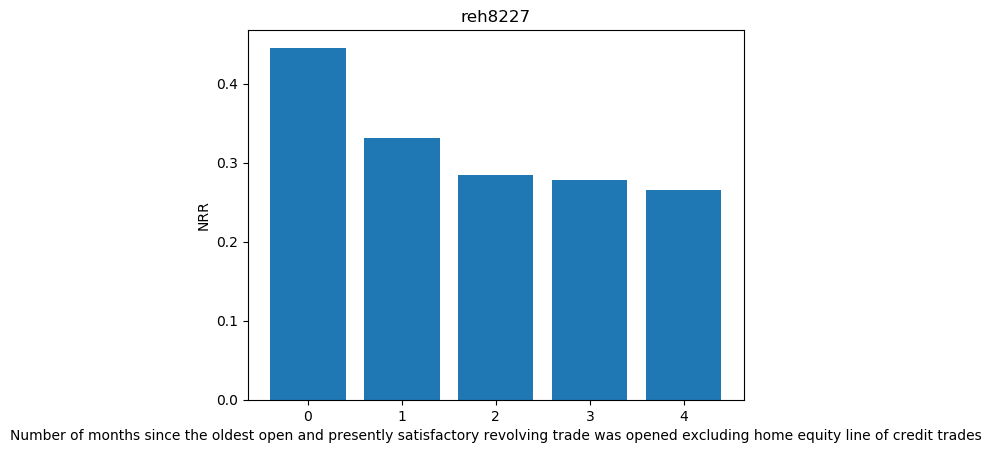

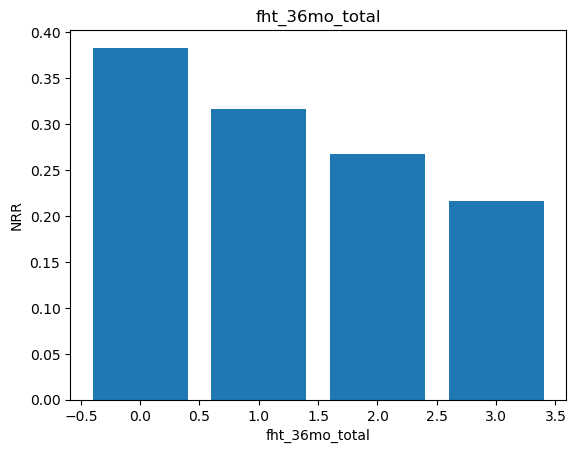

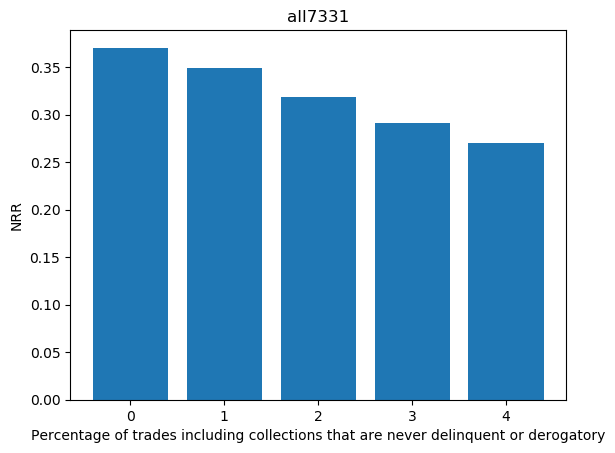

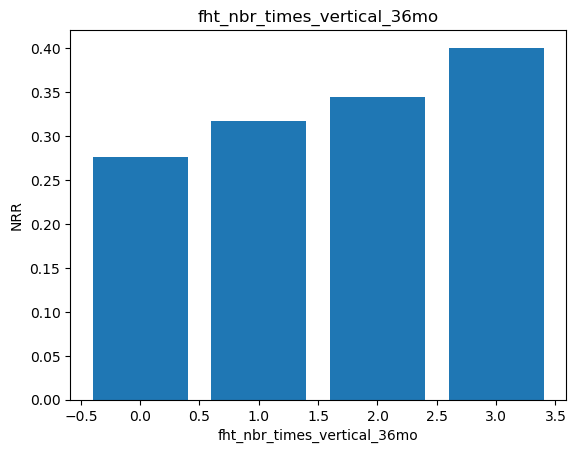

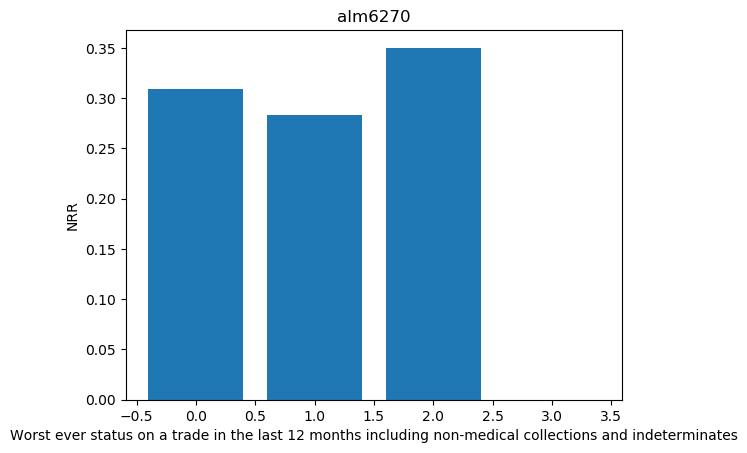

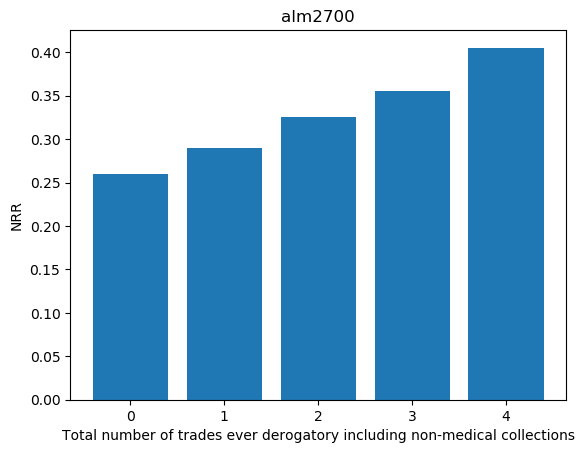

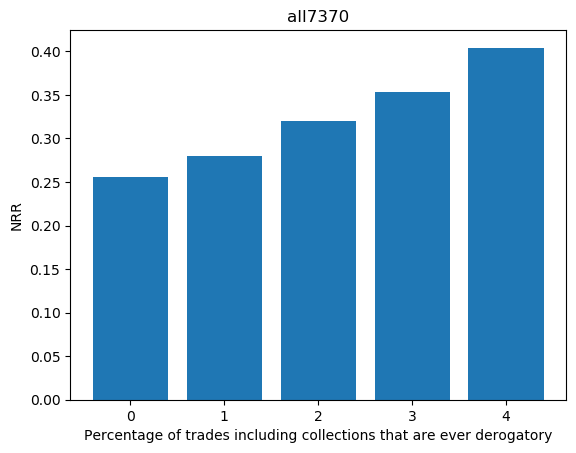

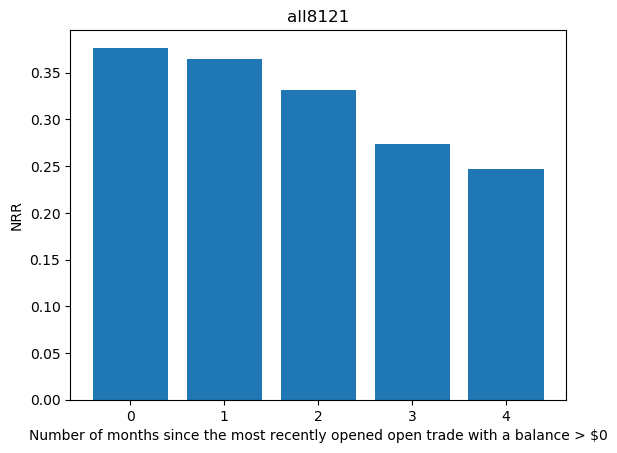

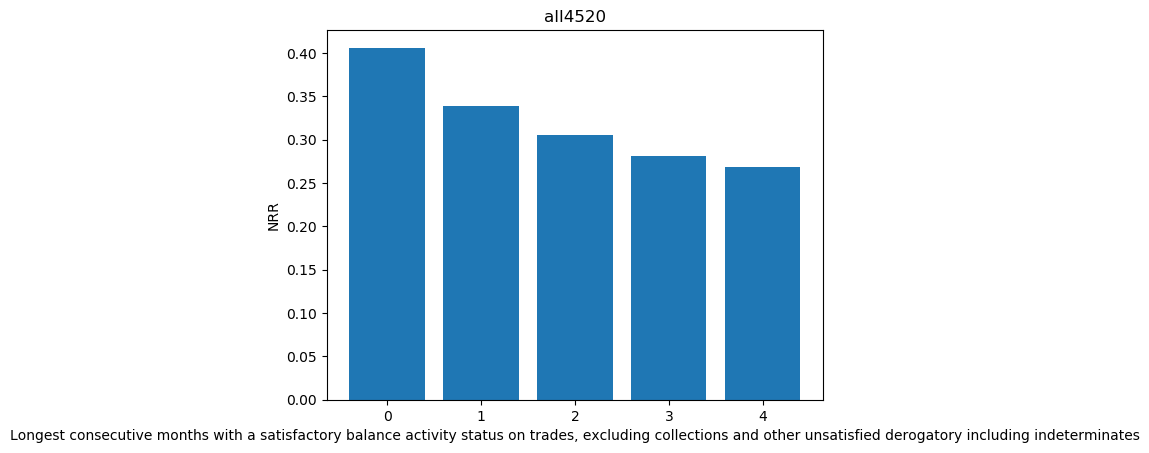

In [112]:
import matplotlib.pyplot as plt

for i in top_ten_vars.index:
    var_profile2=var_profile.groupby([top_ten_vars['Variable'][i]+'_bin'])['RESPONSE_FLG'].agg(['count','mean']).sort_values(top_ten_vars['Variable'][i]+'_bin',ascending=True)
    var_profile2.columns = ['count','NRR']

    
    plt.bar(var_profile2.index, var_profile2['NRR'])
    plt.title(top_ten_vars['Variable'][i])
    plt.xlabel(top_ten_vars['Description'][i])
    plt.ylabel('NRR')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

for i in top_ten_vars.index:
    pd.qcut(var_profile[top_ten_vars['Variable'][i]], q=5, precision=0,duplicates='drop',labels=False)
    
    
    
    
    
    plt.bar(var_profile2.index, var_profile2['NRR'])
    plt.title(top_ten_vars['Variable'][0])
    plt.xlabel(top_ten_vars['Description'][0])
    plt.ylabel('NRR')
    plt.show()

In [100]:
top_ten_vars.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

# Write out Final Modeling Report to Excel

In [188]:
import openpyxl
import xlsxwriter

In [135]:
#create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('NCA Model Summary - No Experian Data Final (9-14-22).xlsx', engine='xlsxwriter')

#write each DataFrame to a specific sheet
dev_mail.to_excel(writer, sheet_name='DEV Campaigns')
val_mail.to_excel(writer, sheet_name='VAL Campaigns')
rand_mail.to_excel(writer, sheet_name='RAND Campaigns')

final_model_params2.to_excel(writer, sheet_name='Hyper Parameters')
importance_rank_bo2.to_excel(writer, sheet_name='Variable Importance')
rank_numtrees2.to_excel(writer, sheet_name='Variable Numer of Trees')
var_sensitivity_2.to_excel(writer, sheet_name='Variable Sensitivity')
ks_auc_summary2.to_excel(writer, sheet_name='KS and AUC')
df_summary_comp_dev2.to_excel(writer, sheet_name='DEV Summary')
df_summary_comp_val2.to_excel(writer, sheet_name='VAL Summary')
df_summary_comp_rand2.to_excel(writer, sheet_name='Random Summary')

df_summary_comp_dev2_w.to_excel(writer, sheet_name='DEV Summary - Weighted')
df_summary_comp_val2_w.to_excel(writer, sheet_name='VAL Summary - Weighted')

top_ten_vars.to_excel(writer, sheet_name='Top 10 Variables')
final_var_summary.to_excel(writer, sheet_name='Final Model Variables')
source_summary_df.to_excel(writer, sheet_name='Variable Source Summary')

swap_perf.to_excel(writer, sheet_name='Swap Set Analysis')

#close the Pandas Excel writer and output the Excel file
writer.save()

# Write out XGBoost Model in SAS code

In [136]:
xg = xgb_nca_bo2

In [137]:


# Function to convert a tree to SAS code           
def writetree(file, tree, treenumber):
    print('Writing Tree %s' % str(treenumber))
    file.write('/* Tree %s */ \n' % str(treenumber))
    for i in range(len(tree)):
        if i == 0:
            file.write('do_0 = 1; \n')
        else:
            file.write('do_%s = 0; \n' % str(i))
    for i in range(len(tree)):
        node = tree[i].strip().split(':')
        treenum = node[0]
        if node[1][0:4] == 'leaf':
            file.write('if do_%s > 0 then do; \n' % treenum)
            file.write('tree_eval%s = %s; \n' % (str(treenumber), node[1].split('=')[1]))
            file.write('end; \n')
        else:
            split = node[1].split(' ')[0].strip('[').strip(']')
            feature = split.split('<')[0]
            yes = node[1].split(' ')[1].split(',')[0].split('=')[1]
            no = node[1].split(' ')[1].split(',')[1].split('=')[1]
            missing = node[1].split(' ')[1].split(',')[2].split('=')[1]
            file.write('if do_%s > 0 then do; \n' % treenum)
            file.write('if missing(%s) then do_%s = 1; else do; \n' % (feature, str(missing)))
            file.write('if %s then do_%s = 1; else do_%s = 1; end; \n' % (split, str(yes), str(no)))
            file.write('end; \n')

# Get a dump of the xgboost model
#dump = xg.get_booster().get_dump()
dump = xg.get_dump()

# Get the number of trees used
#numtrees = xg.get_booster().best_iteration
numtrees = xg.best_iteration
    
# Create a SAS file with write privileges
f = open('NCA_No_EXP.sas', 'w')

    
# Write all of the trees
for i in range(numtrees+1):
    tree = dump[i].split('\n')
    tree = [tree[t] for t in range(len(tree)) if (tree[t] != '')]
    writetree(f, tree, i + 1)

# Calculating the final prediction probability
f.write('array full10_resp_trees(%s) tree_eval1-tree_eval%s; \n' % (numtrees+1, numtrees+1))
f.write('final_score = sum(of full10_resp_trees(*)); \n')
f.write('modelname_score = exp(final_score)/(1 + exp(final_score)); \n')

# Closing the file
f.close()

Writing Tree 1
Writing Tree 2
Writing Tree 3
Writing Tree 4
Writing Tree 5
Writing Tree 6
Writing Tree 7
Writing Tree 8
Writing Tree 9
Writing Tree 10
Writing Tree 11
Writing Tree 12
Writing Tree 13
Writing Tree 14
Writing Tree 15
Writing Tree 16
Writing Tree 17
Writing Tree 18
Writing Tree 19
Writing Tree 20
Writing Tree 21
Writing Tree 22
Writing Tree 23
Writing Tree 24
Writing Tree 25
Writing Tree 26
Writing Tree 27
Writing Tree 28
Writing Tree 29
Writing Tree 30
Writing Tree 31
Writing Tree 32
Writing Tree 33
Writing Tree 34
Writing Tree 35
Writing Tree 36
Writing Tree 37
Writing Tree 38
Writing Tree 39
Writing Tree 40
Writing Tree 41
Writing Tree 42
Writing Tree 43
Writing Tree 44
Writing Tree 45
Writing Tree 46
Writing Tree 47
Writing Tree 48
Writing Tree 49
Writing Tree 50
Writing Tree 51
Writing Tree 52
Writing Tree 53
Writing Tree 54
Writing Tree 55
Writing Tree 56
Writing Tree 57
Writing Tree 58
Writing Tree 59
Writing Tree 60
Writing Tree 61
Writing Tree 62
Writing Tree 63
W

# Test Code for Creating 40 NCA response model segments

In [64]:
keep_vars = [
    'bcc5520' ,'reh8227' ,'fht_36mo_total' ,'all7331' ,'fht_nbr_times_vertical_36mo' ,'alm6270' ,'alm2700' ,'all7370' ,'all8121' ,'all4520' ,
'fht_current_hits_vertical' ,'bca8120' ,'fht_12mo_total' ,'fht_dayssince1ston_vertical' ,'bcx5420' ,'ibe_6864' ,'brc5038' ,'ficoclv8_score' ,
'fht_nbr_times_vertical_3mo' ,'bcc7707' ,'subjectaddrcount' ,'alm2390' ,'all7360' ,'iqt9410' ,'prevaddrtaxyr' ,'alm6200' ,'fht_6mo_bigbook' ,
'iqb9540' ,'curraddrtaxyr' ,'ibe_8167_01' ,'iqt9427' ,'ap005352' ,'brc8320' ,'all8555' ,'fht_3mo_bigbook' ,'col8192' ,'all8164' ,'bcc7620' ,
'all8110' ,'all5420' ,'fht_1mo_bigbook' ,'ibe_8718' ,'miacs_08_022' ,'current_hits_transunion' ,'bcn8220' ,'phoneedaageoldestrecord' ,'brc3480' ,
'rev6230' ,'all7116' ,'fht_36mo_bigbook' ,'fht_dayssincelaststandarddecline' ,'iqf9540' ,'bax0436' ,'rtr5228' ,'iqb9410' ,'rtr7110' ,'miacs_25_061' ,
'all4170' ,'miacs_22_001' ,'reh0300' ,'ibe_3448' ,'iqt9510' ,'all2841' ,'all8552' ,'brc6280' ,'all9260' ,'all8560' ,'ibe_7607_01' ,'iqt9526' ,
'rtr1300' ,'all6310' ,'ibe_2767' ,'brc7190' ,'rta6200' ,'all7320' ,'all6320' ,'iqb9417' ,'ibe_6699' ,'als0337' ,'ibe_8647' ,'stu0700' ,'all9250' ,
'iqm9510' ,'all0206' ,'all8154' ,'iqr9540' ,'iqp9510' ,'brc7517' ,'all9223' ,'phoneotheragenewestrecord' ,'iqt9420' ,'rev8160' ,'als5400' ,'als1300' ,
'all7120' ,'iqf9410' ,'rbgmn694' ,'fht_36mo_standard' ,'rta0300' ,'all3410' ,'gflg1024' ,'stu7118' ,'bca8155' ,'col5069' ,'all7115' ,'all9210' ,'cru0300' ,
'rbgm3451' ,'fht_12mo_standard' ,'col8196' ,'all8151' ,'propageoldestpurchase' ,'use5320' ,'dayssincelaston_expz24' ,'miacs_06_001' ,'miacs_25_065' ,
'ibe_2076_04' ,'ilj5320' ,'all5360' ,'uti2388' ,'rtr7216' ,'ibe_2523_01' ,'all6500' ,'all2321' ,'pil8132' ,'iln7300' ,'miacs_25_080' ,'propownedtaxtotal' ,
'miacs_19_024' ,'ibe_6604' ,'ibe_8167_12' ,'prevaddrlastsalesprice' ,'miacs_25_029' ,'all7443' ,'rpm8220' ,'als3215' ,'inputaddrlenofres' ,'all7937' ,
'all8321' ,'miacs_15_004' ,'bca7300' ,'ibe_8167_19' ,'ibe_6844' ,'all4700' ,'all5070' ,'iln0403' ,'all2006' ,'bca8157' ,'aua6200' ,'cru5030' ,'fflc1942' ,
'all8270' ,'inputaddravmvalue' ,'all8423' ,'als0000' ,'miacs_25_017' ,'inputaddragelastsale' ,'miacs_11_043' ,'miacs_15_007' ,'miacs_25_022' ,'propnewestsaleprice' ,
'addrmostrecenttaxdiff' ,'iln8150' ,'miacs_17_002' ,'col8197' ,'propagenewestsale' ,'all5030' ,'bcx3421' ,'iqa9410' ,'rta7300' ,'bca7213' ,'miacs_25_020' ,
'miacs_19_055' ,'miacs_04_030' ,'curraddravmvalue12' ,'all8325' ,'all7938' ,'miacs_24_004' ,'iqb9415' ,'fip1300' ,'col8168' ,'col8195' ,'miacs_11_025' ,'fip5520' ,
'miacs_25_060' ,'cru0416' ,'prevaddragenewestrecord' ,'all7336' ,'all4060' ,'mts8220' ,'alm6280' 

    
]

In [65]:
dev_final2 = dev_final[keep_vars]

In [66]:
# Create DMatrix for XGBoost scoring
xgb_score = xgb.DMatrix(dev_final2)

# read in XGBoost Model Object
xgb_nca_bo2 = xgb.Booster({'nthread': 4})  # init model
xgb_nca_bo2.load_model('xgb_nca_bo2_2022')  # load data

#run scoring of model
pred_score2 = xgb_nca_bo2.predict(xgb_score)


In [67]:
pred_score2

array([0.6693962 , 0.58073515, 0.6693962 , ..., 0.55284035, 0.4141586 ,
       0.7543428 ], dtype=float32)

In [83]:
pred_score_final2 = pd.DataFrame(np.round(pred_score2*1000).astype(int))
#pred_score_final2 = pd.DataFrame(pred_score2)
pred_score_final2.columns = ['NCA_score']

pred_score_final2

,NCA_score
0,669
1,581
2,669
3,760
4,586
...,...
445057,613
445058,683
445059,553
445060,414


In [84]:
pred_score_final2['NCA_score_bin'] = pd.qcut(pred_score_final2['NCA_score'], q=200, precision=0,duplicates='drop')

In [85]:
pred_score_final2

,NCA_score,NCA_score_bin
0,669,"(667.0, 669.0]"
1,581,"(579.0, 581.0]"
2,669,"(667.0, 669.0]"
3,760,"(759.0, 761.0]"
4,586,"(585.0, 588.0]"
...,...,...
445057,613,"(611.0, 613.0]"
445058,683,"(682.0, 684.0]"
445059,553,"(551.0, 554.0]"
445060,414,"(409.0, 414.0]"


In [86]:
score_summary=pred_score_final2.groupby(['NCA_score_bin'])['NCA_score'].agg(['count','min','max']).sort_values('NCA_score_bin',ascending=False)

In [87]:
score_summary

,count,min,max
NCA_score_bin,,,
"(906.0, 975.0]",2214,907,975
"(891.0, 906.0]",2221,892,906
"(881.0, 891.0]",2117,882,891
"(873.0, 881.0]",2053,874,881
"(865.0, 873.0]",2397,866,873
...,...,...,...
"(295.0, 308.0]",2305,296,308
"(280.0, 295.0]",2195,281,295
"(259.0, 280.0]",2317,260,280


In [88]:
score_summary.to_csv('score 200 seg report.csv')

In [89]:
segment_breaks = [0 ,
490 ,
591 ,
652 ,
691 ,
711 ,
719 ,
727 ,
736 ,
744 ,
753 ,
758 ,
762 ,
767 ,
772 ,
777 ,
782 ,
787 ,
793 ,
798 ,
804 ,
807 ,
810 ,
814 ,
817 ,
820 ,
824 ,
828 ,
831 ,
836 ,
840 ,
844 ,
849 ,
854 ,
860 ,
866 ,
874 ,
882 ,
892 ,
907 

]

In [37]:
# based on the Random 500 sample
segment_breaks = [0,114,165,207,241,261,269,279,289,299,311,
317,324,331,338,346,354,364,373,383,395,401,407,414,421,429,
437,446,455,465,476,487,501,515,533,552,576,604,643,705]

In [27]:
segs = [41 - x for x in np.digitize(pred_score_final2['NCA_score'], segment_breaks)]

In [90]:


pred_score_final2['segs'] = [41 - x for x in np.digitize(pred_score_final2['NCA_score'], segment_breaks)]

In [82]:
y = 1
seg_test = [41-np.digitize(y, segment_breaks)]
seg_test

[1]

In [16]:
y = 450
seg_test2 = [0+np.digitize(y, segment_breaks)]
seg_test2

[28]

In [91]:
pred_score_final2

,NCA_score,NCA_score_bin,segs
0,669,"(667.0, 669.0]",37
1,581,"(579.0, 581.0]",39
2,669,"(667.0, 669.0]",37
3,760,"(759.0, 761.0]",29
4,586,"(585.0, 588.0]",39
...,...,...,...
445057,613,"(611.0, 613.0]",38
445058,683,"(682.0, 684.0]",37
445059,553,"(551.0, 554.0]",39
445060,414,"(409.0, 414.0]",40


In [92]:
pred_score_final2['segs'].value_counts()

39    89548
40    89313
38    66299
37    44506
36    22564
33     9521
31     9062
35     8702
34     8591
32     8432
23     4901
30     4760
28     4760
27     4608
21     4530
26     4432
25     4431
24     4213
22     3854
29     3788
12     2741
18     2702
15     2553
14     2474
5      2397
7      2334
9      2294
2      2221
1      2214
20     2165
19     2138
6      2130
8      2124
3      2117
4      2053
10     2028
11     2023
17     1972
16     1890
13     1677
Name: segs, dtype: int64

In [20]:

pred_score_final2 = pd.DataFrame(np.round(pred_score2*1000).astype(int))
pred_score_final2.columns = ['NCA_score']

pred_score_final2

,NCA_score
0,34
1,154
2,106
3,33
4,56
...,...
1999995,42
1999996,72
1999997,75
1999998,72


In [21]:
pred_score_final2['NCA_score_bin'] = pd.qcut(pred_score_final2['NCA_score'], q=200, precision=0,duplicates='drop')

In [22]:
pred_score_final2

,NCA_score,NCA_score_bin
0,34,"(33.0, 34.0]"
1,154,"(153.0, 155.0]"
2,106,"(105.0, 106.0]"
3,33,"(32.0, 33.0]"
4,56,"(55.0, 56.0]"
...,...,...
1999995,42,"(41.0, 42.0]"
1999996,72,"(71.0, 72.0]"
1999997,75,"(74.0, 75.0]"
1999998,72,"(71.0, 72.0]"


In [23]:
score_summary=pred_score_final2.groupby(['NCA_score_bin'])['NCA_score'].agg(['count','min','max']).sort_values('NCA_score_bin',ascending=False)

In [24]:
score_summary

,count,min,max
NCA_score_bin,,,
"(570.0, 960.0]",9966,571,960
"(505.0, 570.0]",9893,506,570
"(465.0, 505.0]",9976,466,505
"(436.0, 465.0]",9995,437,465
"(413.0, 436.0]",10037,414,436
...,...,...,...
"(26.0, 27.0]",7196,27,27
"(24.0, 26.0]",12588,25,26
"(22.0, 24.0]",10276,23,24


In [ ]:
pred_score2 = xgb_nca_bo2.predict(xgb_score)

# Testing of Model Stability -- removing top 5 variables

In [103]:
# drops for top 5 vars
top_five_vars = final_var_summary.head(5)
drop_vars3 = top_five_vars['Variable'].tolist()

drop_vars3

['fht_24mo_total', 'bcc8322', 'alm2720', 'alm6200', 'reh5420']

# Create new model population based on variable drops

In [104]:
dev_final3 = dev_final2.drop(drop_vars3,axis=1)

In [105]:
val_final3 = val_final2.drop(drop_vars3,axis=1)

In [106]:
rand_final3 = rand_final2.drop(drop_vars3,axis=1)

In [107]:
dev_final3

,RESPONSE_FLG,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_1mo_standard,fht_1mo_total,fht_24mo_bigbook,fht_24mo_standard,fht_36mo_standard,...,miacs_12_003,miacs_23_013,miacs_23_015,miacs_25_026,miacs_25_032,miacs_25_037,miacs_25_039,miacs_25_060,miacs_25_065,miacs_25_107
2,0,355,0,4,0,0,1,1,2,2,...,22,48,11,2,2,2,61,43,0,0
3,1,429,0,2,0,0,0,2,1,3,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,0,-19,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
7,1,628,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
8,0,-9,1,8,0,0,1,2,2,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574298,0,409,0,2,0,0,0,0,0,5,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
574299,0,-17,0,1,0,0,0,0,1,5,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
574303,0,287,0,0,0,0,0,0,0,1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
574304,0,44,0,1,0,0,0,0,1,1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [108]:
val_final3

,RESPONSE_FLG,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_1mo_standard,fht_1mo_total,fht_24mo_bigbook,fht_24mo_standard,fht_36mo_standard,...,miacs_12_003,miacs_23_013,miacs_23_015,miacs_25_026,miacs_25_032,miacs_25_037,miacs_25_039,miacs_25_060,miacs_25_065,miacs_25_107
0,0,-9,0,7,0,0,1,0,0,0,...,24,25,27,11,39,27,24,0,0,0
1,1,80,0,0,0,0,0,0,0,0,...,21,24,32,7,1,0,19,2,1,1
5,1,-9,0,3,1,0,1,1,0,0,...,26,15,47,17,8,0,77,54,1,4
6,0,-9,0,1,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
17,0,19,0,9,0,0,0,1,0,0,...,11,6,56,0,0,0,32,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574596,1,-9,0,1,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
574597,1,-9,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
574598,0,72,0,4,0,0,0,1,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
574599,0,589,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [109]:
rand_final3

,RESPONSE_FLG,dayssincelaston_expz24,fht_12mo_standard,fht_12mo_total,fht_1mo_bigbook,fht_1mo_standard,fht_1mo_total,fht_24mo_bigbook,fht_24mo_standard,fht_36mo_standard,...,miacs_12_003,miacs_23_013,miacs_23_015,miacs_25_026,miacs_25_032,miacs_25_037,miacs_25_039,miacs_25_060,miacs_25_065,miacs_25_107
0,0,102,1,1,0,0,0,0,1,1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,0,-9,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,0,-9,0,0,0,0,0,0,0,0,...,16,6,67,2,75,49,34,1,0,10
3,0,1084,0,0,0,0,0,0,3,7,...,14,13,45,3,15,99,21,0,0,9
4,0,-9,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499501,0,-9,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
499502,0,688,0,2,0,0,0,1,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
499503,0,719,0,0,0,0,0,0,0,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
499504,0,-9,0,0,0,0,0,0,0,1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


# Create Updated DMatrices for new populations

In [111]:
X_train3 = dev_final3.drop('RESPONSE_FLG',axis=1)
y_train3 = dev_final3['RESPONSE_FLG']
 
X_oot3 = val_final3.drop('RESPONSE_FLG',axis=1)
y_oot3 = val_final3['RESPONSE_FLG']

X_rand3 = rand_final3.drop('RESPONSE_FLG',axis=1)
y_rand3 = rand_final3['RESPONSE_FLG']
 
import xgboost as xgb
 
xgb_oot3 = xgb.DMatrix(X_oot3,label=y_oot3)
xgb_train3 = xgb.DMatrix(X_train3,label=y_train3)
xgb_rand3 = xgb.DMatrix(X_rand3,label=y_rand3)

# Use same Hyperparameters for Final Model

In [112]:
best_params

{'alpha': 0.78,
 'colsample_bytree': 0.9,
 'gamma': 1.63,
 'learning_rate': 0.293,
 'max_bin': 15,
 'min_child_weight': 0.12,
 'subsample': 0.75,
 'max_depth': 3,
 'objective': 'binary:logistic',
 'tree_method': 'hist',
 'eval_metric': 'auc'}

In [113]:

num_trees = 400
watchlist = [(xgb_train3,'X_train3'),(xgb_oot3,'X_oot3')]
 



In [114]:
xgb_nca_bo3 = xgb.train(best_params, xgb_train3, num_trees, watchlist, early_stopping_rounds=20)

[0]	X_train3-auc:0.60721	X_oot3-auc:0.60980
[1]	X_train3-auc:0.63005	X_oot3-auc:0.62470
[2]	X_train3-auc:0.63771	X_oot3-auc:0.63426
[3]	X_train3-auc:0.64840	X_oot3-auc:0.64709
[4]	X_train3-auc:0.65400	X_oot3-auc:0.65099
[5]	X_train3-auc:0.65935	X_oot3-auc:0.65432
[6]	X_train3-auc:0.66342	X_oot3-auc:0.65419
[7]	X_train3-auc:0.66612	X_oot3-auc:0.65559
[8]	X_train3-auc:0.66934	X_oot3-auc:0.65916
[9]	X_train3-auc:0.67150	X_oot3-auc:0.66111
[10]	X_train3-auc:0.67432	X_oot3-auc:0.66364
[11]	X_train3-auc:0.67720	X_oot3-auc:0.66442
[12]	X_train3-auc:0.67933	X_oot3-auc:0.66741
[13]	X_train3-auc:0.68015	X_oot3-auc:0.66823
[14]	X_train3-auc:0.68140	X_oot3-auc:0.66905
[15]	X_train3-auc:0.68391	X_oot3-auc:0.67129
[16]	X_train3-auc:0.68564	X_oot3-auc:0.67294
[17]	X_train3-auc:0.68696	X_oot3-auc:0.66983
[18]	X_train3-auc:0.68791	X_oot3-auc:0.67084
[19]	X_train3-auc:0.68901	X_oot3-auc:0.67202
[20]	X_train3-auc:0.69003	X_oot3-auc:0.67100
[21]	X_train3-auc:0.69088	X_oot3-auc:0.67209
[22]	X_train3-auc:0.

In [117]:
xgb_nca_bo3.best_iteration

230

# Run the XGBoost Model on the best iteration from early stopping

In [116]:
num_trees = xgb_nca_bo3.best_iteration + 1
xgb_nca_bo3 = xgb.train(best_params, xgb_train3, num_trees, watchlist)

[0]	X_train3-auc:0.60721	X_oot3-auc:0.60980
[1]	X_train3-auc:0.63005	X_oot3-auc:0.62470
[2]	X_train3-auc:0.63771	X_oot3-auc:0.63426
[3]	X_train3-auc:0.64840	X_oot3-auc:0.64709
[4]	X_train3-auc:0.65400	X_oot3-auc:0.65099
[5]	X_train3-auc:0.65935	X_oot3-auc:0.65432
[6]	X_train3-auc:0.66342	X_oot3-auc:0.65419
[7]	X_train3-auc:0.66612	X_oot3-auc:0.65559
[8]	X_train3-auc:0.66934	X_oot3-auc:0.65916
[9]	X_train3-auc:0.67150	X_oot3-auc:0.66111
[10]	X_train3-auc:0.67432	X_oot3-auc:0.66364
[11]	X_train3-auc:0.67720	X_oot3-auc:0.66442
[12]	X_train3-auc:0.67933	X_oot3-auc:0.66741
[13]	X_train3-auc:0.68015	X_oot3-auc:0.66823
[14]	X_train3-auc:0.68140	X_oot3-auc:0.66905
[15]	X_train3-auc:0.68391	X_oot3-auc:0.67129
[16]	X_train3-auc:0.68564	X_oot3-auc:0.67294
[17]	X_train3-auc:0.68696	X_oot3-auc:0.66983
[18]	X_train3-auc:0.68791	X_oot3-auc:0.67084
[19]	X_train3-auc:0.68901	X_oot3-auc:0.67202
[20]	X_train3-auc:0.69003	X_oot3-auc:0.67100
[21]	X_train3-auc:0.69088	X_oot3-auc:0.67209
[22]	X_train3-auc:0.

# Performance comparison when removing top 5 variables

In [122]:
# KS statistic used for optimization
from scipy.stats import ks_2samp
 
# calculating the 2 sample KS statistic by comparing the predicted goods and predicted bads prob scores
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

from sklearn.metrics import roc_auc_score

# Inputs - Removing top 5 variables
model_obj_ks = xgb_nca_bo3

Dmatrix_dev = xgb_train3
Dmatrix_val = xgb_oot3
Dmatrix_rand = xgb_rand3

y_actual_dev = y_train3
y_actual_val = y_oot3
y_actual_rand = y_rand3

# Final Model Inputs

model_obj_ks2 = xgb_nca_bo2


Dmatrix_dev2 = xgb_train2
Dmatrix_val2 = xgb_oot2
Dmatrix_rand2 = xgb_rand2

y_actual_dev2 = y_train2
y_actual_val2 = y_oot2
y_actual_rand2 = y_rand2




# Removing top 5 variables
pred_train = model_obj_ks.predict(Dmatrix_dev)
ks_train = ks_stat(y_actual_dev, pred_train)
auc_train = roc_auc_score(y_actual_dev,pred_train)

pred_oot = model_obj_ks.predict(Dmatrix_val)
ks_oot = ks_stat(y_actual_val, pred_oot)
auc_oot = roc_auc_score(y_actual_val,pred_oot)

pred_rand = model_obj_ks.predict(Dmatrix_rand)
ks_rand = ks_stat(y_actual_rand, pred_rand)
auc_rand = roc_auc_score(y_actual_rand,pred_rand)

# Final Model
pred_train2 = model_obj_ks2.predict(Dmatrix_dev2)
ks_train2 = ks_stat(y_actual_dev2, pred_train2)
auc_train2 = roc_auc_score(y_actual_dev2,pred_train2)

pred_oot2 = model_obj_ks2.predict(Dmatrix_val2)
ks_oot2 = ks_stat(y_actual_val2, pred_oot2)
auc_oot2 = roc_auc_score(y_actual_val2,pred_oot2)

pred_rand2 = model_obj_ks2.predict(Dmatrix_rand2)
ks_rand2 = ks_stat(y_actual_rand2, pred_rand2)
auc_rand2 = roc_auc_score(y_actual_rand2,pred_rand2)




ks_shift_dev = (ks_train/ks_train2) - 1
auc_shift_dev = (auc_train/auc_train2) - 1

ks_shift_val = (ks_oot/ks_oot2) - 1
auc_shift_val = (auc_oot/auc_oot2) - 1


ks_shift_rand = (ks_rand/ks_rand2) - 1
auc_shift_rand = (auc_rand/auc_rand2) - 1






# Create the summary Dataframe of KS and AUC comparison

Population = ['DEV','VAL','Random']
Population = pd.DataFrame(Population)
Population.columns = ['Population']

KS_New = [ks_train,ks_oot,ks_rand]
KS_New = pd.DataFrame(KS_New)
KS_New.columns = ['KS_New']

AUC_New = [auc_train,auc_oot,auc_rand]
AUC_New = pd.DataFrame(AUC_New)
AUC_New.columns = ['AUC_New']

KS_Old = [ks_train2,ks_oot2,ks_rand2]
KS_Old = pd.DataFrame(KS_Old)
KS_Old.columns = ['KS_FINAL_MDL']

AUC_Old = [auc_train2,auc_oot2,auc_rand2]
AUC_Old = pd.DataFrame(AUC_Old)
AUC_Old.columns = ['AUC_FINAL_MDL']



KS_Shift = [ks_shift_dev,ks_shift_val,ks_shift_rand]
KS_Shift = pd.DataFrame(KS_Shift)
KS_Shift.columns = ['KS_Perf_chg']

AUC_Shift = [auc_shift_dev,auc_shift_val,auc_shift_rand]
AUC_Shift = pd.DataFrame(AUC_Shift)
AUC_Shift.columns = ['AUC_Perf_chg']




ks_auc_summary3 = pd.concat([Population,KS_New,AUC_New,KS_Old,AUC_Old,KS_Shift,AUC_Shift],axis=1)

ks_auc_summary3.style.format({
        'KS_New': '{:,.3f}'.format,
        'AUC_New': '{:,.3f}'.format,
        'KS_FINAL_MDL': '{:,.3f}'.format,
        'AUC_FINAL_MDL': '{:,.3f}'.format,
        'KS_Perf_chg': '{:,.2%}'.format,
        'AUC_Perf_chg': '{:,.2%}'.format,
        
            })


,Population,KS_New,AUC_New,KS_FINAL_MDL,AUC_FINAL_MDL,KS_Perf_chg,AUC_Perf_chg
0,DEV,0.334,0.729,0.346,0.737,-3.29%,-1.05%
1,VAL,0.283,0.697,0.289,0.701,-1.96%,-0.53%
2,Random,0.357,0.740,0.370,0.745,-3.46%,-0.60%
